# Twitch NLP Pipeline

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

import nltk
import unicodedata
import string
import time
from collections import Counter

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

def remove_accents(input_str):
    nfkd_form = unicodedata.normalize('NFKD', input_str)
    only_ascii = nfkd_form.encode('ASCII', 'ignore')
    return only_ascii.decode()

In [29]:
data_file = '../chat_log_data/edisonparklive_445273558.txt'

def create_df(data_file):
    print("creating df...\n")
    df = pd.DataFrame(columns=['timestamp', 'user', 'chat_msg']) #initializes the dataframe
    
    with open(data_file, "r") as f:
        line_counter = 0
        for line in f:
            timestamp = line[1:13]
            user = line[15:][:line[15:].find(':')]
            chat = line[15:][line[15:].find(':')+2:-1]
            df.loc[line_counter] = (timestamp, user, chat)
            line_counter += 1
    print('df complete!')
    return df
        
start_time = time.time()
df = create_df(data_file)
print("\n\n--- the process took %s seconds ---" % (time.time() - start_time))

creating df...

df complete!


--- the process took 63.61216688156128 seconds ---


In [30]:
df.head()

timestamp            user  \
0  [00:00:30.10     Potterapple   
1  00:00:40.723     Potterapple   
2  00:00:43.335     Potterapple   
3  00:00:50.034  edisonparklive   
4  00:01:00.921   BushNationBot   

                                            chat_msg  
0                                                Pog  
1                                              First  
2                                            EZ Clap  
3                                            EZ Clap  
4  @emptvness, you were timed out for overusing s...

In [31]:
df.describe()

timestamp    user chat_msg
count          21131   21131    21131
unique         21119    1509    13442
top     00:27:56.966  Juroph     LULW
freq               2     838      677

In [32]:
df.to_pickle('../chat_log_data/pickle/edisonparklive_445273558.pkl')

In [33]:
df = pd.read_pickle("../chat_log_data/pickle/edisonparklive_445273558.pkl")
df.head()

timestamp            user  \
0  [00:00:30.10     Potterapple   
1  00:00:40.723     Potterapple   
2  00:00:43.335     Potterapple   
3  00:00:50.034  edisonparklive   
4  00:01:00.921   BushNationBot   

                                            chat_msg  
0                                                Pog  
1                                              First  
2                                            EZ Clap  
3                                            EZ Clap  
4  @emptvness, you were timed out for overusing s...

In [34]:
df.describe()

timestamp    user chat_msg
count          21131   21131    21131
unique         21119    1509    13442
top     00:27:56.966  Juroph     LULW
freq               2     838      677

#### Add word length of chat

In [35]:
df['chat_length'] = df['chat_msg'].apply(lambda x: len(Counter(x.lower().split())))
df.head()

timestamp            user  \
0  [00:00:30.10     Potterapple   
1  00:00:40.723     Potterapple   
2  00:00:43.335     Potterapple   
3  00:00:50.034  edisonparklive   
4  00:01:00.921   BushNationBot   

                                            chat_msg  chat_length  
0                                                Pog            1  
1                                              First            1  
2                                            EZ Clap            2  
3                                            EZ Clap            2  
4  @emptvness, you were timed out for overusing s...            9

### Remove stopwords and punctuations

In [8]:
stopwords_ = set(stopwords.words('english'))
punctuation_ = set(string.punctuation)

In [9]:
def filter_tokens(sent):
    return([w for w in sent if not w in stopwords_ and not w in punctuation_])

tokens_filtered = list(map(filter_tokens, df_channel['word_chat_msg']))
tokens_filtered

[['one', 'helmet', 'lul'],
 ['okay',
  'headshots',
  'p',
  'sick,',
  'doesnt',
  'make',
  'civ',
  'killing',
  'lul'],
 ['oof'],
 ['lul'],
 ['d:'],
 ['monkaw'],
 ['omegalul'],
 ['jesus', 'man'],
 ['monkaw'],
 ['monkaw'],
 ['ahaahahahah'],
 ['d:'],
 ['lulw'],
 ['f'],
 ['oof'],
 ['meemss'],
 ['lulw'],
 ['ahhahahahahahah'],
 ['kek'],
 ['lul', 'omg'],
 ['hah'],
 ['hahahaha'],
 ['lulw'],
 ['ahhahahahahahahaha'],
 ['lulw'],
 ['lul'],
 ['iam', 'crying'],
 ['lul'],
 ['bring', 'lock', 'pick'],
 ['@bloggerama', 'see', 'thats', 'slaying.', 'clean'],
 ['holy.', 'crap', 'dude'],
 ['worth'],
 ['d:'],
 ['lulw'],
 ['pog', 'clap'],
 ['bushlul'],
 ['karma'],
 ['lulw', 'start', 'lockpick'],
 ['lulw', 'hpyerclap'],
 ['lul'],
 ['hero', 'arrives'],
 ['omfg'],
 ['start', 'lockpick'],
 ['ugh!'],
 ['start', 'mission', 'lockpic'],
 ['get', 'lockpick', '4head'],
 ['d:'],
 ['lul'],
 ['take', 'lockpick'],
 ['bring', 'lock', 'pick'],
 ['@edisonparklive', 'need', 'lockpick'],
 ['hahaha'],
 ['master', 'difficult

In [10]:
df_channel['filtered_chat_msg'] = df_channel['word_chat_msg'].apply(lambda x: filter_tokens(x))
df_channel['filtered_chat_msg'].head()

/Users/michaellin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


82082                                   [one, helmet, lul]
82083    [okay, headshots, p, sick,, doesnt, make, civ,...
82084                                                [oof]
82085                                                [lul]
82086                                                 [d:]
Name: filtered_chat_msg, dtype: object

## Bag of Words and TFIDF

In [75]:
df['chat_msg_string'] = df['chat_msg'].apply(lambda x: str(x.split()))
df['chat_msg_string'].head()

0                                              ['Pog']
1                                            ['First']
2                                       ['EZ', 'Clap']
3                                       ['EZ', 'Clap']
4    ['@emptvness,', 'you', 'were', 'timed', 'out',...
Name: chat_msg_string, dtype: object

In [84]:
type(df['chat_msg'][0])

str

In [81]:
chat_list = df['chat_msg'].apply(', '.join)
chat_list

0                                                  P, o, g
1                                            F, i, r, s, t
2                                      E, Z,  , C, l, a, p
3                                      E, Z,  , C, l, a, p
4        @, e, m, p, t, v, n, e, s, s, ,,  , y, o, u,  ...
5                                      E, Z,  , C, l, a, p
6                                            f, i, r, s, t
7        b, u, s, h, B, U, S, H,  , b, u, s, h, B, U, S...
8                    @, m, u, n, c, h, _, e, e,  , r, i, p
9        E, d, i, s, o, n,  , j, a, e, g, e, r, 1, 8, H...
10                                           P, o, g, e, y
11                                     P, e, p, e, P, l, s
12                                     P, e, p, e, P, l, s
13                                                 P, o, g
14                                        K, o, n, C, h, a
15       b, u, s, h, P, o, g, e, y,  , b, u, s, h, P, o...
16       b, u, s, h, C, r, e, e, p,  , b, u, s, h, C, r.

In [79]:
chat_msg_list = df['chat_msg_string']

for line in chat_msg_list:
    for word in line:
        print(word)


[
'
P
o
g
'
]
[
'
F
i
r
s
t
'
]
[
'
E
Z
'
,
 
'
C
l
a
p
'
]
[
'
E
Z
'
,
 
'
C
l
a
p
'
]
[
'
@
e
m
p
t
v
n
e
s
s
,
'
,
 
'
y
o
u
'
,
 
'
w
e
r
e
'
,
 
'
t
i
m
e
d
'
,
 
'
o
u
t
'
,
 
'
f
o
r
'
,
 
'
o
v
e
r
u
s
i
n
g
'
,
 
'
s
y
m
b
o
l
s
.
'
,
 
'
(
w
a
r
n
i
n
g
)
'
]
[
'
E
Z
'
,
 
'
C
l
a
p
'
]
[
'
f
i
r
s
t
'
]
[
'
b
u
s
h
B
U
S
H
'
,
 
'
b
u
s
h
B
U
S
H
'
,
 
'
b
u
s
h
B
U
S
H
'
]
[
'
@
m
u
n
c
h
_
e
e
'
,
 
'
r
i
p
'
]
[
'
E
d
i
s
o
n
'
,
 
'
j
a
e
g
e
r
1
8
H
u
g
'
,
 
'
H
o
p
e
'
,
 
'
y
o
u
'
,
 
'
a
r
e
'
,
 
'
f
e
e
l
i
n
g
'
,
 
'
b
e
t
t
e
r
'
,
 
'
n
o
w
'
]
[
'
P
o
g
e
y
'
]
[
'
P
e
p
e
P
l
s
'
]
[
'
P
e
p
e
P
l
s
'
]
[
'
P
o
g
'
]
[
'
K
o
n
C
h
a
'
]
[
'
b
u
s
h
P
o
g
e
y
'
,
 
'
b
u
s
h
P
o
g
e
y
'
]
[
'
b
u
s
h
C
r
e
e
p
'
,
 
'
b
u
s
h
C
r
e
e
p
'
,
 
'
b
u
s
h
C
r
e
e
p
'
,
 
'
b
u
s
h
C
r
e
e
p
'
]
[
'
b
u
s
h
7
'
]
[
'
A
h
m
e
d
5
8
0
'
,
 
'
j
a
e
g
e
r
1
8
W
a
v
e
'
]
[
'
A
l
e
x
o
s
a
u
r
'
,
 
'
j
a
e
g
e
r
1
8
W
a
v
e
'
]
[
'
b
u
s
h
P
o
g
e
y
'
,
 
'
n
o
'
,


'
,
 
'
T
O
'
,
 
'
b
u
s
h
G
'
,
 
'
T
H
E
'
,
 
'
b
u
s
h
L
U
L
'
,
 
'
B
U
S
H
'
,
 
'
b
u
s
h
B
U
S
H
'
,
 
'
N
A
T
I
O
N
'
,
 
'
b
u
s
h
R
E
'
,
 
'
!
!
'
]
[
'
b
u
s
h
P
o
g
e
y
'
,
 
'
b
u
s
h
P
o
g
e
y
'
,
 
'
b
u
s
h
P
o
g
e
y
'
,
 
'
b
u
s
h
P
o
g
e
y
'
]
[
'
w
h
0
m
a
n
'
,
 
'
s
u
b
s
c
r
i
b
e
d
'
,
 
'
a
t
'
,
 
'
T
i
e
r
'
,
 
'
1
.
'
,
 
"
T
h
e
y
'
v
e
"
,
 
'
s
u
b
s
c
r
i
b
e
d
'
,
 
'
f
o
r
'
,
 
'
8
'
,
 
'
m
o
n
t
h
s
,
'
,
 
'
c
u
r
r
e
n
t
l
y
'
,
 
'
o
n
'
,
 
'
a
'
,
 
'
4
'
,
 
'
m
o
n
t
h
'
,
 
'
s
t
r
e
a
k
!
'
,
 
'
<
3
'
,
 
'
<
3
'
,
 
'
<
3
'
]
[
'
u
s
h
N
a
t
i
o
n
B
o
t
'
,
 
'
W
E
L
C
O
M
E
'
,
 
'
b
u
s
h
7
'
,
 
'
B
A
C
K
'
,
 
'
b
u
s
h
H
Y
P
E
R
S
'
,
 
'
T
O
'
,
 
'
b
u
s
h
G
'
,
 
'
T
H
E
'
,
 
'
b
u
s
h
L
U
L
'
,
 
'
B
U
S
H
'
,
 
'
b
u
s
h
B
U
S
H
'
,
 
'
N
A
T
I
O
N
'
,
 
'
b
u
s
h
R
E
'
,
 
'
!
!
'
]
[
'
n
i
c
e
'
,
 
'
h
a
i
r
c
u
t
e
!
'
,
 
'
P
o
g
e
y
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
n
i
c
e
'
,
 
'
h
a
i
r
c
u
t
'
]
[
'
@


i
n
g
s
'
]
[
'
@
A
l
e
x
o
s
a
u
r
'
,
 
'
b
u
t
'
,
 
"
y
o
u
'
r
e
"
,
 
'
a
'
,
 
'
P
o
g
e
y
'
,
 
'
p
l
a
y
e
r
'
,
 
'
b
e
s
i
d
e
s
'
,
 
'
t
h
a
t
'
]
[
'
@
Y
a
B
o
i
l
e
y
'
,
 
'
I
'
,
 
'
p
l
a
y
'
,
 
'
a
'
,
 
'
l
o
t
'
,
 
'
o
f
'
,
 
'
o
t
h
e
r
'
,
 
'
c
o
m
p
s
'
,
 
'
I
'
,
 
'
j
u
s
t
'
,
 
'
e
n
j
o
y
'
,
 
'
w
i
n
n
i
n
g
'
,
 
'
L
U
L
'
]
[
'
P
o
t
t
e
r
a
p
p
l
e
'
,
 
'
s
i
n
g
s
i
n
g
W
a
v
e
'
]
[
'
@
j
u
l
i
a
s
e
g
'
,
 
'
c
e
l
i
H
i
'
]
[
'
P
o
g
'
]
[
'
f
u
s
W
a
v
e
'
,
 
'
P
o
t
t
e
r
a
p
p
l
e
'
]
[
'
P
o
g
'
]
[
'
P
o
g
'
]
[
'
L
M
A
O
O
O
O
O
O
O
'
]
[
'
P
o
g
'
]
[
'
b
u
s
h
P
o
g
e
y
'
]
[
'
P
o
g
'
]
[
'
K
u
k
u
'
,
 
'
o
n
'
,
 
'
a
'
,
 
'
r
o
l
l
'
,
 
'
t
o
d
a
y
'
,
 
'
P
o
g
'
]
[
'
P
o
g
'
]
[
'
b
u
s
h
P
o
g
e
y
'
]
[
'
b
u
s
h
D
a
b
'
,
 
'
f
u
s
D
a
b
'
,
 
'
h
e
y
~
!
'
]
[
'
P
o
g
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
y
o
'
,
 
'
b
u
y
'
,
 
'
s
o
m
e
'
,
 
'
l
i
t
t
l
e
'
,
 
'
l
e
g
e
n
d
s
'
]
[
'
P
o
g
'
]
[
'
b
u
s
h
P
o


e
l
i
H
m
m
'
]
[
'
R
i
p
'
,
 
'
V
o
d
'
,
 
'
u
s
e
r
s
'
,
 
'
s
o
o
n
'
,
 
'
p
o
t
t
e
r
'
,
 
'
P
e
p
e
H
a
n
d
s
'
]
[
'
P
e
p
e
H
a
n
d
s
'
]
[
'
@
b
t
n
y
e
'
,
 
'
c
e
l
i
H
a
m
'
,
 
'
c
e
l
i
H
a
m
'
,
 
'
c
e
l
i
H
a
m
'
,
 
'
c
e
l
i
H
a
m
'
,
 
'
c
e
l
i
H
a
m
'
,
 
'
c
e
l
i
H
a
m
'
,
 
'
c
e
l
i
H
a
m
'
,
 
'
c
e
l
i
H
a
m
'
]
[
'
l
i
v
e
'
,
 
'
P
o
g
e
y
'
,
 
'
P
o
g
e
y
'
]
[
'
@
P
o
t
t
e
r
a
p
p
l
e
'
,
 
"
h
e
'
s
"
,
 
'
t
r
y
i
n
g
'
,
 
'
t
o
'
,
 
'
k
e
e
p
'
,
 
'
i
t
'
,
 
'
a
b
o
v
e
'
,
 
'
2
'
,
 
'
s
t
r
e
a
m
s
'
,
 
'
a
'
,
 
'
d
a
y
'
,
 
'
a
v
e
r
a
g
e
'
,
 
'
L
U
L
W
'
]
[
'
P
e
p
e
H
a
n
d
s
'
]
[
'
B
u
t
'
,
 
'
a
l
s
o
'
,
 
'
V
'
,
 
'
O
M
E
G
A
L
U
L
'
,
 
'
D
'
,
 
'
W
A
T
C
H
E
R
S
'
]
[
'
P
e
a
c
e
o
n
a
y
n
a
y
'
,
 
'
d
a
r
l
L
o
v
e
'
]
[
'
I
'
,
 
'
i
m
a
g
i
n
e
'
,
 
'
t
h
e
'
,
 
'
b
a
c
k
s
e
a
t
'
,
 
'
g
a
m
i
n
g
'
,
 
'
i
s
'
,
 
'
p
r
o
b
a
b
l
y
'
,
 
'
a
'
,
 
'
l
o
t
'
,
 
'
m
o
r
e
'
,
 
'
n
o
t
i
c
e
a
b
l
e
'
,
 
'
w
i


!
'
,
 
'
⬆
️
'
,
 
'
C
h
i
c
k
e
n
'
,
 
'
a
t
t
a
c
k
'
,
 
'
🐔
'
,
 
'
💥
'
,
 
'
C
h
i
c
k
e
n
'
,
 
'
a
t
t
a
c
k
'
,
 
'
🐔
'
,
 
'
💥
'
,
 
'
W
a
t
c
h
'
,
 
'
y
o
u
r
'
,
 
'
b
a
c
k
'
,
 
'
👀
'
]
[
'
c
o
s
p
l
a
y
'
,
 
'
t
h
e
'
,
 
'
o
l
d
'
,
 
'
m
a
n
'
,
 
'
f
r
o
m
'
,
 
'
c
h
i
c
k
e
n
'
,
 
'
a
t
t
a
c
k
'
]
[
'
@
p
e
a
c
e
o
n
a
y
n
a
y
'
,
 
'
l
o
l
'
]
[
'
P
e
p
o
G
'
]
[
'
C
o
s
p
l
a
y
'
,
 
'
a
s
'
,
 
'
B
o
x
B
o
x
'
,
 
'
C
o
s
p
l
a
y
i
n
g
'
,
 
'
a
s
'
,
 
'
s
o
m
e
'
,
 
'
w
e
e
a
b
u
u
'
,
 
'
s
h
i
t
e
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
]
[
'
y
o
u
r
e
'
,
 
'
o
t
h
'
,
 
'
t
h
e
'
,
 
'
s
a
m
e
'
,
 
'
a
g
e
'
]
[
'
L
U
L
W
'
,
 
'
K
u
r
y
u
b
e
'
]
[
'
K
a
p
p
'
]
[
'
K
a
p
p
'
]
[
'
I
'
,
 
'
t
h
i
n
k
'
,
 
'
t
h
e
'
,
 
'
b
e
s
t
'
,
 
'
w
a
y
'
,
 
'
t
o
'
,
 
'
g
r
o
w
'
,
 
'
o
n
'
,
 
'
t
w
i
t
c
h
'
,
 
'
i
s
'
,
 
'
t
o
'
,
 
'
Y
o
u
t
u
b
e
'
,
 
'
f
i
r
s
t
'
,
 
'
I
M
O
.
'
,
 
'
U
n
l
e
s
s
'
,
 
'
y
o
u
'
,
 
'
a
r
e
'
,
 
'
a
'
,
 
'
b


o
'
,
 
'
w
e
'
,
 
'
w
o
u
l
d
n
t
'
,
 
'
h
e
l
p
'
,
 
'
h
e
r
'
,
 
'
a
t
'
,
 
'
a
l
l
'
]
[
'
L
U
L
W
'
]
[
'
v
i
r
t
u
a
l
g
a
m
e
r
v
g
'
,
 
'
j
a
e
g
e
r
1
8
W
a
v
e
'
]
[
'
L
M
A
O
'
]
[
'
h
i
'
,
 
'
v
i
r
t
u
a
l
'
,
 
'
d
a
r
l
W
a
v
e
'
]
[
'
W
h
a
t
'
]
[
'
L
U
L
W
'
]
[
'
A
r
t
h
e
r
'
,
 
'
w
e
r
e
'
,
 
'
y
o
u
'
,
 
'
t
o
'
,
 
'
b
u
s
y
'
,
 
'
p
l
a
y
i
n
g
'
,
 
'
t
f
t
'
,
 
'
L
U
L
W
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
'
]
[
'
L
U
L
W
'
]
[
'
l
u
l
'
]
[
'
S
H
E
'
,
 
'
W
A
S
'
,
 
'
C
A
L
L
I
N
G
'
,
 
'
U
S
'
,
 
'
N
E
R
D
S
'
]
[
'
L
O
L
'
]
[
'
S
H
E
'
,
 
'
W
A
S
'
,
 
'
C
A
L
L
I
N
G
'
,
 
'
U
S
'
,
 
'
N
E
R
D
S
'
]
[
'
S
H
E
'
,
 
'
W
A
S
'
,
 
'
C
A
L
L
I
N
G
'
,
 
'
U
S
'
,
 
'
N
E
R
D
S
'
]
[
'
@
P
o
t
t
e
r
a
p
p
l
e
'
,
 
'
d
a
r
l
W
a
v
e
'
]
[
'
@
m
i
s
t
e
r
a
r
t
h
e
r
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
]
[
'
T
h
e
y
'
,
 
'
h
a
v
e
'
,
 
'
h
t
e
'
,
 
'
o
p
p
o
s
i
t
e
'
,
 
'
p
r
o
b
l
e
m
'
,
 
'
L
M
A
O
'
]
[
'
^
^
^
^
'
]
[
'
M
i
t
c
h
'
,
 
'
L
U
L


v
e
d
L
y
r
e
b
i
r
d
F
e
e
l
s
B
a
d
M
a
n
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
"
t
h
e
r
e
'
s
"
,
 
'
d
r
a
g
o
n
s
'
]
[
'
m
o
n
k
a
S
'
]
[
'
j
u
s
t
'
,
 
'
t
a
k
e
'
,
 
'
t
h
e
'
,
 
'
m
o
n
e
y
'
,
 
'
a
n
d
'
,
 
'
v
o
t
e
'
,
 
'
n
o
r
m
a
l
l
y
'
,
 
'
L
U
L
W
'
]
[
'
s
c
a
r
r
a
'
]
[
'
t
o
a
s
t
'
]
[
'
t
o
a
s
t
'
,
 
'
a
n
d
'
,
 
'
s
c
a
r
r
a
'
]
[
'
b
o
t
h
'
,
 
'
A
l
b
i
e
s
'
]
[
'
R
y
b
o
h
'
,
 
'
O
r
'
,
 
'
g
i
v
e
'
,
 
'
m
e
'
,
 
'
m
o
n
e
y
'
,
 
'
a
n
d
'
,
 
'
t
a
k
e
'
,
 
'
m
y
'
,
 
'
v
o
t
e
'
,
 
'
K
e
K
'
]
[
'
i
'
,
 
'
s
t
i
l
l
'
,
 
'
p
r
e
f
e
r
'
,
 
'
A
u
t
o
C
h
e
s
s
'
,
 
'
f
o
r
'
,
 
'
s
o
m
e
'
,
 
'
r
e
a
s
o
n
,
'
,
 
'
s
y
n
e
r
g
i
e
s
'
,
 
'
f
e
e
l
'
,
 
'
m
o
r
e
'
,
 
'
i
n
t
u
i
t
i
v
e
'
]
[
'
T
o
a
s
t
'
]
[
'
F
r
a
n
k
e
r
Z
'
]
[
'
T
F
T
'
,
 
'
i
s
'
,
 
'
s
t
i
l
l
'
,
 
'
a
'
,
 
'
g
o
o
d
'
,
 
'
c
o
n
t
e
n
d
e
r
'
,
 
'
s
i
n
c
e
'
,
 
'
a
l
m
o
s
t
'
,
 
'
E
V
E
R
Y
O
N
E
'
,
 
'
n
o
'
,
 
'
m
a
t
t
e
r
'
,


u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
]
[
'
b
u
s
h
P
o
g
e
y
'
,
 
'
b
u
s
h
P
o
g
e
y
'
,
 
'
b
u
s
h
P
o
g
e
y
'
,
 
'
b
u
s
h
P
o
g
e
y
'
,
 
'
b
u
s
h
P
o
g
e
y
'
,
 
'
b
u
s
h
P
o
g
e
y
'
,
 
'
b
u
s
h
P
o
g
e
y
'
,
 
'
b
u
s
h
P
o
g
e
y
'
]
[
'
P
o
g
e
y
'
,
 
'
N
A
T
I
O
N
'
,
 
'
P
o
g
e
y
'
,
 
'
N
A
T
I
O
N
'
,
 
'
P
o
g
e
y
'
,
 
'
N
A
T
I
O
N
'
,
 
'
P
o
g
e
y
'
,
 
'
N
A
T
I
O
N
'
,
 
'
P
o
g
e
y
'
,
 
'
N
A
T
I
O
N
'
,
 
'
P
o
g
e
y
'
,
 
'
N
A
T
I
O
N
'
,
 
'
P
o
g
e
y
'
,
 
'
N
A
T
I
O
N
'
,
 
'
P
o
g
e
y
'
,
 
'
N
A
T
I
O
N
'
,
 
'
P
o
g
e
y
'
,
 
'
N
A
T
I
O
N
'
,
 
'
P
o
g
e
y
'
,
 
'
N
A
T
I
O
N
'
,
 
'
P
o
g
e
y
'
,
 
'
N
A
T
I
O
N
'
,
 
'
P
o
g
e
y
'
,
 
'
N
A
T
I
O
N
'
,
 
'
P
o
g
e
y
'
,
 
'
N
A
T
I
O
N
'
,
 
'
P
o
g
e
y
'
,
 
'
N


]
[
'
f
u
s
S
m
a
r
t
'
]
[
'
w
e
l
l
'
,
 
'
i
'
,
 
'
s
h
o
u
l
d
'
,
 
'
s
a
y
'
,
 
'
i
'
,
 
'
a
m
'
]
[
'
M
E
A
N
'
,
 
'
D
:
'
,
 
'
M
E
A
N
'
,
 
'
D
:
'
]
[
'
i
'
,
 
'
j
u
s
t
'
,
 
'
p
l
a
y
'
,
 
'
w
i
t
h
'
,
 
'
f
r
i
e
n
d
s
'
,
 
'
a
n
d
'
,
 
'
t
h
e
y
'
,
 
'
a
l
l
'
,
 
'
k
n
o
w
'
,
 
'
w
h
a
t
'
,
 
'
t
h
e
y
r
e
'
,
 
'
d
o
i
n
g
'
,
 
'
F
e
e
l
s
B
a
d
M
a
n
'
]
[
'
I
'
,
 
'
g
o
t
'
,
 
'
3
'
,
 
'
w
i
n
s
'
,
 
'
i
n
'
,
 
'
a
'
,
 
'
r
o
w
'
]
[
'
o
k
'
,
 
'
j
u
s
t
'
,
 
'
p
l
a
y
'
,
 
'
T
F
T
'
,
 
'
f
o
r
'
,
 
'
2
4
h
'
,
 
'
4
H
e
a
d
'
,
 
'
C
h
e
e
r
1
0
0
'
]
[
'
D
:
'
,
 
'
D
:
'
]
[
'
I
'
,
 
'
w
o
n
'
,
 
'
w
i
t
h
'
,
 
'
S
p
e
a
r
'
,
 
'
o
f
'
,
 
'
S
h
o
j
i
n
'
,
 
'
P
y
k
e
'
,
 
'
a
n
d
'
,
 
'
T
a
n
k
'
,
 
'
R
e
n
g
a
r
'
,
 
'
L
U
L
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
d
o
'
,
 
'
y
o
u
'
,
 
'
t
h
i
n
k
'
,
 
'
t
h
e
y
'
,
 
'
w
i
l
l
'
,
 
'
m
a
k
e
'
,
 
'
a
'
,
 
'
t
e
a
m
'
,
 
'
r
i
g
h
t
'
,
 
'
t
a
c
t
i
c
s
'
,
 
'
m
o


G
A
L
U
L
'
,
 
'
P
L
A
C
E
'
,
 
'
O
M
E
G
A
L
U
L
'
,
 
'
I
N
C
O
M
I
N
G
'
,
 
'
O
M
E
G
A
L
U
L
'
]
[
'
@
L
i
g
h
t
o
f
s
c
o
r
p
i
o
'
,
 
'
d
a
r
l
W
a
v
e
'
]
[
'
B
a
c
o
n
O
n
A
R
o
c
k
'
,
 
'
K
e
K
'
]
[
'
e
l
t
h
a
n
'
,
 
'
f
u
s
W
a
v
e
'
]
[
'
i
'
,
 
'
t
h
i
n
k
'
,
 
'
y
o
'
,
 
'
g
o
t
'
,
 
'
t
o
'
,
 
'
l
e
v
e
l
'
,
 
'
t
o
o
'
]
[
'
@
E
n
t
e
n
s
t
e
i
n
_
'
,
 
'
d
a
r
l
W
a
v
e
'
]
[
'
E
l
t
h
a
n
'
,
 
'
f
u
s
U
w
U
'
]
[
'
K
e
K
'
]
[
'
I
'
,
 
'
j
u
s
t
'
,
 
'
s
a
w
'
,
 
'
E
d
i
s
o
n
'
,
 
'
s
i
n
g
'
,
 
'
B
a
r
b
i
e
'
,
 
'
g
i
r
l
.
.
.
.
.
'
,
 
'
w
t
f
'
,
 
'
d
i
d
'
,
 
'
I
'
,
 
'
m
i
s
s
'
,
 
'
i
n
'
,
 
'
t
h
e
'
,
 
'
p
a
s
t
'
,
 
'
c
o
u
p
l
e
'
,
 
'
w
e
e
k
s
'
]
[
'
@
n
u
k
3
h
e
a
d
'
,
 
'
a
'
,
 
'
l
o
t
'
]
[
'
!
b
a
r
b
i
e
'
]
[
'
b
u
s
h
D
'
]
[
'
E
d
i
s
o
n
'
,
 
'
i
s
'
,
 
'
a
'
,
 
'
B
a
r
b
i
e
'
,
 
'
G
i
r
l
'
,
 
'
h
t
t
p
s
:
/
/
c
l
i
p
s
.
t
w
i
t
c
h
.
t
v
/
S
h
i
n
y
B
e
l
o
v
e
d
L
y
r
e
b
i
r
d
F
e
e
l
s
B
a
d
M
a
n


 
'
f
o
r
'
,
 
'
t
h
e
'
,
 
'
P
r
i
d
e
T
a
k
e
'
,
 
'
@
a
h
m
e
d
5
8
0
'
]
[
'
f
o
r
'
,
 
'
b
i
g
'
,
 
'
b
i
t
'
,
 
'
d
o
n
o
s
'
,
 
'
p
e
o
p
l
e
'
,
 
'
g
e
t
'
,
 
'
n
e
w
'
,
 
'
p
r
i
d
e
'
,
 
'
e
m
o
t
e
s
'
]
[
'
t
h
a
t
s
'
,
 
'
t
h
e
'
,
 
'
p
r
i
d
e
m
o
n
t
h
'
,
 
'
e
v
e
n
t
'
,
 
'
o
n
'
,
 
'
t
w
i
t
c
h
'
,
 
'
a
t
m
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
]
[
'
T
h
a
n
k
s
'
,
 
'
f
o
r
'
,
 
'
t
h
e
'
,
 
'
P
r
i
d
e
B
a
l
l
o
o
n
s
'
,
 
'
@
a
h
m
e
d
5
8
0
'
]
[
'
t
h
a
n
k
s
'
,
 
'
f
o
r
'
,
 
'
t
h
e
'
,
 
'
P
r
i
d
e
T
a
k
e
'
,
 
'
@
A
h
m
e
d
5
8
0
'
]
[
'
L
U
L
'
]
[
'
T
h
a
n
k
s
'
,
 
'
f
o
r
'
,
 
'
t
h
e
'
,
 
'
P
r
i
d
e
C
h
e
e
r
s
'
,
 
'
@
a
h
m
e
d
5
8
0
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
A
H
M
E
D
'
,
 
'
D
R
O
P
S
'
,
 
'
T
H
E
'
,
 
'
R
E
D
'
,
 
'
B
I
T
S
'
]
[
'
P
r
i
d
e
C
h
e
e
r
s
'
]
[
'
e
d
e
n
s
o
n
'
]
[
'
P
r
i
d
e
'
,
 
'
m
o
n
t
h
,
'
,
 
'
e
m
o
t
e
s
'
,
 
'
w
h
e
n
'
,
 
'
p
p
l
'
,
 
'
c
h
e
e
r
'
]
[
'
t
h
a


,
 
'
L
A
?
'
,
 
'
D
I
N
G
'
,
 
'
D
I
N
G
'
,
 
'
L
A
.
'
,
 
'
L
A
?
'
,
 
'
Y
A
H
O
O
?
'
,
 
'
B
I
N
G
?
'
,
 
'
G
O
O
G
L
E
?
'
,
 
'
G
A
G
A
.
'
,
 
'
D
O
'
,
 
'
D
O
.
'
,
 
'
L
A
.
'
,
 
'
L
A
?
'
,
 
'
D
I
N
G
'
,
 
'
D
I
N
G
'
,
 
'
L
A
.
'
,
 
'
L
A
?
'
,
 
'
Y
A
H
O
O
?
'
,
 
'
B
I
N
G
?
'
,
 
'
G
O
O
G
L
E
?
'
,
 
'
G
A
G
A
.
'
,
 
'
D
O
'
,
 
'
D
O
.
'
,
 
'
L
A
.
'
,
 
'
L
A
?
'
,
 
'
D
I
N
G
'
,
 
'
D
I
N
G
'
,
 
'
L
A
.
'
,
 
'
L
A
?
'
,
 
'
Y
A
H
O
O
?
'
,
 
'
B
I
N
G
?
'
,
 
'
G
O
O
G
L
E
?
'
,
 
'
G
A
G
A
.
'
,
 
'
D
O
'
,
 
'
D
O
.
'
,
 
'
L
A
.
'
,
 
'
L
A
?
'
,
 
'
D
I
N
G
'
,
 
'
D
I
N
G
'
,
 
'
L
A
.
'
,
 
'
C
h
e
e
r
1
0
0
'
]
[
'
L
M
F
A
O
O
O
'
]
[
'
L
U
L
W
'
]
[
'
o
'
,
 
'
r
i
p
'
,
 
'
m
e
'
]
[
'
W
u
t
F
a
c
e
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
W
'
]
[
'
!
t
i
m
e
'
]
[
'
@
a
m
a
r
h
6
,
'
,
 
'
y
o
u
'
,
 
'
c
u
r
r
e
n
t
l
y
'
,
 
'
h
a
v
e
'
,
 
'
s
p
e
n
t
'
,
 
'
1
2
1
'
,
 
'
h
o
u
r
s
'
,
 
'
a
n
d
'
,
 
'
2
7
'
,
 
'
m
i
n
u
t
e
s
'
,
 
'
i
n
'
,
 


 
'
o
r
'
,
 
'
5
'
,
 
'
b
u
t
'
,
 
'
e
i
t
h
e
r
'
,
 
'
w
a
y
'
,
 
'
t
h
a
t
'
,
 
'
s
o
c
k
e
t
'
,
 
"
w
o
n
'
t
"
,
 
'
b
e
'
,
 
'
s
u
p
p
o
r
t
e
d
'
,
 
'
o
n
'
,
 
'
n
e
w
'
,
 
'
b
o
a
r
d
s
'
]
[
'
M
O
R
E
L
L
O
S
'
,
 
'
O
N
'
,
 
'
P
Y
K
E
'
]
[
'
r
a
b
'
,
 
'
a
k
a
l
i
'
]
[
'
a
k
a
l
y
m
i
'
,
 
'
r
a
b
a
d
o
n
'
]
[
'
f
u
s
G
'
]
[
'
b
i
l
l
y
a
b
o
n
g
'
,
 
'
O
h
'
,
 
'
y
e
a
h
'
,
 
'
f
o
r
'
,
 
'
s
u
r
e
,
'
,
 
'
m
o
b
o
'
,
 
'
n
e
e
d
s
'
,
 
'
a
n
'
,
 
'
u
p
g
r
a
d
e
'
]
[
'
8
/
9
'
]
[
'
8
/
9
'
]
[
'
m
o
r
e
l
l
o
s
'
,
 
'
p
y
k
e
'
]
[
'
w
a
r
m
o
n
g
'
,
 
'
K
a
s
s
a
d
i
n
'
]
[
'
c
h
o
'
]
[
'
c
h
o
o
o
o
'
]
[
'
K
A
Y
L
E
'
]
[
'
T
H
R
O
W
'
,
 
'
I
N
'
,
 
'
A
'
,
 
'
K
A
Y
L
E
'
]
[
'
k
a
y
l
e
'
,
 
'
i
s
'
,
 
'
g
o
o
d
'
]
[
'
k
a
y
l
e
'
,
 
'
a
g
a
i
n
'
,
 
'
L
U
L
'
]
[
'
k
a
y
l
e
e
e
e
e
'
]
[
'
m
i
g
h
t
'
,
 
'
a
s
'
,
 
'
w
e
l
l
'
]
[
'
k
a
l
e
'
]
[
'
u
s
e
'
,
 
'
i
t
e
m
s
'
]
[
'
G
o
'
,
 
'
f
o
r
'
,
 
'
G
l
a
c
i
a
l
'
]
[
'


n
'
,
 
'
A
H
H
H
'
]
[
'
P
r
i
d
e
W
i
n
g
L
'
,
 
'
b
u
s
h
P
r
i
d
e
'
,
 
'
P
r
i
d
e
W
i
n
g
R
'
]
[
'
P
r
i
d
e
G
i
v
e
'
,
 
'
P
r
i
d
e
C
h
e
e
r
s
'
,
 
'
P
r
i
d
e
T
a
k
e
'
]
[
'
P
r
i
d
e
S
a
b
a
'
,
 
'
P
r
i
d
e
S
a
b
a
'
]
[
'
P
r
i
d
e
W
i
n
g
L
'
,
 
'
b
u
s
h
P
r
i
d
e
'
,
 
'
P
r
i
d
e
W
i
n
g
R
'
,
 
'
P
r
i
d
e
W
i
n
g
L
'
,
 
'
b
u
s
h
P
r
i
d
e
'
,
 
'
P
r
i
d
e
W
i
n
g
R
'
,
 
'
P
r
i
d
e
W
i
n
g
L
'
,
 
'
b
u
s
h
P
r
i
d
e
'
,
 
'
P
r
i
d
e
W
i
n
g
R
'
,
 
'
P
r
i
d
e
W
i
n
g
L
'
,
 
'
b
u
s
h
P
r
i
d
e
'
,
 
'
P
r
i
d
e
W
i
n
g
R
'
,
 
'
P
r
i
d
e
W
i
n
g
L
'
,
 
'
b
u
s
h
P
r
i
d
e
'
,
 
'
P
r
i
d
e
W
i
n
g
R
'
,
 
'
P
r
i
d
e
W
i
n
g
L
'
,
 
'
b
u
s
h
P
r
i
d
e
'
,
 
'
P
r
i
d
e
W
i
n
g
R
'
,
 
'
P
r
i
d
e
W
i
n
g
L
'
,
 
'
b
u
s
h
P
r
i
d
e
'
,
 
'
P
r
i
d
e
W
i
n
g
R
'
,
 
'
P
r
i
d
e
W
i
n
g
L
'
,
 
'
b
u
s
h
P
r
i
d
e
'
,
 
'
P
r
i
d
e
W
i
n
g
R
'
,
 
'
P
r
i
d
e
W
i
n
g
L
'
,
 
'
b
u
s
h
P
r
i
d
e
'
,
 
'
P
r
i
d
e
W
i
n
g
R
'
,
 
'
P
r
i
d
e
W
i
n
g
L


k
e
'
,
 
'
P
r
i
d
e
T
a
k
e
'
,
 
'
P
r
i
d
e
T
a
k
e
'
,
 
'
P
r
i
d
e
T
a
k
e
'
,
 
'
P
r
i
d
e
T
a
k
e
'
,
 
'
P
r
i
d
e
T
a
k
e
'
,
 
'
P
r
i
d
e
T
a
k
e
'
,
 
'
P
r
i
d
e
T
a
k
e
'
,
 
'
P
r
i
d
e
T
a
k
e
'
,
 
'
P
r
i
d
e
T
a
k
e
'
]
[
'
n
o
'
,
 
'
u
'
,
 
'
d
i
d
n
t
'
]
[
'
d
a
r
l
S
h
y
'
,
 
'
l
i
l
y
T
s
u
n
'
,
 
'
M
o
r
n
i
n
g
'
,
 
'
c
h
a
t
'
]
[
'
P
L
A
Y
'
,
 
'
W
I
T
H
'
,
 
'
J
O
D
I
E
!
!
!
!
'
]
[
'
m
o
r
n
i
n
g
'
,
 
'
f
u
s
W
a
v
e
'
,
 
'
S
a
r
c
a
s
t
i
c
C
o
n
'
]
[
'
m
o
r
n
i
n
g
'
,
 
'
c
o
n
o
r
'
]
[
'
J
O
d
i
e
e
e
e
'
]
[
'
d
a
r
l
S
h
y
'
,
 
'
l
i
l
y
T
s
u
n
'
,
 
'
P
a
r
t
h
'
]
[
'
d
a
r
l
S
h
y
'
,
 
'
l
i
l
y
T
s
u
n
'
,
 
'
N
a
t
o
'
]
[
'
D
:
'
]
[
'
@
s
a
r
c
a
s
t
i
c
c
o
n
'
,
 
'
d
a
r
l
W
a
v
e
'
]
[
'
D
:
'
]
[
'
d
a
r
l
S
h
y
'
,
 
'
l
i
l
y
T
s
u
n
'
,
 
'
A
h
m
e
d
'
]
[
'
C
O
N
O
R
'
,
 
'
H
U
G
E
R
S
'
,
 
'
b
u
s
h
U
w
U
'
]
[
'
y
o
i
n
k
e
d
'
]
[
'
@
S
a
r
c
a
s
t
i
c
C
o
n
'
,
 
'
p
r
i
n
c
e
s
s
B
o
n
k
'
]
[
'
d
a
r
l
S
h


s
h
L
U
L
'
,
 
'
b
u
s
h
L
U
L
'
,
 
'
b
u
s
h
L
U
L
'
]
[
'
x
s
i
c
h
o
'
,
 
'
j
a
e
g
e
r
1
8
W
a
v
e
'
]
[
'
L
U
L
'
]
[
'
@
T
u
u
l
e
r
_
'
,
 
'
f
o
r
c
e
'
,
 
'
w
o
r
k
s
'
,
 
'
e
v
e
n
'
,
 
'
i
n
'
,
 
'
b
e
n
c
h
'
]
[
'
@
t
u
u
l
e
r
_
'
,
 
'
i
t
'
,
 
'
w
o
r
k
s
'
,
 
'
o
n
'
,
 
'
b
e
n
c
h
'
]
[
'
@
T
u
u
l
e
r
_
'
,
 
'
f
o
n
'
,
 
'
w
o
r
k
s
'
,
 
'
o
n
'
,
 
'
b
e
n
c
h
'
]
[
'
o
'
,
 
'
w
u
t
'
]
[
'
b
u
s
h
L
U
L
'
]
[
'
t
i
t
a
n
i
c
'
,
 
'
o
n
'
,
 
'
g
r
a
v
e
s
'
]
[
'
t
h
a
t
s
'
,
 
'
b
u
s
t
e
d
'
,
 
'
w
t
f
'
]
[
'
n
o
t
'
,
 
'
r
e
a
l
l
y
,
'
,
 
'
i
t
s
'
,
 
'
n
o
t
'
,
 
'
l
i
k
e
'
,
 
'
y
o
u
'
,
 
'
d
o
n
t
'
,
 
'
h
a
v
e
'
,
 
'
l
i
k
e
'
,
 
'
3
0
'
,
 
'
i
t
e
m
'
,
 
'
s
l
o
t
s
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
g
r
a
v
e
s
'
,
 
'
i
s
'
,
 
'
p
r
e
t
t
y
'
,
 
'
n
e
a
t
'
,
 
'
w
i
t
h
'
,
 
'
h
y
d
r
a
/
r
e
d
b
u
f
f
/
c
a
n
n
o
n
'
]
[
'
n
o
'
]
[
'
m
o
n
k
a
'
]
[
"
y
o
u
'
r
e
"
,
 
'
s
t
i
l
l
'
,
 
'
o
n
'
]
[
'
P
e
p


[
'
a
s
h
e
'
]
[
'
A
S
J
E
'
]
[
'
a
'
]
[
'
A
S
H
E
'
]
[
'
A
H
H
H
'
,
 
'
S
K
I
P
P
E
D
'
,
 
'
D
O
U
B
L
E
'
,
 
'
A
S
H
E
'
]
[
'
f
u
s
P
O
G
'
]
[
'
P
A
N
I
C
'
]
[
"
i
t
'
s
"
,
 
'
d
o
o
m
e
d
'
,
 
'
L
U
L
W
'
]
[
'
m
i
s
s
e
d
'
,
 
'
a
s
h
e
'
]
[
'
a
s
h
e
'
]
[
'
A
S
H
E
'
]
[
'
M
I
S
S
E
D
'
,
 
'
A
S
H
E
'
,
 
'
2
'
]
[
'
A
S
H
E
'
]
[
'
I
T
S
'
,
 
'
F
I
N
E
'
]
[
'
a
s
h
e
'
]
[
'
A
S
H
E
'
]
[
'
2
'
,
 
'
A
S
H
E
'
]
[
'
I
T
'
,
 
'
W
O
R
K
E
D
'
,
 
'
O
U
T
'
]
[
'
P
U
T
'
,
 
'
A
'
,
 
'
U
N
I
T
'
,
 
'
I
N
'
]
[
'
8
/
9
'
]
[
'
w
h
e
w
'
,
 
'
g
o
t
'
,
 
'
e
m
'
,
 
'
b
a
c
k
'
]
[
'
F
U
L
L
'
,
 
'
S
E
N
D
'
,
 
'
I
T
'
]
[
'
n
o
w
'
,
 
'
t
h
e
'
,
 
'
i
m
p
e
r
i
a
l
s
'
,
 
'
c
o
m
e
'
,
 
'
L
U
L
'
]
[
'
F
'
]
[
'
i
t
'
,
 
'
p
l
a
c
e
s
'
,
 
'
f
r
o
m
'
,
 
'
l
e
f
t
'
,
 
'
t
o
'
,
 
'
r
i
g
h
t
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
]
[
'
P
A
N
I
C
'
,
 
'
B
U
T
T
O
N
'
]
[
'
i
t
'
,
 
'
p
u
t
s
'
,
 
'
i
n
'
,
 
'
s
t
u
f
f
'
,
 
'
f
r
o
m
'
,
 
'
t
h


'
L
U
L
W
'
]
[
'
t
h
a
t
s
'
,
 
'
s
o
'
,
 
'
d
u
m
b
'
,
 
'
L
O
L
'
]
[
'
i
s
'
,
 
'
e
d
i
s
o
n
'
,
 
'
s
e
l
e
c
t
e
d
'
,
 
'
v
i
s
i
o
n
'
]
[
'
L
e
s
l
i
e
'
,
 
'
i
s
'
,
 
'
f
'
,
 
'
o
n
'
,
 
'
s
t
r
e
a
m
'
,
 
'
L
U
L
'
]
[
'
y
e
p
'
]
[
'
w
t
f
'
]
[
'
l
e
s
l
i
e
'
,
 
"
d
c
'
d
"
]
[
'
@
t
j
b
r
o
w
n
m
u
s
i
c
'
,
 
'
a
l
w
a
y
s
'
,
 
'
H
U
G
E
R
S
'
]
[
'
W
e
l
l
'
,
 
'
l
e
s
l
i
e
s
'
,
 
'
s
t
r
e
a
m
'
,
 
'
w
e
n
t
'
,
 
'
d
o
w
n
'
]
[
'
h
e
r
'
,
 
'
s
t
r
e
a
m
'
,
 
'
c
r
a
s
h
e
d
'
]
[
'
T
h
a
n
k
s
'
,
 
'
f
o
r
'
,
 
'
t
h
e
'
,
 
'
P
r
i
d
e
W
i
n
g
R
'
,
 
'
@
a
h
m
e
d
5
8
0
'
]
[
'
l
e
s
l
i
e
'
,
 
'
d
c
e
d
'
]
[
'
l
e
s
l
i
e
'
,
 
'
F
'
]
[
'
h
e
r
'
,
 
'
s
t
r
e
a
m
'
,
 
'
i
s
'
,
 
'
d
e
a
d
'
,
 
'
t
o
o
'
]
[
'
m
o
n
k
a
W
'
]
[
'
O
O
F
'
]
[
'
F
a
t
'
,
 
'
O
l
e
'
,
 
'
M
O
N
K
E
R
S
'
]
[
'
F
'
]
[
'
p
r
e
s
s
'
,
 
'
z
'
,
 
'
t
o
'
,
 
'
s
e
e
'
,
 
'
c
h
a
t
'
]
[
'
M
O
N
K
E
R
S
'
]
[
'
s
h
e
s
'
,
 
'
o
n
'
,
 
'
t
h
e
'
,
 
'
D


A
N
K
S
L
I
E
'
,
 
'
I
S
'
,
 
'
H
E
R
E
'
,
 
'
f
u
s
W
'
,
 
'
J
A
N
K
S
L
I
E
'
,
 
'
I
S
'
,
 
'
H
E
R
E
'
,
 
'
f
u
s
W
'
,
 
'
J
A
N
K
S
L
I
E
'
,
 
'
I
S
'
,
 
'
H
E
R
E
'
,
 
'
f
u
s
W
'
,
 
'
J
A
N
K
S
L
I
E
'
,
 
'
I
S
'
,
 
'
H
E
R
E
'
,
 
'
f
u
s
W
'
,
 
'
J
A
N
K
S
L
I
E
'
,
 
'
I
S
'
,
 
'
H
E
R
E
'
,
 
'
f
u
s
W
'
,
 
'
J
A
N
K
S
L
I
E
'
,
 
'
I
S
'
,
 
'
H
E
R
E
'
,
 
'
f
u
s
W
'
,
 
'
J
A
N
K
S
L
I
E
'
,
 
'
I
S
'
,
 
'
H
E
R
E
'
,
 
'
f
u
s
W
'
]
[
'
P
o
g
e
y
'
,
 
'
b
u
s
h
N
'
,
 
'
P
o
g
e
y
'
,
 
'
b
u
s
h
N
'
,
 
'
P
o
g
e
y
'
,
 
'
b
u
s
h
N
'
]
[
'
L
U
L
'
]
[
'
T
h
a
n
k
s
'
,
 
'
f
o
r
'
,
 
'
t
h
e
'
,
 
'
s
t
r
e
a
m
'
,
 
'
@
f
u
s
l
i
e
'
,
 
'
f
u
s
C
o
m
f
y
'
]
[
'
O
M
E
G
A
L
U
L
'
,
 
'
1
'
,
 
'
V
I
E
W
E
R
'
]
[
'
f
'
]
[
'
J
A
N
K
S
L
I
E
'
,
 
'
I
S
'
,
 
'
H
E
R
E
'
,
 
'
f
u
s
W
'
,
 
'
J
A
N
K
S
L
I
E
'
,
 
'
I
S
'
,
 
'
H
E
R
E
'
,
 
'
f
u
s
W
'
,
 
'
J
A
N
K
S
L
I
E
'
,
 
'
I
S
'
,
 
'
H
E
R
E
'
,
 
'
f
u
s
W
'
]
[
'
P
o
g
'
,
 
'
L
a
m
i


b
i
t
s
'
,
 
'
s
i
n
c
e
'
,
 
'
l
a
s
t
'
,
 
'
s
t
r
e
a
m
'
,
 
'
K
e
K
'
]
[
'
D
:
'
]
[
'
b
u
s
h
D
'
]
[
'
Y
O
U
'
,
 
'
D
O
N
T
?
'
,
 
'
D
:
'
]
[
'
d
a
r
l
S
h
y
'
,
 
'
l
i
l
y
T
s
u
n
'
,
 
'
M
u
s
'
]
[
'
b
u
y
'
,
 
'
k
a
s
s
'
]
[
'
y
e
s
'
,
 
'
p
e
a
c
e
?
'
]
[
'
@
s
a
r
c
a
s
t
i
c
c
o
n
'
,
 
'
i
d
k
'
]
[
'
w
h
e
r
e
'
,
 
'
i
s
'
,
 
'
k
i
n
g
'
,
 
'
f
e
d
'
]
[
'
d
a
r
l
S
h
y
'
,
 
'
l
i
l
y
T
s
u
n
'
,
 
'
P
e
e
p
o
'
]
[
'
N
i
g
h
t
'
,
 
'
a
l
l
,
'
,
 
'
h
a
v
e
'
,
 
'
a
'
,
 
'
g
o
o
d
'
,
 
'
o
n
e
'
,
 
'
b
u
s
h
7
'
,
 
'
f
u
s
C
o
m
f
y
'
]
[
'
T
h
a
n
k
s
'
,
 
'
f
o
r
'
,
 
'
t
h
e
'
,
 
'
P
r
i
d
e
L
i
o
n
C
h
o
m
p
'
,
 
'
@
a
h
m
e
d
5
8
0
'
]
[
'
m
o
n
k
a
W
'
]
[
'
T
h
a
n
k
s
'
,
 
'
f
o
r
'
,
 
'
t
h
e
'
,
 
'
P
r
i
d
e
P
a
r
t
y
'
,
 
'
@
a
h
m
e
d
5
8
0
'
]
[
'
M
i
s
s
i
n
g
'
,
 
'
k
a
s
s
a
d
i
n
'
,
 
'
2
'
,
 
'
P
e
p
e
L
a
u
g
h
'
]
[
'
J
u
s
t
'
,
 
'
d
o
n
t
'
,
 
'
c
h
a
n
g
e
'
,
 
'
t
h
e
'
,
 
'
m
u
s
i
c
'
,
 
'
4
H
e
a
d
'
]
[


⬆
️
'
,
 
'
C
h
i
c
k
e
n
'
,
 
'
a
t
t
a
c
k
'
,
 
'
🐔
'
,
 
'
💥
'
,
 
'
C
h
i
c
k
e
n
'
,
 
'
a
t
t
a
c
k
'
,
 
'
🐔
'
,
 
'
💥
'
,
 
'
W
a
t
c
h
'
,
 
'
y
o
u
r
'
,
 
'
b
a
c
k
'
,
 
'
👀
'
]
[
'
p
e
p
o
S
a
d
'
]
[
'
F
'
]
[
'
F
'
]
[
'
@
r
y
b
o
h
'
,
 
'
I
’
v
e
'
,
 
'
b
e
e
n
'
,
 
'
b
i
t
t
e
n
'
,
 
'
o
n
'
,
 
'
f
i
n
g
e
r
s
'
,
 
'
b
e
f
o
r
e
,
'
,
 
'
r
e
a
l
l
y
'
,
 
'
i
t
c
h
y
'
]
[
'
@
R
y
b
o
h
'
,
 
'
F
'
]
[
'
G
o
t
t
a
'
,
 
'
c
u
t
'
,
 
'
o
f
f
'
,
 
'
t
h
e
'
,
 
'
e
n
t
i
r
e
'
,
 
'
t
o
e
'
,
 
'
m
a
n
,
'
,
 
'
n
o
t
h
i
n
g
'
,
 
'
e
l
s
e
'
,
 
'
t
o
'
,
 
'
d
o
'
]
[
'
i
t
c
h
y
'
,
 
'
b
i
g
'
,
 
'
t
o
e
.
'
,
 
'
o
u
c
h
'
]
[
'
V
i
e
w
e
r
'
,
 
'
g
a
m
e
s
'
,
 
'
o
r
'
,
 
'
n
o
t
?
'
]
[
'
n
o
'
,
 
'
g
a
m
e
'
,
 
'
m
u
s
h
'
]
[
'
n
o
'
,
 
'
g
a
m
e
'
,
 
'
m
u
s
i
c
'
]
[
'
F
l
e
a
'
,
 
'
b
i
t
e
s
'
,
 
'
a
r
e
'
,
 
'
w
o
r
s
e
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
u
'
,
 
'
k
n
o
w
'
,
 
'
i
n
t
e
r
e
s
t
'
,
 
'
i
n
'
,
 
'
a
t
'
,


]
[
'
L
M
A
O
'
]
[
"
d
o
n
'
t
"
,
 
'
d
o
n
o
'
,
 
'
K
a
p
p
'
]
[
'
L
U
L
'
]
[
'
I
M
'
,
 
'
D
Y
I
N
G
'
,
 
'
L
M
A
O
'
]
[
'
L
M
A
O
'
]
[
'
D
:
'
]
[
'
O
M
E
G
A
L
U
L
'
]
[
'
L
U
L
W
'
]
[
'
M
O
N
E
Y
'
,
 
'
B
a
b
y
R
a
g
e
'
]
[
'
H
e
r
e
'
,
 
'
w
e
'
,
 
'
a
r
e
'
,
 
'
b
e
i
n
g
'
,
 
'
n
i
c
e
'
]
[
'
L
U
L
W
'
]
[
'
S
T
R
E
A
M
E
R
'
,
 
'
T
R
I
G
G
E
R
E
D
'
,
 
'
L
U
L
W
'
]
[
'
L
U
L
W
'
]
[
'
r
r
a
g
e
e
e
'
]
[
'
D
:
'
]
[
'
O
M
E
G
A
L
U
L
'
]
[
'
D
:
'
]
[
'
D
:
'
]
[
'
O
M
E
G
A
L
U
L
'
]
[
'
D
:
'
]
[
'
M
O
N
K
E
R
S
'
]
[
'
D
:
'
]
[
'
L
M
F
A
O
'
]
[
'
D
:
'
,
 
'
D
:
'
]
[
'
D
:
'
]
[
'
D
:
'
]
[
'
b
u
s
h
T
o
x
i
c
'
]
[
'
D
:
'
]
[
'
b
u
s
h
D
'
,
 
'
b
u
s
h
D
'
,
 
'
b
u
s
h
D
'
]
[
'
D
:
'
]
[
'
D
:
'
]
[
'
f
u
s
B
I
G
D
'
]
[
'
D
:
'
]
[
'
C
h
e
e
r
1
0
0
'
,
 
'
I
'
,
 
'
b
e
w
e
e
v
e
'
,
 
'
i
n
'
,
 
'
y
o
u
'
,
 
'
s
i
r
e
,
'
,
 
'
f
o
r
'
,
 
'
y
o
u
'
,
 
'
c
a
n
'
,
 
'
d
o
'
,
 
'
t
h
e
'
,
 
'
t
h
i
n
g
.
'
,
 
'
I
'
,
 
'
b
e
l
i
v
e
'
,
 


o
u
'
,
 
'
<
3
'
,
 
'
s
t
a
y
'
,
 
'
a
w
e
s
o
m
e
'
]
[
'
i
f
'
,
 
'
o
n
l
y
'
,
 
'
j
e
s
h
i
'
,
 
'
a
n
s
w
e
r
'
,
 
'
c
h
a
t
s
'
,
 
'
q
u
e
s
t
i
o
n
'
,
 
'
p
c
p
H
a
n
d
s
'
]
[
'
P
e
p
e
L
a
u
g
h
'
]
[
'
h
e
'
,
 
'
h
a
t
e
s
'
,
 
'
u
s
'
,
 
'
h
e
'
,
 
'
h
a
t
e
s
'
,
 
'
u
s
'
,
 
'
h
e
'
,
 
'
h
a
t
e
s
'
,
 
'
u
s
'
,
 
'
h
e
'
,
 
'
h
a
t
e
s
'
,
 
'
u
s
'
,
 
'
h
e
'
,
 
'
h
a
t
e
s
'
,
 
'
u
s
'
,
 
'
h
e
'
,
 
'
h
a
t
e
s
'
,
 
'
u
s
'
,
 
'
h
e
'
,
 
'
h
a
t
e
s
'
,
 
'
u
s
'
,
 
'
h
e
'
,
 
'
h
a
t
e
s
'
,
 
'
u
s
'
,
 
'
h
e
'
,
 
'
h
a
t
e
s
'
,
 
'
u
s
'
,
 
'
h
e
'
,
 
'
h
a
t
e
s
'
,
 
'
u
s
'
,
 
'
e
d
i
t
h
o
n
'
,
 
'
t
h
a
f
o
?
'
,
 
'
e
d
i
t
h
o
n
'
,
 
'
t
h
a
f
o
?
'
,
 
'
e
d
i
t
h
o
n
'
,
 
'
t
h
a
f
o
?
'
,
 
'
e
d
i
t
h
o
n
'
,
 
'
t
h
a
f
o
?
'
,
 
'
e
d
i
t
h
o
n
'
,
 
'
t
h
a
f
o
?
'
,
 
'
e
d
i
t
h
o
n
'
,
 
'
t
h
a
f
o
?
'
,
 
'
e
d
i
t
h
o
n
'
,
 
'
t
h
a
f
o
?
'
,
 
'
e
d
i
t
h
o
n
'
,
 
'
t
h
a
f
o
?
'
,
 
'
e
d
i
t
h
o
n
'
,
 
'
t


:
'
]
[
'
O
M
E
G
A
L
U
L
'
]
[
'
D
:
'
]
[
'
D
:
'
]
[
'
j
u
s
t
'
,
 
'
r
a
i
s
e
'
,
 
'
t
h
e
'
,
 
'
b
i
t
'
,
 
'
d
o
n
a
t
i
o
n
'
,
 
'
u
p
'
,
 
'
f
o
r
'
,
 
'
T
T
S
'
]
[
'
L
U
L
'
]
[
'
N
O
'
,
 
'
N
O
'
,
 
'
N
O
'
,
 
'
D
:
'
]
[
'
D
:
'
]
[
'
n
a
h
'
,
 
'
n
o
'
,
 
'
t
a
l
k
i
n
g
,
'
,
 
'
R
e
s
i
d
e
n
t
S
l
e
e
p
e
r
'
]
[
'
p
e
p
o
S
a
d
'
]
[
'
R
E
K
T
'
]
[
'
b
u
s
h
D
'
]
[
'
A
N
N
O
Y
E
D
'
,
 
'
A
B
O
U
T
'
,
 
'
D
O
N
O
S
'
,
 
'
L
U
L
W
'
]
[
'
D
:
'
]
[
'
p
e
p
o
S
a
d
'
]
[
'
L
U
L
W
'
]
[
'
b
u
s
h
D
'
]
[
'
B
U
T
'
,
 
'
I
'
,
 
'
L
O
V
E
'
,
 
'
S
P
R
I
N
K
L
E
R
S
'
]
[
'
D
:
'
]
[
'
L
M
A
O
'
]
[
'
b
u
s
h
D
'
]
[
'
p
e
p
o
S
a
d
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
'
]
[
'
K
e
K
'
]
[
'
b
u
s
h
D
'
,
 
'
b
u
s
h
D
'
,
 
'
b
u
s
h
D
'
]
[
'
t
s
t
s
t
s
t
s
t
s
t
s
t
s
t
'
]
[
'
D
:
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
j
u
s
t
'
,
 
'
l
e
t
'
,
 
'
c
h
a
t
'
,
 
'
g
e
t
'
,
 
'
i
t
'
,
 
'
o
u
t
'
,
 
'
o
f
'
,
 
'
t
h
e
r
e
'
,
 
'
s
y
s
t
e
m
'
]
[


]
[
'
h
e
s
'
,
 
'
l
o
s
t
'
,
 
'
i
t
'
,
 
'
L
U
L
'
]
[
'
L
U
L
'
]
[
'
b
u
s
h
H
a
n
d
s
'
]
[
'
f
u
s
B
A
S
S
'
]
[
'
L
M
F
A
O
'
]
[
'
b
u
s
h
U
p
'
,
 
'
💦
'
,
 
'
b
u
s
h
U
p
'
,
 
'
💦
'
,
 
'
b
u
s
h
U
p
'
,
 
'
💦
'
,
 
'
b
u
s
h
U
p
'
,
 
'
💦
'
,
 
'
b
u
s
h
U
p
'
,
 
'
💦
'
,
 
'
b
u
s
h
U
p
'
,
 
'
💦
'
,
 
'
b
u
s
h
U
p
'
,
 
'
💦
'
,
 
'
b
u
s
h
U
p
'
,
 
'
💦
'
,
 
'
b
u
s
h
U
p
'
,
 
'
💦
'
,
 
'
b
u
s
h
U
p
'
,
 
'
💦
'
]
[
'
B
u
s
h
U
p
'
]
[
'
f
u
s
B
A
S
S
'
,
 
'
H
Y
P
E
R
C
L
A
P
'
]
[
'
B
R
O
K
E
'
,
 
'
H
I
M
'
,
 
'
K
e
K
'
]
[
'
f
u
s
B
A
S
S
'
]
[
'
W
u
t
F
a
c
e
'
]
[
'
b
u
s
h
U
p
'
]
[
'
H
a
l
t
C
h
a
m
p
'
]
[
'
b
u
s
h
U
p
'
]
[
'
b
u
s
h
U
p
'
,
 
'
💦
'
]
[
'
g
a
c
h
i
B
A
S
S
'
]
[
'
w
t
f
'
,
 
'
e
d
i
s
o
n
'
]
[
'
H
a
n
d
s
U
p
'
]
[
"
H
E
'
S
"
,
 
'
L
O
S
T
'
,
 
'
I
T
'
,
 
'
f
u
s
B
A
S
S
'
]
[
'
b
u
s
h
G
a
s
m
'
]
[
'
M
O
N
K
A
T
O
S
'
]
[
'
f
u
s
B
A
S
S
'
,
 
'
f
u
s
B
A
S
S
'
,
 
'
f
u
s
B
A
S
S
'
,
 
'
f
u
s
B
A
S
S
'
,
 
'
f
u
s
B
A
S
S
'
,
 


i
p
p
y
'
]
[
'
m
y
'
,
 
'
p
o
o
r
'
,
 
'
g
a
m
e
p
l
a
y
'
,
 
'
s
t
r
e
a
m
'
,
 
'
P
e
p
e
H
a
n
d
s
'
]
[
'
m
a
s
a
c
h
a
n
K
e
k
'
]
[
'
b
e
t
.
.
.
'
,
 
'
i
m
'
,
 
'
t
u
r
n
i
n
g
'
,
 
'
u
p
'
,
 
'
m
y
'
,
 
'
t
w
i
t
c
h
'
,
 
'
A
N
D
'
,
 
'
p
c
'
,
 
'
v
o
l
u
m
e
'
,
 
'
t
o
'
,
 
'
m
a
x
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
]
[
'
c
h
e
e
r
1
0
0
0
0
'
,
 
'
Y
o
u
'
,
 
'
s
e
e
m
'
,
 
'
s
t
r
e
s
s
e
d
'
,
 
'
w
a
t
c
h
'
,
 
'
t
h
i
s
'
,
 
'
v
i
d
'
,
 
'
f
o
r
'
,
 
'
a
'
,
 
'
r
e
s
e
t
'
,
 
'
o
f
'
,
 
'
t
h
e
'
,
 
'
s
t
r
e
a
m
'
,
 
'
:
)
'
]
[
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 


'
]
[
'
L
U
L
W
'
]
[
'
O
M
E
G
A
L
U
L
'
]
[
'
L
M
A
O
'
]
[
'
K
e
K
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
'
,
 
'
T
R
I
G
G
E
R
E
D
'
]
[
'
L
M
F
A
O
'
]
[
'
T
h
a
n
k
s
'
,
 
'
f
o
r
'
,
 
'
t
h
e
'
,
 
'
P
r
i
d
e
L
i
o
n
Y
a
y
'
,
 
'
@
r
y
b
o
h
'
]
[
'
K
e
K
'
]
[
'
w
h
a
t
'
,
 
'
t
h
i
n
g
'
,
 
'
a
b
o
u
t
'
,
 
'
t
h
a
t
'
,
 
'
t
h
e
'
,
 
'
t
h
i
n
g
'
,
 
'
C
h
e
e
r
1
0
0
'
]
[
'
f
u
s
K
e
K
'
]
[
'
u
m
b
r
a
r
1
O
M
E
G
A
'
]
[
'
L
U
L
W
'
]
[
'
a
n
d
'
,
 
'
i
t
s
'
,
 
'
w
o
r
k
i
n
g
'
]
[
'
K
e
K
'
]
[
'
E
d
i
s
o
n
'
,
 
'
t
o
o
k
'
,
 
'
t
h
e
'
,
 
'
d
a
y
'
,
 
'
o
f
'
,
 
'
c
u
z
'
,
 
'
h
e
'
,
 
'
d
o
n
’
t
'
,
 
'
l
i
k
e
'
,
 
'
u
s
'
,
 
'
:
(
'
]
[
'
L
U
L
'
]
[
'
m
o
n
k
a
S
'
]
[
'
L
U
L
W
'
]
[
'
w
h
a
t
'
,
 
'
d
i
d
'
,
 
'
i
'
,
 
'
c
o
m
e
'
,
 
'
i
n
t
o
'
,
 
'
t
h
o
'
]
[
'
p
e
p
o
S
a
d
'
]
[
"
Y
o
u
'
r
e
"
,
 
'
v
e
r
y
'
,
 
'
w
e
l
c
o
m
e
.
'
]
[
'
A
H
A
H
A
H
H
A
H
H
A
H
A
'
]
[
'
l


'
,
 
'
T
w
i
t
c
h
'
,
 
'
P
r
i
m
e
!
'
]
[
'
@
J
u
r
o
p
h
'
,
 
'
r
o
o
H
u
g
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
'
]
[
'
@
d
r
a
g
o
n
l
l
a
m
a
1
2
'
,
 
'
b
u
s
h
7
'
,
 
'
b
u
s
h
P
o
g
e
y
'
]
[
'
b
u
s
h
U
p
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
W
'
]
[
'
H
e
l
l
o
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
W
'
]
[
'
O
M
E
G
A
L
U
L
'
]
[
'
y
e
s
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
W
'
]
[
'
m
o
n
a
k
W
'
,
 
'
T
T
S
'
,
 
'
a
r
e
'
,
 
'
y
o
u
'
,
 
'
o
k
a
y
'
,
 
'
?
'
]
[
'
L
M
A
O
'
,
 
'
w
e
'
]
[
'
L
U
L
'
]
[
'
P
U
S
H
U
P
S
'
,
 
'
A
R
E
'
,
 
'
H
A
R
D
'
]
[
'
h
e
s
'
,
 
'
l
o
s
i
n
g
'
,
 
'
b
r
e
a
t
h
'
]
[
'
L
U
L
W
'
]
[
'
W
T
F
'
]
[
'
i
t
'
,
 
'
c
a
n
t
'
,
 
'
h
a
n
d
l
e
'
]
[
"
i
t
'
s
"
,
 
'
g
e
t
t
i
n
g
'
,
 
'
l
a
t
e
.
'
,
 
"
h
e
'
s
"
,
 
'
g
e
t
t
i
n
g
'
,
 
'
s
l
e
e
p
y
.
'
]
[
'
L
U
L
'
]
[
'
t
t
s
'
,
 
'
b
o
t
'
,
 
'
i
s
'
,
 
'
a
l
s
o
'
,
 
'
l
o
s
i
n
g
'
,
 
'
b
r
a
i
n
'
,
 
'
c
e
l
l
s
'
]
[
'
@
M
i
d
K
n
i
g
h
t
R
i


'
,
 
"
y
'
a
l
l
"
,
 
'
k
n
o
w
'
,
 
'
w
h
e
n
'
,
 
'
t
f
t
'
,
 
'
s
h
o
w
s
'
,
 
'
u
p
'
,
 
'
o
n
'
,
 
'
m
a
t
c
h
'
,
 
'
h
i
s
t
o
r
y
'
,
 
'
o
r
'
,
 
'
r
a
n
k
e
d
'
,
 
'
c
o
m
e
s
'
,
 
'
o
u
t
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
s
t
a
r
t
'
,
 
'
o
f
'
,
 
'
r
o
u
n
d
'
,
 
'
n
o
t
'
,
 
'
s
t
a
r
t
'
,
 
'
o
f
'
,
 
'
b
a
t
t
l
e
'
,
 
'
s
o
'
,
 
"
h
e
'
s
"
,
 
'
w
r
o
n
g
'
]
[
'
t
'
,
 
'
l
e
a
s
t
'
,
 
'
h
e
'
,
 
"
d
o
e
s
n
'
t
"
,
 
'
h
a
v
e
'
,
 
'
a
'
,
 
'
c
h
i
c
k
e
n
'
,
 
'
f
e
t
i
s
h
'
,
 
'
e
d
i
t
h
o
n
'
,
 
'
i
m
a
g
i
n
e
'
,
 
'
w
a
t
c
h
i
n
g
'
,
 
'
c
h
i
c
k
e
n
'
,
 
'
a
t
t
a
c
k
'
,
 
'
f
o
r
'
,
 
'
1
0
h
'
,
 
'
o
h
'
,
 
'
w
a
i
t
'
,
 
"
d
o
n
'
t
"
,
 
'
g
e
t
'
,
 
'
e
x
c
i
t
e
d
'
,
 
'
C
h
e
e
r
1
0
0
'
]
[
'
J
u
s
t
'
,
 
'
f
o
r
'
,
 
'
T
o
m
'
,
 
'
P
o
g
'
]
[
'
T
h
e
'
,
 
'
r
e
c
o
r
d
'
,
 
'
#
'
,
 
'
o
f
'
,
 
'
e
g
g
s
'
,
 
'
l
a
i
d
'
,
 
'
b
y
'
,
 
'
a
'
,
 
'
c
h
i
c
k
e
n
'
,
 
'
i
n
'
,
 
'
o
n
e
'
,


s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
j
u
s
t
'
,
 
'
s
a
y
i
n
g
'
,
 
'
y
o
u
'
,
 
'
p
r
o
b
a
b
l
y
'
,
 
'
w
i
l
l
'
,
 
'
h
a
v
e
'
,
 
'
a
'
,
 
'
l
o
t
'
,
 
'
o
f
'
,
 
'
t
r
o
l
l
'
,
 
'
d
o
n
a
t
i
o
n
s
'
,
 
'
y
o
u
r
'
,
 
'
f
i
r
s
t
'
,
 
'
g
a
m
e
'
,
 
'
s
o
'
,
 
'
y
o
u
'
,
 
"
s
h
o
u
l
d
n
'
t
"
,
 
'
t
a
k
e
'
,
 
'
i
t
'
,
 
'
s
e
r
i
o
u
s
l
y
'
]
[
"
i
'
m
"
,
 
'
g
a
i
n
i
n
g
'
,
 
'
b
r
a
i
n
c
e
l
l
s
'
,
 
'
P
e
p
e
g
a
'
]
[
"
i
'
m
"
,
 
'
g
e
t
t
i
n
g
'
,
 
'
a
'
,
 
'
h
e
a
d
a
c
h
e
'
,
 
'
f
r
o
m
'
,
 
'
t
h
i
s
'
]
[
'
f
u
s
H
e
a
r
t
'
]
[
'
C
h
a
t
'
,
 
'
S
t
o
p
!
!
'
,
 
"
H
e
'
s
"
,
 
'
j
u
s
t
'
,
 
'
l
e
a
c
h
i
n
g
'
,
 
'
u
s
!
!
!
'
]
[
'
@
r
y
o
j
i
'
,
 
'
T
h
a
n
k
s
!
'
,
 
'
:
)
'
]
[
'
N
E
v
e
r
'
,
 
'
h
a
d
'
,
 
'
a
n
y
'
,
 
'
c
e
l
l
s
'
,
 
'
t
o
'
,
 
'
b
e
g
i
n
'
,
 
'
w
i
t
h
'
]
[
'
f
u
s
U
w
U
'
]
[
'
j
u
s
t
'
,
 
'
a
'
,
 
'
t
o
x
i
c
'
,
 
'
T
T
S
'
,
 
'
c
o
m
i
n
g
'
,
 
'
t
h
r
o
u
g
h
'
,
 
'
e
d
i
t
h
o
n
'
,
 
'
t


u
l
d
n
’
t
'
,
 
'
h
a
v
e
'
,
 
'
i
m
m
o
r
t
a
l
,
'
,
 
'
b
l
o
o
d
-
s
u
c
k
i
n
g
'
,
 
'
b
e
a
s
t
s
'
,
 
'
r
u
n
n
i
n
g
'
,
 
'
a
r
o
u
n
d
'
,
 
'
a
l
l
'
,
 
'
w
i
l
l
y
-
n
i
l
l
y
,
'
,
 
'
d
r
a
i
n
i
n
g
'
,
 
'
s
t
u
d
e
n
t
s
'
,
 
'
o
f
'
,
 
'
t
h
e
i
r
'
,
 
'
v
i
t
a
l
'
,
 
'
f
l
u
i
d
s
.
'
,
 
'
A
'
,
 
'
g
i
a
n
t
'
,
 
'
g
a
t
e
'
,
 
'
w
a
s
'
,
 
'
t
h
e
'
,
 
'
o
n
l
y
'
,
 
'
l
o
g
i
c
a
l
'
,
 
'
s
o
l
u
t
i
o
n
'
,
 
'
t
o
'
,
 
'
k
e
e
p
'
,
 
'
t
h
e
'
,
 
'
v
a
m
p
i
r
e
s
'
,
 
'
o
u
t
.
'
]
[
'
B
a
b
y
R
a
g
e
'
]
[
'
D
:
'
,
 
'
c
m
o
n
'
,
 
'
E
d
i
s
o
n
'
]
[
'
B
a
b
y
R
a
g
e
'
,
 
'
B
a
b
y
R
a
g
e
'
,
 
'
B
a
b
y
R
a
g
e
'
,
 
'
B
a
b
y
R
a
g
e
'
]
[
'
D
:
'
]
[
'
D
:
'
]
[
'
l
e
m
u
s
k
R
a
g
e
'
,
 
'
B
a
b
y
R
a
g
e
'
,
 
'
l
e
m
u
s
k
R
a
g
e
'
,
 
'
B
a
b
y
R
a
g
e
'
,
 
'
l
e
m
u
s
k
R
a
g
e
'
,
 
'
B
a
b
y
R
a
g
e
'
,
 
'
l
e
m
u
s
k
R
a
g
e
'
,
 
'
B
a
b
y
R
a
g
e
'
,
 
'
l
e
m
u
s
k
R
a
g
e
'
,
 
'
B
a
b
y
R
a
g
e
'
,
 
'
l
e
m
u
s


s
n
'
t
"
,
 
'
t
u
r
n
'
,
 
'
o
n
'
,
 
'
T
T
S
'
,
 
'
L
U
L
'
]
[
'
b
u
s
h
J
a
i
l
'
]
[
'
g
o
o
'
,
 
'
b
a
i
'
]
[
'
D
:
'
]
[
'
M
o
r
e
o
v
e
r
,
'
,
 
'
t
h
e
'
,
 
'
s
t
a
r
'
,
 
'
a
l
s
o
'
,
 
'
u
p
l
o
a
d
e
d
'
,
 
'
s
e
v
e
r
a
l
'
,
 
'
g
a
m
e
p
l
a
y
'
,
 
'
v
i
d
e
o
s
,
'
,
 
'
V
l
o
g
s
,
'
,
 
'
a
n
d
'
,
 
'
m
u
s
i
c
'
,
 
'
c
o
v
e
r
s
'
,
 
'
o
n
'
,
 
'
h
e
r
'
,
 
'
Y
o
u
t
u
b
e
'
,
 
'
C
h
a
n
n
e
l
.
'
,
 
'
T
h
e
'
,
 
'
Y
o
u
'
,
 
'
t
u
b
e
r
'
,
 
'
i
s
'
,
 
'
g
i
f
t
e
d
'
,
 
'
w
i
t
h
'
,
 
'
t
h
e
'
,
 
'
s
o
u
l
'
,
 
'
t
o
u
c
h
i
n
g
'
,
 
'
v
o
i
c
e
.
'
,
 
'
T
h
e
'
,
 
'
s
i
n
g
e
r
'
,
 
'
c
o
v
e
r
e
d
'
,
 
'
E
l
v
i
s
'
,
 
"
P
r
e
s
l
e
y
'
s
"
,
 
'
"
C
a
n
\
'
t
'
,
 
'
H
e
l
p
'
,
 
'
F
a
l
l
i
n
g
'
,
 
'
I
n
'
,
 
'
L
o
v
e
'
,
 
'
W
i
t
h
'
,
 
'
Y
o
u
"
'
,
 
'
o
n
'
,
 
'
h
e
r
'
,
 
'
Y
o
u
t
u
b
e
'
,
 
'
C
h
a
n
n
e
l
.
'
,
 
'
u
n
i
1
0
0
'
]
[
'
<
3
'
,
 
'
V
o
H
i
Y
o
'
]
[
'
O
w
O
'
]
[
'
b
u
s
h
U
w
U
'
]
[
'
@
C
r
a


 
'
K
e
K
'
]
[
'
P
e
p
e
L
a
u
g
h
'
]
[
'
m
y
'
,
 
'
h
e
a
d
'
]
[
'
Y
o
u
'
,
 
'
j
u
s
t
'
,
 
'
f
e
d
'
,
 
'
t
h
e
m
'
,
 
'
b
y
'
,
 
'
s
a
y
i
n
g
'
,
 
'
t
h
a
t
'
]
[
'
L
M
A
O
O
O
O
O
O
O
O
'
]
[
'
.
.
.
.
.
.
.
.
.
.
.
.
.
.
'
]
[
'
L
U
L
'
]
[
'
s
o
'
,
 
'
w
h
e
n
'
,
 
'
i
s
'
,
 
'
t
h
e
'
,
 
'
s
t
r
e
a
m
'
,
 
'
e
n
d
i
n
g
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
]
[
'
P
i
n
k
'
,
 
'
b
a
d
g
e
'
,
 
'
P
o
g
U
'
,
 
'
c
h
e
e
r
1
0
0
0
'
]
[
'
b
e
t
a
'
,
 
'
P
e
p
e
L
a
u
g
h
'
]
[
'
r
e
w
a
r
d
'
,
 
'
A
'
,
 
'
C
h
e
e
r
'
,
 
'
s
h
a
r
e
d
'
,
 
'
R
e
w
a
r
d
s
'
,
 
'
t
o
'
,
 
'
2
5
'
,
 
'
o
t
h
e
r
s
'
,
 
'
i
n
'
,
 
'
C
h
a
t
!
'
]
[
'
M
O
N
K
E
R
S
S
S
S
S
S
'
]
[
"
i
t
'
s
"
,
 
'
a
'
,
 
'
c
h
a
l
l
e
n
g
e
'
,
 
'
n
o
w
'
,
 
'
P
e
p
e
L
a
u
g
h
'
]
[
'
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
'
]
[
'
h
e
s
'
,
 
'
u
n
d
e
r
e
s
t
i
m
a
t
i
n
g
'
,
 
'
u
s
'
,
 
'
K
e
K
'
]
[
'
P
o
g
'
]
[
'
C
a
n
'
,
 
'
w
e
'
,
 
'
g
o
'
,
 
'
b
a
c
k
'
,
 
'


a
t
i
o
n
,
'
,
 
'
l
i
f
e
'
,
 
'
i
s
'
,
 
'
y
o
u
r
'
,
 
'
c
r
e
a
t
i
o
n
'
,
 
'
C
o
m
e
'
,
 
'
o
n
,
'
,
 
'
B
a
r
b
i
e
,
'
,
 
"
l
e
t
'
s
"
,
 
'
g
o
'
,
 
'
p
a
r
t
y
!
'
,
 
'
C
h
e
e
r
1
0
0
'
]
[
'
!
b
a
r
b
i
e
'
]
[
'
C
H
I
C
K
E
N
'
,
 
'
A
T
T
A
C
K
K
K
K
K
'
]
[
'
E
d
i
s
o
n
'
,
 
'
i
s
'
,
 
'
a
'
,
 
'
B
a
r
b
i
e
'
,
 
'
G
i
r
l
'
,
 
'
h
t
t
p
s
:
/
/
c
l
i
p
s
.
t
w
i
t
c
h
.
t
v
/
S
h
i
n
y
B
e
l
o
v
e
d
L
y
r
e
b
i
r
d
F
e
e
l
s
B
a
d
M
a
n
'
]
[
'
b
u
s
h
C
h
i
c
k
e
n
'
]
[
'
b
u
s
h
C
h
i
c
k
e
n
'
]
[
'
b
u
s
h
C
h
i
c
k
e
n
'
]
[
'
!
c
h
i
c
k
e
n
a
t
t
a
c
k
'
]
[
'
a
h
h
h
'
,
 
'
😀
'
,
 
'
o
o
o
o
'
,
 
'
😮
'
,
 
'
a
h
h
h
'
,
 
'
😄
'
,
 
'
o
o
o
o
o
o
o
o
'
,
 
'
😮
'
,
 
'
Y
o
u
'
,
 
'
s
h
o
u
l
d
'
,
 
'
k
n
o
w
'
,
 
'
🤔
'
,
 
'
t
h
a
t
'
,
 
'
a
'
,
 
'
m
a
n
'
,
 
'
👴
'
,
 
'
w
i
t
h
'
,
 
'
t
h
e
'
,
 
'
p
o
w
e
r
'
,
 
'
💥
'
,
 
'
o
f
'
,
 
'
n
a
t
u
r
e
'
,
 
'
🌲
'
,
 
'
C
a
n
'
,
 
'
b
r
i
n
g
'
,
 
'
y
o
u
'
,
 
'
t
o
'
,
 
'
t
h
e
'
,
 


e
'
,
 
'
o
n
'
,
 
'
f
u
s
l
i
e
'
,
 
'
a
'
,
 
'
s
t
r
e
a
m
'
,
 
'
s
h
e
'
,
 
'
o
n
l
y
'
,
 
'
m
a
k
e
s
'
,
 
'
5
5
'
,
 
'
b
u
c
k
s
'
,
 
'
y
e
a
r
l
y
'
,
 
'
m
o
n
t
h
l
y
'
,
 
'
p
e
p
o
S
a
d
'
]
[
'
L
U
L
'
]
[
'
L
U
L
W
'
]
[
'
Y
e
s
1
'
,
 
'
a
f
f
a
i
r
'
]
[
'
O
M
E
G
A
R
O
L
L
'
,
 
'
o
f
'
,
 
'
c
o
u
r
s
e
'
,
 
'
i
t
'
,
 
'
w
o
u
l
d
'
,
 
'
b
e
'
,
 
'
k
a
r
d
'
]
[
'
C
h
a
t
'
,
 
'
m
a
d
e
'
,
 
'
t
h
a
t
'
,
 
'
w
e
b
s
i
t
e
'
,
 
'
K
a
p
p
'
]
[
'
T
R
U
U
U
U
U
U
U
U
U
'
]
[
'
L
U
L
W
'
]
[
'
h
t
t
p
s
:
/
/
w
w
w
.
f
a
m
o
u
s
b
i
r
t
h
d
a
y
s
.
c
o
m
/
p
e
o
p
l
e
/
e
d
i
s
o
n
-
p
a
r
k
.
h
t
m
l
'
]
[
'
i
s
'
,
 
'
f
u
s
l
i
e
'
,
 
'
h
a
v
i
n
g
'
,
 
'
a
n
'
,
 
'
a
f
f
a
i
r
'
,
 
'
,
'
,
 
'
y
e
s
'
,
 
'
1
'
,
 
'
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
i
s
'
,
 
'
f
u
s
l
i
e
'
,
 
'
h
a
v
i
n
g
'
,
 
'
a
n
'
,
 
'
a
f
f
a
i
r
'
,
 
'
,
'
,
 
'
y
e
s
'
,
 
'
1
'
,
 
'
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
i
s
'
,
 
'
f
u
s
l
i
e
'
,
 
'
h
a
v
i
n
g
'


'
,
 
'
B
A
C
K
'
,
 
'
b
u
s
h
H
Y
P
E
R
S
'
,
 
'
T
O
'
,
 
'
b
u
s
h
G
'
,
 
'
T
H
E
'
,
 
'
b
u
s
h
L
U
L
'
,
 
'
B
U
S
H
'
,
 
'
b
u
s
h
B
U
S
H
'
,
 
'
N
A
T
I
O
N
'
,
 
'
b
u
s
h
R
E
'
,
 
'
!
!
'
]
[
'
T
B
H
'
,
 
'
i
t
'
,
 
'
s
t
a
r
t
e
d
'
,
 
'
t
o
'
,
 
'
a
n
n
o
y
'
,
 
'
m
e
'
,
 
'
h
o
w
'
,
 
'
m
a
n
y
'
,
 
'
t
i
m
e
s
'
,
 
'
y
o
u
'
,
 
'
a
n
s
w
e
r
e
d
'
,
 
'
s
o
m
e
'
,
 
'
o
f
'
,
 
'
t
h
e
'
,
 
'
q
u
e
s
t
i
o
n
s
'
,
 
'
o
v
e
r
'
,
 
'
a
n
d
'
,
 
'
o
v
e
r
'
,
 
'
a
g
a
i
n
.
.
.
.
'
,
 
'
c
h
e
e
r
1
0
0
'
]
[
'
i
m
a
g
i
n
e
'
,
 
'
s
t
u
d
y
i
n
g
'
,
 
'
a
'
,
 
'
g
a
m
e
'
,
 
'
b
u
s
h
O
M
E
G
A
'
,
 
'
C
h
e
e
r
1
0
0
'
]
[
'
L
U
L
W
'
]
[
'
@
a
n
g
e
l
w
e
q
s
'
,
 
'
H
U
G
E
R
S
'
]
[
'
b
u
s
h
G
a
s
m
'
,
 
'
b
u
s
h
G
a
s
m
'
,
 
'
b
u
s
h
G
a
s
m
'
,
 
'
b
u
s
h
G
a
s
m
'
]
[
'
@
a
n
g
e
l
w
e
q
s
'
,
 
'
I
'
,
 
'
w
a
s
'
,
 
'
e
n
j
o
y
i
n
g
'
,
 
'
t
r
o
l
l
i
n
g
'
,
 
'
t
o
o
'
,
 
'
m
u
c
h
'
]
[
'
T
R
U
U
U
U
U
U
U
U
E
'
]
[
'
s
h
u
t


S
S
'
]
[
'
m
a
l
w
a
r
e
'
,
 
'
s
i
t
e
s
'
,
 
'
m
o
n
k
a
S
'
]
[
'
h
o
w
'
,
 
'
d
o
'
,
 
"
y
'
a
l
l
"
,
 
'
f
i
n
d
'
,
 
'
t
h
e
s
e
'
,
 
'
s
i
t
e
s
'
,
 
'
L
U
L
W
'
]
[
'
L
U
L
'
]
[
'
L
U
L
'
]
[
'
L
U
L
W
'
,
 
'
A
H
M
E
D
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
W
'
]
[
'
b
u
s
h
G
a
m
'
]
[
'
y
o
u
'
,
 
'
k
n
o
w
'
,
 
"
y
o
u
'
v
e
"
,
 
'
m
a
d
e
'
,
 
'
i
t
'
,
 
'
w
h
e
n
'
,
 
"
y
o
u
'
r
e
"
,
 
'
o
n
'
,
 
'
e
d
a
i
l
y
b
u
z
z
'
,
 
'
L
U
L
W
'
]
[
'
s
o
m
e
'
,
 
'
t
i
m
e
s
'
,
 
'
A
h
m
e
d
'
,
 
'
c
o
m
e
s
'
,
 
'
u
p
'
,
 
'
w
i
t
h
'
,
 
'
t
h
e
'
,
 
'
b
e
s
t
'
,
 
'
t
r
o
l
l
s
'
]
[
'
L
U
L
W
'
]
[
'
A
h
m
e
d
'
,
 
'
i
s
'
,
 
'
1
0
/
1
0
'
]
[
'
E
d
i
s
o
n
'
,
 
'
a
r
e
'
,
 
'
y
o
u
'
,
 
'
g
o
i
n
g
'
,
 
'
t
o
'
,
 
'
p
l
a
y
'
,
 
'
w
i
t
h
'
,
 
'
A
l
b
e
r
t
'
]
[
'
b
i
l
l
y
a
b
o
n
g
'
,
 
'
T
R
U
E
E
E
'
,
 
'
L
U
L
W
'
]
[
'
b
u
s
h
B
U
S
H
'
]
[
'
b
u
s
h
S
A
F
O
'
]
[
'
L
U
L
'
]
[
'
C
h
e
e
r
1
0
0
'
,
 
'
i
'
,
 
'
k
n
o
w
'
,
 
'
a
'
,
 
'
c


 
'
b
u
t
'
,
 
'
t
h
i
s
'
,
 
'
v
i
d
e
o
'
,
 
'
i
s
'
,
 
'
f
r
o
m
'
,
 
'
2
0
1
4
'
,
 
'
L
U
L
W
'
]
[
'
@
a
n
g
e
l
w
e
q
s
'
,
 
'
t
r
u
u
u
u
u
'
]
[
'
L
M
A
O
'
,
 
'
W
H
A
T
'
]
[
'
p
e
p
e
D
'
]
[
'
p
e
p
e
D
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
w
h
y
'
,
 
'
n
o
t
'
,
 
'
d
o
'
,
 
'
i
t
'
,
 
'
l
i
k
e
'
,
 
'
t
h
a
t
'
,
 
'
g
u
'
,
 
'
w
i
t
h
'
,
 
'
a
'
,
 
'
s
t
i
c
k
?
'
]
[
'
K
a
p
p
a
'
]
[
"
i
s
n
'
t
"
,
 
'
t
h
e
'
,
 
'
c
a
m
e
r
a
'
,
 
'
w
a
t
e
r
p
r
o
o
f
?
'
,
 
'
j
u
s
t
'
,
 
'
t
h
e
'
,
 
'
e
x
p
o
s
e
d
'
,
 
'
c
a
b
l
e
?
'
]
[
'
P
o
g
'
]
[
'
T
h
i
n
k
'
,
 
"
i
t
'
s
"
,
 
'
d
i
f
f
e
r
e
n
t
'
,
 
'
e
v
e
r
y
'
,
 
'
y
e
a
r
,
'
,
 
'
a
s
'
,
 
'
f
a
r
'
,
 
'
a
s
'
,
 
'
I
'
,
 
'
r
e
m
e
m
b
e
r
'
]
[
'
p
e
p
e
D
S
'
]
[
'
i
t
s
'
,
 
'
l
i
k
e
'
,
 
'
a
'
,
 
'
m
i
n
i
f
e
s
t
i
v
a
l
/
p
a
r
t
y
'
,
 
'
a
f
t
e
r
'
,
 
'
t
h
e
'
,
 
'
r
u
n
'
]
[
'
y
e
a
'
,
 
'
t
h
i
s
'
,
 
'
l
o
o
k
s
'
,
 
'
b
i
g
'
,
 
'
e
n
o
u
g
h
'
,
 
'
t
h


]
[
'
l
e
t
s
'
,
 
'
g
o
o
o
o
o
!
!
'
]
[
'
@
r
y
o
j
i
'
,
 
'
1
'
]
[
'
G
a
m
e
'
,
 
'
m
o
d
e
'
,
 
'
P
o
g
'
]
[
'
D
;
'
]
[
"
h
e
'
s
"
,
 
'
a
c
t
u
a
l
l
y
'
,
 
'
a
t
'
,
 
'
1
1
,
'
,
 
'
t
h
e
'
,
 
'
o
t
h
e
r
'
,
 
'
1
'
,
 
'
i
s
'
,
 
'
j
u
s
t
'
,
 
'
h
i
d
d
e
n
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
i
s
'
,
 
'
i
t
'
,
 
'
t
i
m
e
'
,
 
'
y
o
u
'
,
 
'
b
u
y
'
,
 
'
a
'
,
 
'
3
r
d
'
,
 
'
m
o
n
t
i
o
r
'
,
 
'
?
'
]
[
'
K
a
p
p
'
,
 
'
y
e
a
h
'
,
 
'
s
u
r
e
'
]
[
'
a
n
d
'
,
 
'
t
h
e
'
,
 
'
o
t
h
e
r
'
,
 
'
o
n
e
'
,
 
'
w
a
s
'
,
 
'
t
o
'
,
 
'
l
e
s
l
i
e
'
,
 
'
O
M
E
G
A
L
U
L
'
]
[
'
B
a
b
y
R
a
g
e
'
,
 
'
B
L
A
M
I
N
G
'
,
 
'
C
H
A
T
'
,
 
'
A
G
A
I
N
'
]
[
'
a
h
'
,
 
'
g
o
t
c
h
u
.
'
,
 
'
t
h
a
n
k
s
'
,
 
'
@
L
i
g
h
t
o
f
s
c
o
r
p
i
o
'
,
 
'
@
K
u
r
y
u
b
e
'
,
 
'
@
C
o
d
y
G
a
u
'
]
[
'
c
h
a
t
s
'
,
 
'
f
a
u
l
t
'
]
[
'
B
a
b
y
R
a
g
e
'
,
 
'
B
a
b
y
R
a
g
e
'
,
 
'
B
a
b
y
R
a
g
e
'
,
 
'
B
a
b
y
R
a
g
e
'
]
[
'
L
o
s
t
'
,
 
'
t


'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
]
[
'
y
o
u
l
l
'
,
 
'
b
r
e
a
k
'
,
 
'
e
v
e
n
'
,
 
'
e
v
e
n
t
u
a
l
l
y
'
]
[
'
@
b
i
l
l
y
a
b
o
n
g
'
,
 
'
y
o
u
'
,
 
'
p
l
a
y
'
,
 
'
T
F
T
'
,
 
'
a
g
a
i
n
s
t
'
,
 
'
h
i
m
,
'
,
 
'
a
n
d
'
,
 
'
m
a
k
e
'
,
 
'
t
h
e
'
,
 
'
s
a
m
e
'
,
 
'
b
e
t
'
]
[
'
A
g
r
e
e
d
'
,
 
'
a
n
g
e
l
w
e
q
s
'
]
[
'
P
e
p
e
L
a
u
g
h
'
]
[
'
C
h
e
e
r
1
0
0
'
,
 
'
P
l
e
a
s
e
'
,
 
'
n
o
'
,
 
'
p
u
s
h
u
p
s
,
'
,
 
'
a
l
l
o
w
'
,
 
'
y
o
u
r
'
,
 
'
m
u
s
c
l
e
s
'
,
 
'
t
o
'
,
 
'
r
e
s
t
'
,
 
'
s
i
n
c
e
'
,
 
'
y
o
u
'
,
 
"
h
a
v
e
n
'
t
"
,
 
'
d
o
n
e
'
,
 
'
i
t
'
,
 
'
i
n
'
,
 
'
t
o
o
'
,
 
'
l
o
n
g
'
,
 
'
a
n
d
'
,
 
'
a
t
r
o
p
h
y
'
,
 
'
k
i
c
k
s
'
,
 
'
i
n
,
'
,
 
'
t
r
y
'
,
 
'
o
t
h
e
r
s
'
,
 
'
l
i
k
e
'
,
 
'
c
r
u
n
c
h
e
s
'
,
 
'
o
r
'
,
 
'
s
q
u
a
t
s
'
,
 
'
i
n
s
t
e
a
d
'
,
 
'
s
o
'
,
 
'
y
o
u
'
,
 
'
c
a
n
'
,
 
'
h
a
v
e
'
,
 
'
a
'
,
 
'
f
u
l
l
'
,
 
'
b
o
d
y
'
,
 
'
w
o
r
k
o
u
t
'
,
 
'
i
n
s
t
e
a


,
 
'
a
a
'
,
 
'
s
a
d
l
y
'
]
[
'
o
h
'
,
 
'
d
a
m
n
'
,
 
'
n
v
m
'
]
[
"
i
t
'
d
"
,
 
'
b
e
'
,
 
'
k
i
n
d
'
,
 
'
o
f
'
,
 
'
o
p
'
]
[
'
i
f
'
,
 
'
y
o
u
'
,
 
'
h
a
d
'
,
 
'
a
'
,
 
'
r
a
g
e
b
l
a
d
e
'
]
[
'
t
h
e
y
'
,
 
'
n
e
e
d
'
,
 
'
t
o
'
,
 
'
b
a
l
a
n
c
e
'
,
 
'
o
u
t
'
,
 
'
t
h
e
'
,
 
'
i
t
e
m
'
,
 
'
d
i
s
t
r
i
b
u
t
i
o
n
.
'
,
 
'
S
o
m
e
o
n
e
'
,
 
'
e
l
s
e
'
,
 
'
g
e
t
s
'
,
 
'
3
'
,
 
'
i
t
e
m
s
'
,
 
'
i
n
'
,
 
'
a
'
,
 
'
s
i
n
g
l
e
'
,
 
'
w
a
v
e
'
,
 
'
w
h
i
l
e
'
,
 
'
I
'
,
 
'
h
a
v
e
'
,
 
'
0
'
,
 
'
t
h
e
'
,
 
'
e
n
t
i
r
e
'
,
 
'
g
a
m
e
.
'
]
[
'
l
i
k
e
'
,
 
'
8
'
,
 
'
f
r
e
e
'
,
 
'
s
t
a
c
k
s
'
]
[
'
s
t
a
t
i
k
'
,
 
'
s
h
i
v
'
,
 
'
a
n
d
'
,
 
'
t
i
t
a
n
i
c
'
,
 
'
d
o
n
t
'
,
 
'
w
o
r
k
'
,
 
'
e
i
t
h
e
r
'
]
[
'
i
t
'
,
 
'
m
a
k
e
s
'
,
 
'
s
e
n
s
e
'
]
[
'
w
o
w
'
]
[
'
w
h
a
t
'
,
 
'
a
b
o
u
t
'
,
 
'
u
n
d
e
r
l
o
r
d
'
,
 
'
s
t
y
l
e
'
,
 
'
o
f
'
,
 
'
l
e
t
t
i
n
g
'
,
 
'
y
o
u
'
,
 
'
c
h
o
o
s
e
'


'
,
 
'
w
i
l
l
'
,
 
'
b
e
'
,
 
'
a
'
,
 
'
g
o
o
d
'
,
 
'
o
p
t
i
o
n
'
,
 
'
f
o
r
'
,
 
'
t
h
i
s
'
,
 
'
c
o
m
p
'
]
[
'
@
b
y
g
a
n
a
'
,
 
'
T
h
e
r
e
'
,
 
"
i
s
n
'
t
"
,
 
'
r
e
a
l
l
y
'
,
 
'
a
'
,
 
'
u
n
i
t
'
,
 
"
'
t
i
e
r
'
"
,
 
'
l
i
s
t
'
,
 
'
b
e
c
a
u
s
e
'
,
 
'
s
o
m
e
'
,
 
'
u
n
i
t
s
'
,
 
'
a
r
e
'
,
 
'
o
n
l
y
'
,
 
'
g
o
o
d
'
,
 
'
w
i
t
h
'
,
 
'
c
e
r
t
a
i
n
'
,
 
'
s
y
n
e
r
g
i
e
s
.
'
,
 
"
i
t
'
s
"
,
 
'
m
o
r
e
o
v
e
r
'
,
 
'
l
e
a
r
n
i
n
g
'
,
 
'
w
h
i
c
h
'
,
 
'
s
y
n
e
r
g
i
e
s
'
,
 
'
w
o
r
k
'
,
 
'
w
i
t
h
'
,
 
'
w
h
i
c
h
'
,
 
'
u
n
i
t
s
'
]
[
'
i
'
,
 
'
j
u
s
t
'
,
 
'
p
l
a
y
e
d
'
,
 
'
a
'
,
 
'
g
a
m
e
'
,
 
'
a
n
d
'
,
 
'
i
'
,
 
'
g
o
t
'
,
 
'
w
h
o
o
p
e
d
'
]
[
'
@
D
e
j
a
_
M
o
o
'
,
 
'
g
o
t
'
,
 
'
i
t
!
'
,
 
'
t
h
a
n
k
'
,
 
'
y
o
u
.
'
]
[
'
n
o
b
o
d
y
'
,
 
'
t
a
k
e
s
'
,
 
'
E
l
i
s
e
'
,
 
'
P
e
p
o
S
a
d
'
]
[
'
N
o
t
'
,
 
'
a
'
,
 
'
b
a
d
'
,
 
'
c
o
m
p
,
'
,
 
'
I
'
,
 
'
g
o
t
'
,
 
'
s
e
c
o
n


d
'
]
[
'
s
o
m
e
o
n
e
'
,
 
'
n
o
w
'
,
 
'
w
h
e
n
'
,
 
'
i
t
s
'
,
 
'
t
h
e
'
,
 
'
r
e
l
e
a
s
e
'
,
 
'
f
o
r
'
,
 
'
l
a
t
i
n
'
,
 
'
a
m
e
r
i
c
a
?
'
]
[
'
n
v
m
'
]
[
'
o
o
f
'
]
[
'
D
a
t
'
,
 
'
n
o
b
l
e
'
,
 
'
b
u
f
f
'
,
 
'
h
o
l
y
'
]
[
'
s
t
i
l
l
'
,
 
'
l
o
s
t
'
,
 
'
f
u
s
O
'
]
[
'
@
b
t
n
y
e
'
,
 
'
a
g
a
n
e
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
]
[
'
g
o
'
,
 
'
f
o
r
'
,
 
'
a
s
o
l
'
,
 
'
3
'
,
 
'
K
a
p
p
'
]
[
'
a
s
o
l
'
]
[
'
a
s
o
l
'
]
[
'
p
l
e
a
s
e
'
]
[
'
l
e
t
s
'
,
 
'
g
o
'
,
 
'
e
d
i
s
o
n
'
,
 
'
P
O
G
'
]
[
'
b
r
i
t
t
a
n
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
U
w
U
'
]
[
'
r
i
p
'
,
 
'
a
s
o
l
'
]
[
'
t
b
h
'
,
 
'
y
o
u
'
,
 
'
p
r
o
b
a
b
l
y
'
,
 
"
s
h
o
u
l
d
'
v
e
"
,
 
'
g
a
v
e
'
,
 
'
t
e
a
r
'
,
 
'
t
o
'
,
 
'
a
s
o
l
'
]
[
'
o
o
f
'
]
[
'
I
t
'
,
 
'
w
a
s
'
,
 
'
t
h
e
r
e
'
,
 
'
m
a
n
.
.
.
.
'
]
[
'
N
o
b
l
e
s
'
,
 
'
o
n
l
y
'
,
 
'
g
i
v
e
'
,
 
'
a
r
m
o
r
'
,
 
'
a
n
d
'
,
 
'
h
p
'
,
 
'
r
e
g
e
n
,
'
,
 
'
r
i


'
w
i
t
h
'
,
 
'
T
w
i
t
c
h
'
,
 
'
P
r
i
m
e
!
'
]
[
'
G
u
n
'
,
 
'
s
l
i
n
g
e
r
s
'
,
 
'
i
s
'
,
 
'
g
o
o
d
'
,
 
'
c
o
m
b
o
d
'
,
 
'
w
i
t
h
'
,
 
'
p
i
r
a
t
e
s
'
,
 
'
s
i
n
c
e
'
,
 
'
a
'
,
 
'
b
i
t
'
,
 
'
o
f
'
,
 
'
b
a
l
a
n
c
i
n
g
'
,
 
'
w
a
s
'
,
 
'
d
o
n
e
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
p
l
a
c
e
'
,
 
'
t
h
e
'
,
 
'
"
1
s
t
'
,
 
'
p
l
a
c
e
s
"
'
,
 
'
t
e
x
t
'
,
 
'
t
o
'
,
 
'
t
h
e
'
,
 
'
r
i
g
h
t
'
,
 
'
o
f
'
,
 
'
t
h
e
'
,
 
'
g
o
l
d
'
,
 
'
s
o
'
,
 
'
w
e
'
,
 
'
c
a
n
'
,
 
'
s
e
e
'
,
 
'
i
t
'
,
 
'
b
e
t
t
e
r
'
]
[
'
@
b
y
g
a
n
a
'
,
 
'
y
e
a
h
'
,
 
'
y
e
a
h
'
]
[
'
D
o
e
s
'
,
 
'
G
u
n
s
l
i
n
g
e
r
'
,
 
'
B
l
a
d
e
m
a
s
t
e
r
'
,
 
'
w
o
r
k
'
,
 
'
s
o
u
n
d
s
'
,
 
'
l
i
k
e
'
,
 
'
i
t
'
,
 
'
b
e
'
,
 
'
a
w
f
u
l
'
,
 
'
b
u
t
'
,
 
"
I
'
m
"
,
 
'
n
o
t
'
,
 
'
t
h
e
'
,
 
'
T
F
T
'
,
 
'
m
a
s
t
e
r
?
'
]
[
'
C
a
n
'
,
 
'
V
a
r
u
s
'
,
 
'
c
a
r
r
y
'
,
 
'
i
f
'
,
 
'
I
'
,
 
'
g
i
v
e
'
,
 
'
h
i
m
'
,
 


,
 
'
p
l
a
y
'
,
 
'
i
t
'
,
 
'
t
o
o
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
c
h
i
l
l
'
,
 
'
n
o
r
m
i
e
'
,
 
'
m
u
s
i
c
'
,
 
'
h
t
t
p
s
:
/
/
y
o
u
t
u
.
b
e
/
J
6
e
n
O
G
5
4
7
l
k
'
]
[
'
@
a
n
g
e
l
w
e
q
s
'
,
 
'
n
o
t
'
,
 
'
g
o
n
n
a
'
,
 
'
h
a
p
p
e
n
'
,
 
'
b
u
s
h
E
V
I
L
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
"
w
h
a
t
'
s
"
,
 
'
e
c
o
n
'
]
[
'
@
a
n
g
e
l
w
e
q
s
'
,
 
'
a
h
a
h
a
h
a
h
a
a
'
,
 
'
g
o
t
t
a
'
,
 
'
p
a
c
e
'
,
 
'
m
y
s
e
l
f
.
'
,
 
'
O
h
'
,
 
'
w
a
i
t
'
,
 
'
i
t
'
,
 
'
r
e
s
e
t
s
'
,
 
'
e
a
c
h
'
,
 
'
m
o
n
t
h
?
'
]
[
'
@
b
i
l
l
y
a
b
o
n
g
'
,
 
'
B
u
t
'
,
 
'
y
o
u
'
,
 
"
d
o
n
'
t
"
,
 
'
p
l
a
y
'
,
 
'
b
u
s
h
W
e
i
r
d
'
]
[
'
W
O
A
H
'
]
[
'
S
p
e
a
r
'
,
 
'
S
h
e
n
'
,
 
'
i
s
'
,
 
'
n
o
t
'
,
 
'
t
h
a
t
'
,
 
'
b
a
d
'
]
[
'
i
s
'
,
 
'
p
h
a
n
t
o
m
'
,
 
'
d
a
n
c
e
r
'
,
 
'
b
r
o
k
e
n
'
,
 
'
a
g
a
i
n
s
t
'
,
 
'
a
s
s
a
s
i
n
s
'
]
[
'
@
M
i
x
2
1
'
,
 
'
.
.
.
.
.
.
t
o
o
'
,
 
'
m
u
c
h
'
,
 
'
t


]
[
'
d
r
a
g
o
n
'
,
 
'
c
l
a
w
'
]
[
'
r
e
p
l
a
c
e
'
,
 
'
t
h
e
'
,
 
'
o
n
e
'
,
 
'
s
t
a
r
'
,
 
'
k
h
a
'
]
[
'
@
s
u
p
r
e
m
e
s
t
e
a
k
s
'
,
 
"
i
t
'
s
"
,
 
'
b
a
s
i
c
a
l
l
y
'
,
 
'
j
u
s
t
'
,
 
'
g
a
i
n
i
n
g
'
,
 
'
f
r
e
e
'
,
 
'
m
o
n
e
y
'
]
[
'
l
v
l
'
,
 
'
8
'
,
 
'
i
s
'
,
 
'
u
s
e
l
e
s
s
'
,
 
'
i
n
'
,
 
'
n
i
n
j
a
'
,
 
'
a
s
s
a
s
i
n
s
'
]
[
'
u
'
,
 
'
c
a
n
'
,
 
'
g
e
t
'
,
 
'
a
'
,
 
'
z
e
h
y
r
'
,
 
'
t
o
o
'
]
[
'
s
t
a
y
'
,
 
'
a
t
'
,
 
'
7
'
,
 
'
a
n
d
'
,
 
'
u
p
g
r
a
d
e
'
,
 
'
y
o
u
r
'
,
 
'
u
n
i
t
s
'
,
 
'
n
e
x
t
'
,
 
'
t
i
m
e
'
]
[
'
I
'
,
 
'
s
t
i
l
l
'
,
 
'
h
a
t
e
'
,
 
'
t
h
e
'
,
 
'
f
a
c
t
'
,
 
'
t
h
a
t
'
,
 
'
y
o
u
r
'
,
 
'
u
n
i
t
'
,
 
'
g
e
t
s
'
,
 
'
a
'
,
 
'
m
o
v
e
m
e
n
t
'
,
 
'
f
l
a
g
'
,
 
'
t
o
w
a
r
d
s
'
,
 
'
a
'
,
 
'
u
n
i
t
,
'
,
 
'
a
n
d
'
,
 
'
t
h
e
y
'
,
 
"
d
o
n
'
t
"
,
 
'
t
a
k
e
'
,
 
'
d
e
t
o
u
r
s
'
,
 
'
t
o
'
,
 
'
w
a
l
k
'
,
 
'
o
r
'
,
 
'
c
h
a
n
g
e
'
,
 
'
t
a
r
g
e
t


e
'
,
 
'
d
o
i
n
g
'
,
 
'
p
u
s
h
u
p
s
'
,
 
'
L
U
L
'
]
[
'
g
e
t
t
i
n
g
'
,
 
'
t
r
o
l
l
e
d
'
,
 
'
b
y
'
,
 
'
h
i
s
'
,
 
'
o
w
n
'
,
 
'
g
r
e
e
n
'
,
 
'
s
c
r
e
e
n
'
,
 
'
p
o
g
'
]
[
'
D
i
d
'
,
 
'
y
o
u
'
,
 
'
j
u
s
t
'
,
 
'
s
a
y
'
,
 
'
y
o
l
k
e
d
'
,
 
'
f
o
r
'
,
 
'
r
e
a
l
?
'
]
[
'
@
A
r
e
s
P
a
l
a
c
e
'
,
 
'
i
m
'
,
 
'
g
o
i
n
g
'
,
 
'
t
o
'
,
 
'
b
e
d
'
,
 
'
s
o
o
n
'
,
 
'
t
h
o
'
]
[
'
P
e
p
e
L
a
u
g
h
'
]
[
'
o
h
'
,
 
'
g
o
d
'
]
[
'
@
K
r
i
s
t
o
f
e
r
Y
e
e
'
,
 
'
P
e
p
e
H
a
n
d
s
'
]
[
'
I
'
,
 
'
d
i
d
n
t
'
,
 
'
k
n
o
w
'
,
 
'
P
e
p
e
H
a
n
d
s
'
]
[
'
A
Y
A
Y
A
'
]
[
'
A
Y
A
Y
A
'
,
 
'
C
l
a
p
'
]
[
'
p
e
p
e
J
A
M
'
]
[
'
n
i
n
j
a
'
,
 
'
s
'
,
 
'
d
a
n
c
e
'
]
[
'
@
K
r
i
s
t
o
f
e
r
Y
e
e
'
,
 
'
a
l
b
i
e
W
a
v
e
'
,
 
'
d
a
r
l
W
a
v
e
'
]
[
'
K
r
i
s
t
o
f
e
r
Y
e
e
'
,
 
'
h
e
'
,
 
'
w
o
n
t
'
,
 
'
b
e
'
,
 
'
d
o
i
n
g
'
,
 
'
v
i
e
w
e
r
'
,
 
'
g
a
m
e
s
.
.
.
'
,
 
'
h
e
'
,
 
'
n
e
e
d
s
'
,
 
'
5
'
,
 
'
w
i
n
s
'
,
 


p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
]
[
'
G
O
O
O
O
O
O
'
]
[
'
b
u
s
h
S
k
i
p
p
y
'
]
[
'
C
O
M
E
E
E
E
E
'
,
 
'
T
O
'
,
 
'
A
U
S
T
R
A
L
I
A
'
]
[
'
f
u
l
l
'
,
 
'
o
f
'
,
 
'
b
i
l
l
y
s
'
]
[
'
S
k
i
p
p
y
'
]
[
'
c
o
m
e
'
,
 
'
h
e
r
e
'
]
[
'
C
O
M
E
'
,
 
'
T
O
'
,
 
'
A
U
S
T
R
A
L
I
A
'
,
 
'
P
o
g
'
]
[
'
@
P
e
a
c
e
o
n
a
y
n
a
y
'
,
 
'
o
o
f
'
]
[
'
i
'
,
 
'
m
i
s
s
e
d
'
,
 
'
i
t
'
]
[
'
t
h
e
n
'
,
 
'
y
o
u
'
,
 
'
r
e
m
e
m
b
e
r
'
,
 
'
t
h
a
t
'
,
 
'
e
v
e
r
y
t
h
i
n
g
'
,
 
'
i
n
'
,
 
'
A
u
s
t
r
a
l
i
a
'
,
 
'
i
s
'
,
 
'
p
o
i
s
o
n
o
u
s
'
]
[
'
N
Z
'
,
 
'
>
'
,
 
'
A
u
s
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
W
'
]
[
'
h
a
h
a
'
]
[
'
L
U
L
W
'
]
[
'
l
o
l
o
l
'
]
[
'
A
u
s
t
r
a
l
i
a
'
,
 
'
s
o
u
n
d
s
'
,
 
'
f
u
n
'
,
 
'
b
u
t
'
,
 


i
l
l
y
a
b
o
n
g
'
,
 
'
P
e
p
e
D
S
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
]
[
'
I
'
,
 
'
h
o
l
d
'
,
 
'
g
a
r
b
a
g
e
'
,
 
'
u
n
i
t
s
'
,
 
'
j
u
s
t
'
,
 
'
t
o
'
,
 
'
p
i
s
s
'
,
 
'
o
f
f
'
,
 
'
t
h
e
'
,
 
'
p
e
o
p
l
e
'
,
 
'
w
h
o
'
,
 
'
a
c
t
u
a
l
l
y
'
,
 
'
n
e
e
d
s
'
,
 
'
t
h
o
s
e
'
,
 
'
u
n
i
t
s
'
]
[
'
I
'
,
 
'
w
a
n
t
'
,
 
'
t
o
'
,
 
'
p
l
a
y
'
,
 
'
l
e
a
g
u
e
'
,
 
'
a
n
d
'
,
 
'
T
e
a
m
f
i
g
h
t
'
,
 
'
T
a
c
t
i
c
s
'
,
 
'
b
u
t
'
,
 
"
i
t
'
s
"
,
 
'
k
i
n
d
a
'
,
 
'
b
o
r
i
n
g
'
,
 
'
f
o
r
'
,
 
'
m
e
'
,
 
'
a
n
y
1
'
,
 
'
g
o
t
'
,
 
'
a
n
y
'
,
 
'
s
u
g
g
e
s
t
i
o
n
s
'
,
 
'
f
o
r
'
,
 
'
f
r
e
e
'
,
 
'
g
a
m
e
s
'
,
 
'
o
r
'
,
 
'
c
h
e
a
p
'
,
 
'
o
n
e
s
'
,
 
'
t
h
a
t
'
,
 
'
I
'
,
 
'
c
a
n
'
,
 
'
p
l
a
y
'
,
 
'
a
n
d
'
,
 
'
s
t
r
e
a
m
'
]
[
'
e
d
i
s
o
n
?
'
]
[
'
@
h
e
y
h
e
l
l
o
s
'
,
 
'
H
U
G
E
R
S
'
,
 
'
b
u
s
h
S
k
i
p
p
y
'
]
[
'
i
'
,
 
'
f
i
n
d
'
,
 
'
t
h
a
t
'
,
 
'
r
a
n
g
e
r
'
,
 
'
k
n
i
g
h
t
s
'
,
 
'
g
e
t


'
s
c
a
r
e
d
'
,
 
'
o
f
'
,
 
'
m
e
"
'
,
 
'
*
t
h
e
n
'
,
 
'
w
a
l
k
s
'
,
 
'
o
f
f
'
,
 
'
m
a
d
l
y
'
,
 
'
s
a
d
"
'
]
[
'
Y
o
u
'
,
 
'
c
a
n
'
,
 
'
g
e
t
'
,
 
'
h
y
d
r
a
'
,
 
'
r
i
g
h
t
'
,
 
'
n
o
w
'
]
[
'
A
r
e
'
,
 
'
y
o
u
'
,
 
'
c
o
o
l
'
,
 
'
w
i
t
h
'
,
 
'
u
s
'
,
 
'
d
o
n
o
i
n
g
'
,
 
'
"
r
e
a
c
t
"
'
,
 
'
v
i
d
e
o
s
'
,
 
'
f
o
r
'
,
 
'
b
e
t
w
e
e
n
'
,
 
'
g
a
m
e
s
?
'
,
 
'
O
r
'
,
 
'
n
e
g
a
t
i
v
e
?
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
]
[
'
2
n
d
'
,
 
'
r
a
g
e
'
,
 
'
o
n
'
,
 
'
v
a
y
n
e
'
,
 
'
i
s
'
,
 
'
r
e
a
l
l
y
'
,
 
'
g
o
o
d
.
'
]
[
'
U
n
l
e
s
s
'
,
 
'
y
o
u
'
,
 
'
w
a
n
n
a
'
,
 
'
t
h
r
o
w
'
,
 
'
a
'
,
 
'
R
F
C
/
I
E
?
B
T
'
,
 
'
o
n
'
,
 
'
h
e
r
.
'
]
[
'
h
t
t
p
s
:
/
/
w
w
w
.
y
o
u
t
u
b
e
.
c
o
m
/
w
a
t
c
h
?
v
=
j
v
m
c
W
P
e
Q
w
I
c
'
,
 
'
c
h
e
e
r
1
0
0
'
,
 
'
t
i
m
e
'
,
 
'
t
o
'
,
 
'
s
t
a
r
t
'
,
 
'
a
'
,
 
'
d
o
n
o
'
,
 
'
t
r
a
i
n
'
,
 
'
f
o
r
'
,
 
'
y
o
u
r
'
,
 
'
f
l
i
g
h
t
s
'
,
 
'
t
o


n
t
r
o
v
e
r
t
'
]
[
'
7
/
8
'
]
[
'
p
e
p
e
g
a
'
,
 
'
l
u
l
u
'
]
[
'
7
/
8
'
]
[
'
@
a
n
g
e
l
w
e
q
s
'
,
 
'
s
a
m
e
'
,
 
'
h
e
r
e
'
,
 
'
h
o
n
e
s
t
l
y
'
,
 
'
w
h
a
t
'
,
 
'
g
o
t
'
,
 
'
m
e
'
,
 
'
o
u
t
'
,
 
'
o
o
f
'
,
 
'
m
y
'
,
 
'
s
h
e
l
l
'
,
 
'
w
a
s
'
,
 
'
g
o
i
n
g
'
,
 
'
i
n
'
,
 
'
t
h
e
'
,
 
'
d
i
s
c
o
r
d
'
,
 
'
a
n
d
'
,
 
'
m
u
t
i
n
g
'
,
 
'
m
y
s
e
l
f
'
,
 
'
a
n
d
'
,
 
'
j
u
s
t
'
,
 
'
t
a
l
k
i
n
g
'
,
 
'
i
n
'
,
 
'
t
h
e
'
,
 
'
m
u
t
e
d
'
,
 
'
c
h
a
t
'
,
 
'
w
i
t
h
'
,
 
'
e
v
e
r
y
o
n
e
'
,
 
'
a
n
d
'
,
 
'
s
o
o
n
'
,
 
'
e
n
o
u
g
h
'
,
 
'
i
'
,
 
'
b
e
g
a
n
'
,
 
'
t
o
'
,
 
'
c
h
a
t
'
]
[
'
b
i
l
l
y
a
b
o
n
g
'
,
 
'
o
h
'
,
 
'
y
e
a
,
'
,
 
'
i
m
'
,
 
'
s
u
p
e
r
'
,
 
'
i
n
t
r
i
g
u
e
d
'
,
 
'
w
i
t
h
'
,
 
'
s
u
b
'
,
 
'
u
n
t
e
r
v
i
e
w
s
'
,
 
'
l
i
k
e
'
,
 
'
i
'
,
 
'
p
e
r
s
o
n
a
l
l
y
'
,
 
'
a
m
'
,
 
'
t
o
o
'
,
 
'
s
c
a
r
e
d
'
,
 
'
t
o
'
,
 
'
d
o
'
,
 
'
i
t
'
,
 
'
b
u
t
'
,
 
'
s
e
e
i
n
g
'
,


e
"
,
 
'
w
a
y
'
,
 
'
t
o
o
'
,
 
'
s
t
a
c
k
e
d
,
'
,
 
'
i
t
e
m
'
,
 
'
w
i
s
e
.
'
]
[
'
n
o
'
,
 
'
y
o
u
'
,
 
'
d
i
d
'
,
 
'
r
i
g
h
t
'
,
 
'
y
o
u
'
,
 
'
c
a
n
t
'
,
 
'
s
e
l
l
'
,
 
'
k
n
i
g
h
t
s
'
]
[
'
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
y
o
u
'
,
 
'
k
n
o
w
'
,
 
'
i
'
,
 
'
f
o
u
n
d
'
,
 
'
a
'
,
 
'
n
o
t
'
,
 
'
a
'
,
 
'
b
u
g
'
,
 
'
e
x
a
c
t
l
y
'
,
 
'
b
u
t
'
,
 
'
v
e
i
g
a
r
s
'
,
 
'
d
e
s
c
r
i
p
t
i
o
n
'
,
 
'
s
a
y
s
'
,
 
'
i
t
'
,
 
'
o
n
e
s
h
o
t
s
'
,
 
'
r
a
n
k
s
'
,
 
'
u
n
d
e
r
'
,
 
'
h
i
s
'
,
 
'
o
w
n
'
,
 
'
b
u
t
'
,
 
'
i
f
'
,
 
'
t
h
e
y
'
,
 
'
h
a
v
e
'
,
 
'
m
a
g
i
c
'
,
 
'
r
e
s
i
s
t
'
,
 
'
t
h
e
y
'
,
 
'
d
o
n
t
'
,
 
'
g
e
t
'
,
 
'
o
n
e
'
,
 
'
s
h
o
t
'
,
 
'
s
o
'
,
 
'
e
i
t
h
e
r
'
,
 
'
i
t
'
,
 
'
s
h
o
u
l
d
'
,
 
'
j
u
s
t
'
,
 
'
o
n
e
'
,
 
'
s
h
o
t
'
,
 
'
o
r
'
,
 
'
t
h
e
y
'
,
 
'
s
h
o
u
l
d
'
,
 
'
r
e
p
h
r
a
s
e
'
,
 
'
h
i
s
'
,
 
'
u
l
t
i
'
]
[
'
i
'
,
 
'
t
h
i
n
k
'
,
 
'
y
o
u
r
e
'
,
 
'
g


Y
P
E
R
S
'
,
 
'
b
u
s
h
H
Y
P
E
R
S
'
,
 
'
b
u
s
h
H
Y
P
E
R
S
'
,
 
'
b
u
s
h
H
Y
P
E
R
S
'
,
 
'
b
u
s
h
H
Y
P
E
R
S
'
]
[
'
P
o
g
'
]
[
'
E
d
i
s
o
n
'
,
 
'
i
s
'
,
 
'
o
n
'
,
 
'
t
h
e
'
,
 
'
b
i
g
'
,
 
'
s
c
r
e
e
n
'
,
 
'
P
o
g
'
]
[
'
E
l
e
c
t
r
i
c
'
,
 
'
A
v
e
n
g
e
r
s
'
]
[
'
y
a
'
,
 
'
s
a
m
e
'
]
[
'
l
o
l
'
]
[
'
P
o
w
e
r
U
p
L
'
,
 
'
b
u
s
h
G
a
s
m
'
,
 
'
P
o
w
e
r
U
p
R
'
]
[
'
b
u
s
h
P
o
g
e
y
'
,
 
'
b
u
s
h
P
o
g
e
y
'
,
 
'
b
u
s
h
P
o
g
e
y
'
]
[
'
k
e
v
i
n
'
]
[
'
t
r
u
u
u
'
]
[
'
T
R
U
E
E
E
'
,
 
'
L
U
L
W
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
j
u
s
t
'
,
 
'
w
a
n
t
e
d
'
,
 
'
t
o
'
,
 
'
t
h
a
n
k
'
,
 
'
y
o
u
'
,
 
'
f
o
r
'
,
 
'
m
a
k
i
n
g
'
,
 
'
t
h
e
'
,
 
'
l
i
g
h
t
'
,
 
'
b
u
l
b
'
,
 
'
m
a
n
,
'
,
 
'
i
'
,
 
'
n
e
v
e
r
'
,
 
'
u
s
e
'
,
 
'
m
i
n
e
'
,
 
'
b
u
t
'
,
 
'
t
h
x
'
,
 
'
a
n
y
w
a
y
s
'
]
[
'
L
U
L
'
]
[
'
m
y
'
,
 
'
n
a
m
e
'
,
 
'
i
s
'
,
 
'
g
a
r
r
e
t
t
.
'
,
 
'
i
'
,
 
'
d
o
n
t
'
,
 
'
h
e
a
r
'


'
s
"
,
 
'
n
o
t
'
,
 
'
S
h
a
n
e
e
e
e
e
e
e
e
e
e
e
e
.
'
]
[
'
D
o
w
n
s
i
z
i
n
g
?
'
]
[
"
T
h
a
t
'
s
"
,
 
'
d
i
f
f
e
r
e
t
n
'
,
 
'
g
u
y
.
'
]
[
'
j
a
s
o
n
'
,
 
'
b
o
u
r
n
e
'
]
[
'
n
o
'
,
 
'
p
a
i
n
'
,
 
'
n
o
'
,
 
'
g
a
i
n
'
]
[
'
L
U
L
'
]
[
'
M
a
t
t
'
,
 
'
D
a
m
o
n
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
]
[
'
B
a
t
m
a
n
'
,
 
'
B
e
g
i
n
s
'
,
 
'
a
c
t
o
r
'
]
[
'
M
a
t
t
'
,
 
'
D
a
m
o
i
n
'
]
[
'
y
e
a
h
'
,
 
'
l
o
l
'
]
[
'
M
a
r
t
i
a
n
'
]
[
'
y
e
s
'
]
[
'
y
e
a
h
'
,
 
'
i
t
s
'
,
 
'
j
a
s
o
n
'
,
 
'
b
o
u
r
n
e
'
]
[
'
b
u
s
h
W
e
i
r
d
'
]
[
'
T
h
e
'
,
 
'
M
a
r
t
i
a
n
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
?
'
]
[
'
b
u
s
h
W
e
i
r
d
'
]
[
'
E
d
i
s
o
n
'
,
 
'
P
e
p
e
g
a
'
]
[
'
L
U
L
W
'
]
[
'
g
o
o
d
'
,
 
'
w
i
l
l
'
,
 
'
h
u
n
t
i
n
g
'
]
[
'
l
m
a
o
'
]
[
'
-
1
0
'
,
 
'
Q
'
]
[
'
o
m
g
'
,
 
'
i
t
s
'
,
 
'
j
a
s
o
n
'
,
 
'
b
o
u
r
n
e
'
]
[
'
m
a
r
k
'
,
 
'
w
a
l
b
e
r
g
?
'
]
[
'
-
1
0
'
,
 
'
I
Q
'
]
[
'
l
e
f
t
'
,
 


 
'
t
h
e
'
,
 
'
h
a
y
'
,
 
'
a
s
'
,
 
'
w
e
l
l
,
'
,
 
'
h
o
p
e
f
u
l
l
y
'
,
 
'
I
'
,
 
'
c
a
n
'
,
 
'
w
a
k
e
'
,
 
'
u
p
'
,
 
'
t
o
'
,
 
'
c
a
t
c
h
'
,
 
'
a
'
,
 
'
g
a
m
e
'
,
 
'
w
i
t
h
'
,
 
'
y
a
'
,
 
'
a
s
'
,
 
'
w
e
l
l
.
'
,
 
'
T
a
k
e
'
,
 
'
c
a
r
e
'
,
 
'
E
d
i
s
o
n
'
,
 
'
a
n
d
'
,
 
'
h
o
p
e
'
,
 
'
y
o
u
'
,
 
'
r
a
c
k
'
,
 
'
u
p
'
,
 
'
t
h
o
s
e
'
,
 
'
w
i
n
s
'
,
 
'
b
y
'
,
 
'
t
h
e
'
,
 
'
t
i
m
e
'
,
 
'
I
'
,
 
'
c
o
m
e
'
,
 
'
b
a
c
k
!
!
'
]
[
'
:
P
'
]
[
'
K
a
p
p
'
]
[
'
g
n
'
,
 
'
r
y
o
j
i
'
,
 
'
b
u
s
h
C
o
m
f
y
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
i
s
'
,
 
'
d
a
t
'
,
 
'
N
A
?
'
,
 
'
P
e
p
e
H
a
n
d
s
'
]
[
'
N
i
g
h
t
'
,
 
'
r
y
o
j
i
'
,
 
'
@
r
y
o
j
i
'
]
[
'
B
y
e
'
,
 
'
b
y
e
'
,
 
'
g
u
y
s
~
'
]
[
'
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
t
o
'
,
 
'
c
r
u
s
h
'
,
 
'
u
s
'
,
 
'
y
o
u
'
,
 
'
n
e
e
d
'
,
 
'
5
'
,
 
'
w
i
n
s
.
.
.
'
,
 
'
s
o
'
,
 
'
y
o
u
'
,
 
'
w
o
n
t
'
,
 
'
e
v
e
n
'
,
 
'
h
a
v
e
'
,


i
c
e
'
]
[
'
I
'
,
 
'
l
i
k
e
'
,
 
'
y
o
u
r
'
,
 
'
h
a
i
r
c
u
t
.
'
,
 
'
I
t
'
,
 
'
m
a
k
e
s
'
,
 
'
y
o
u
'
,
 
'
l
o
o
k
'
,
 
'
e
x
t
r
a
'
,
 
'
s
h
a
r
p
.
'
]
[
'
m
a
k
e
'
,
 
'
s
u
r
e
'
,
 
'
y
o
u
r
'
,
 
'
p
o
s
t
u
r
e
s
'
,
 
'
g
o
o
d
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
]
[
'
h
i
s
'
,
 
'
s
k
i
l
l
'
,
 
'
c
o
m
e
s
'
,
 
'
u
p
'
,
 
'
s
o
'
,
 
'
m
u
c
h
'
,
 
'
w
i
t
h
'
,
 
'
s
p
e
a
r
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
h
o
w
'
,
 
'
d
i
d
'
,
 
'
y
o
u
'
,
 
'
m
e
e
t
'
,
 
'
a
l
b
e
r
t
'
,
 
'
a
n
d
'
,
 
'
w
h
e
n
'
,
 
'
d
i
d
'
,
 
'
y
o
u
'
,
 
'
d
e
c
i
d
e
'
,
 
'
t
o
'
,
 
'
b
e
c
o
m
e
'
,
 
'
f
l
a
t
m
a
t
e
s
?
'
]
[
'
"
l
u
c
i
a
n
'
,
 
'
d
a
s
h
e
d
'
,
 
'
i
n
t
o
'
,
 
'
t
h
e
m
"
'
,
 
'
s
o
u
n
d
s
'
,
 
'
l
i
k
e
'
,
 
'
e
v
e
r
y
'
,
 
'
l
u
c
i
a
n
'
,
 
'
p
l
a
y
e
r
'
,
 
'
e
v
e
r
'
,
 
'
P
e
p
e
g
a
'
]
[
'
P
e
p
e
g
a
'
]
[
'
s
o
l
o
'
,
 
'
q
'
,
 
'
l
u
c
i
a
n
'
,
 
'
P
e
p
e
g
a
'
]
[
'
p
e
p
e
J
A
M
'
]
[
'
2
'


u
s
h
U
w
U
'
]
[
'
l
o
l
'
]
[
'
s
h
e
'
,
 
'
d
i
d
'
,
 
'
W
a
i
f
u
s
'
]
[
'
C
T
R
L
'
,
 
'
+
'
,
 
'
1
'
,
 
'
t
o
'
,
 
'
d
a
b
'
,
 
'
o
n
'
,
 
'
t
h
e
m
'
,
 
'
b
e
t
a
s
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
]
[
'
d
i
n
n
e
r
'
,
 
'
P
o
g
e
y
'
]
[
'
m
e
'
]
[
'
M
e
'
]
[
'
w
h
a
t
'
,
 
'
i
s
'
,
 
'
t
h
a
t
'
]
[
'
s
o
y
l
e
n
t
'
,
 
'
i
s
'
,
 
'
b
o
m
b
'
]
[
'
s
h
e
'
,
 
'
p
l
a
y
s
'
,
 
'
o
n
l
y
'
,
 
'
g
i
r
l
s
'
,
 
'
(
A
K
A
'
,
 
'
w
a
i
f
u
s
)
'
]
[
'
H
o
w
'
,
 
'
i
s
'
,
 
'
s
h
e
'
,
 
'
p
l
a
y
i
n
g
'
,
 
'
w
a
i
f
u
'
,
 
'
c
o
m
p
'
,
 
'
w
i
t
h
o
u
t
'
,
 
'
L
u
x
'
]
[
'
g
o
t
t
a
'
,
 
'
g
o
,
'
,
 
'
s
y
k
v
a
i
G
o
o
B
a
i
'
,
 
'
c
h
a
t
'
,
 
'
&
'
,
 
'
e
d
i
s
o
n
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
c
t
r
l
+
1
'
,
 
'
e
z
'
,
 
'
d
a
b
z
'
,
 
'
L
U
L
W
'
]
[
'
d
o
'
,
 
'
y
o
u
'
,
 
'
l
i
k
e
'
,
 
'
s
o
y
l
e
n
t
?
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
W
e
'
,
 
'
h
a
v
e
'
,
 
'
A
u
s
l
e
n
t
'
,
 
'
h
e
r
e
'
]
[


r
k
l
i
v
e
'
,
 
'
Y
o
u
'
,
 
'
h
a
v
e
'
,
 
'
a
'
,
 
'
S
h
o
j
i
n
'
,
 
'
P
O
G
'
]
[
'
b
u
y
'
,
 
'
l
u
c
i
a
n
'
,
 
'
a
n
d
'
,
 
'
p
u
t
'
,
 
'
s
h
o
j
i
n
'
,
 
'
o
n
'
,
 
'
h
i
n
'
]
[
'
@
x
s
i
c
h
o
'
,
 
'
I
'
,
 
'
k
n
o
w
,
'
,
 
"
i
t
'
s
"
,
 
'
a
'
,
 
'
d
i
s
a
p
p
o
i
n
t
m
e
n
t
.
'
,
 
'
B
u
t
'
,
 
'
w
h
a
t
'
,
 
'
d
o
'
,
 
'
y
o
u
'
,
 
'
e
x
p
e
c
t
'
,
 
'
f
r
o
m
'
,
 
'
a
'
,
 
'
g
u
y
'
,
 
'
w
h
o
'
,
 
'
d
i
e
s
'
,
 
'
d
o
i
n
g
'
,
 
'
1
0
0
'
,
 
'
p
u
s
h
u
p
s
'
,
 
'
K
a
p
p
'
]
[
'
s
h
o
j
i
n
'
,
 
'
l
u
c
i
a
n
'
,
 
'
P
o
g
U
'
]
[
'
!
u
p
t
i
m
e
'
]
[
'
@
f
a
t
s
u
p
e
r
m
a
n
8
5
3
,
'
,
 
'
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
h
a
s
'
,
 
'
b
e
e
n
'
,
 
'
o
n
l
i
n
e
'
,
 
'
f
o
r
'
,
 
'
6
'
,
 
'
h
o
u
r
s
,
'
,
 
'
1
4
'
,
 
'
m
i
n
u
t
e
s
,
'
,
 
'
a
n
d
'
,
 
'
2
8
'
,
 
'
s
e
c
o
n
d
s
'
]
[
'
L
o
o
k
'
,
 
'
a
t
'
,
 
'
t
h
a
t
'
,
 
'
l
u
c
i
a
n
'
]
[
'
h
e
'
,
 
'
h
a
s
'
,
 
'
a
'
,
 
'
b
f
'
]
[
'
L
U
L
'
]
[
'
y
e
s
'
]


'
m
e
'
]
[
'
i
s
'
,
 
'
E
d
i
s
o
n
'
,
 
'
s
t
i
l
l
'
,
 
'
g
o
i
n
g
?
'
]
[
'
w
h
a
t
'
,
 
'
i
s
'
,
 
'
w
r
o
n
g
'
,
 
'
w
i
t
h
'
,
 
'
d
r
a
v
e
n
'
,
 
'
w
t
f
'
]
[
'
E
Z
'
,
 
'
C
l
a
p
'
]
[
'
E
Z
'
,
 
'
C
l
a
p
'
]
[
'
t
h
a
t
'
,
 
'
g
u
y
'
,
 
'
h
a
s
'
,
 
'
n
o
'
,
 
'
c
h
i
l
l
'
]
[
'
P
o
g
'
]
[
'
M
y
'
,
 
'
g
o
d
'
,
 
'
t
h
a
t
'
,
 
'
w
a
s
'
,
 
'
c
l
o
s
e
'
,
 
'
X
D
'
]
[
'
E
Z
'
,
 
'
C
l
a
p
'
]
[
'
P
o
g
'
]
[
'
R
O
L
L
'
,
 
'
D
R
A
V
E
N
'
]
[
'
u
'
,
 
'
n
e
e
d
'
,
 
'
u
p
g
r
a
d
e
s
'
,
 
'
n
o
'
]
[
'
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
G
o
i
n
g
'
,
 
'
b
l
a
d
e
m
a
s
t
e
r
s
'
,
 
'
w
a
s
'
,
 
'
s
m
a
r
t
'
]
[
'
w
h
a
t
s
'
,
 
'
t
h
e
'
,
 
'
w
e
b
s
i
t
e
'
,
 
'
f
o
r
'
,
 
'
t
f
t
'
,
 
'
i
t
e
m
'
,
 
'
l
i
s
t
?
?
'
]
[
'
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
U
S
E
'
,
 
'
S
H
O
J
I
N
'
,
 
'
B
U
D
D
Y
'
]
[
'
@
s
i
l
e
n
t
s
e
r
e
n
a
t
a
'
,
 
'
l
o
o
k
'
,
 
'
u
p
'
,
 
'
s
c
a
r
r
a
'
,
 
'
c
h
e
a
t
'
,
 
'
s
h
e
e
t
'
]
[
'
h
o


u
'
,
 
'
w
e
r
e
'
,
 
'
1
0
h
r
s
'
,
 
'
a
h
e
a
d
'
,
 
'
o
f
'
,
 
'
m
e
.
.
.
'
]
[
'
T
R
U
U
U
U
U
U
U
'
]
[
'
W
h
a
t
'
,
 
'
i
s
'
,
 
'
t
h
i
s
'
,
 
'
m
u
s
i
c
'
,
 
'
l
o
l
'
]
[
'
p
e
e
p
o
F
i
n
g
e
r
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
]
[
'
p
u
t
'
,
 
'
w
w
'
,
 
'
i
n
s
t
e
a
d
'
,
 
'
o
f
'
,
 
'
n
i
d
a
'
,
 
'
f
o
r
'
,
 
'
b
r
a
w
l
e
r
'
,
 
'
b
u
f
f
'
]
[
'
m
?
'
]
[
'
@
b
l
o
g
g
e
r
a
m
a
'
,
 
'
m
a
r
i
o
'
,
 
'
t
r
o
l
l
'
,
 
'
m
u
s
i
c
'
]
[
'
@
b
i
l
l
y
a
b
o
n
g
'
,
 
'
i
t
’
s
'
,
 
'
t
h
e
'
,
 
'
w
o
r
s
t
'
,
 
'
h
a
h
a
'
]
[
'
a
h
'
,
 
"
t
h
a
t
'
s
"
,
 
'
t
r
u
e
'
]
[
'
c
h
a
n
g
e
'
,
 
'
b
a
c
k
'
,
 
'
t
o
'
,
 
'
l
o
f
i
'
,
 
'
t
r
a
c
k
s
!
'
]
[
'
@
p
e
e
p
o
f
i
n
g
e
r
'
,
 
'
b
u
s
h
7
'
]
[
'
l
e
g
i
t
'
,
 
'
m
y
'
,
 
'
b
r
a
i
n
'
,
 
'
i
s
'
,
 
'
g
o
i
n
g
'
,
 
'
P
e
p
e
g
a
'
,
 
'
l
i
s
t
e
n
i
n
g
'
,
 
'
t
o
'
,
 
'
i
t
'
,
 
'
@
b
l
o
g
g
e
r
a
m
a
'
]
[
'
w
h
a
t
'
,
 
'
d
o
e
s
'
,
 
'
v
o
i
d
'
,
 
'
d
o
?
'
]


e
t
w
e
e
n
'
,
 
'
T
F
T
'
,
 
'
a
n
d
'
,
 
'
D
o
t
a
'
,
 
'
a
u
t
o
'
,
 
'
c
h
e
s
s
'
,
 
'
?
'
]
[
'
A
l
l
'
,
 
'
t
h
e
'
,
 
'
g
o
l
d
'
,
 
'
P
o
g
e
y
'
]
[
'
y
e
a
h
'
]
[
'
i
'
,
 
'
g
o
t
'
,
 
'
1
4
5
'
]
[
'
n
o
'
,
 
'
i
d
e
a
'
,
 
'
L
U
L
'
]
[
'
9
5
'
,
 
'
W
T
F
'
,
 
'
L
U
L
'
]
[
'
S
e
l
m
a
k
e
'
,
 
'
t
i
t
a
n
i
c
'
]
[
'
y
e
s
'
]
[
'
y
e
s
'
]
[
'
i
t
'
,
 
'
d
o
e
s
'
]
[
'
@
d
e
p
o
t
z
'
,
 
'
i
t
e
m
s
'
]
[
'
o
/
'
]
[
'
y
e
s
'
,
 
'
p
l
e
a
s
e
'
]
[
'
o
/
'
]
[
'
o
/
'
]
[
'
o
/
'
]
[
'
L
U
L
W
'
]
[
'
y
e
s
'
]
[
'
o
/
'
]
[
'
O
/
'
]
[
'
n
o
'
]
[
'
o
/
'
]
[
'
b
u
s
h
U
p
'
,
 
'
i
m
'
,
 
'
d
o
w
n
'
]
[
'
o
/
'
]
[
'
c
h
o
c
o
H
Y
P
E
R
S
'
]
[
'
L
U
L
'
,
 
'
/
'
]
[
'
o
?
'
]
[
'
o
/
'
]
[
'
m
i
z
k
i
f
H
a
n
d
'
]
[
'
o
/
'
]
[
'
W
e
i
r
d
C
h
a
m
p
'
]
[
'
o
/
'
]
[
'
9
9
'
,
 
'
m
a
x
'
,
 
'
o
o
f
'
]
[
'
W
a
i
t
'
,
 
'
n
v
m
'
]
[
'
K
a
p
p
a
/
'
]
[
'
D
R
A
V
E
N
'
,
 
'
P
O
G
'
]
[
"
I
'
v
e
"
,
 
'
n
e
v
e
r
'
,
 
'
s
e
e
n
'
,
 
'
o


o
n
l
i
n
e
'
,
 
'
f
o
r
'
,
 
'
7
'
,
 
'
h
o
u
r
s
,
'
,
 
'
1
8
'
,
 
'
m
i
n
u
t
e
s
,
'
,
 
'
a
n
d
'
,
 
'
3
9
'
,
 
'
s
e
c
o
n
d
s
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
"
W
h
a
t
'
s
"
,
 
'
y
o
u
r
'
,
 
'
o
p
i
n
i
o
n
'
,
 
'
o
n
'
,
 
'
A
n
d
r
e
w
'
,
 
'
Y
a
n
g
?
'
]
[
'
I
'
,
 
'
g
o
t
'
,
 
'
m
y
'
,
 
'
f
i
r
s
t
'
,
 
'
w
i
n
'
,
 
'
w
i
t
h
'
,
 
'
f
u
l
l
'
,
 
'
n
o
b
l
e
s
'
,
 
'
a
n
d
'
,
 
'
s
t
a
c
k
e
d
'
,
 
'
r
a
n
g
e
r
s
'
,
 
'
E
Z
'
,
 
'
C
l
a
p
'
]
[
'
a
t
'
,
 
'
l
e
a
s
t
'
,
 
"
y
o
u
'
d
"
,
 
'
b
e
'
,
 
'
s
w
o
l
e
'
,
 
'
a
f
t
e
r
'
]
[
'
!
t
i
m
e
'
]
[
'
@
x
b
o
x
c
r
u
s
h
e
r
3
3
,
'
,
 
'
y
o
u
'
,
 
'
c
u
r
r
e
n
t
l
y
'
,
 
'
h
a
v
e
'
,
 
'
s
p
e
n
t
'
,
 
'
2
7
'
,
 
'
h
o
u
r
s
'
,
 
'
a
n
d
'
,
 
'
7
'
,
 
'
m
i
n
u
t
e
s
'
,
 
'
i
n
'
,
 
'
t
h
e
'
,
 
'
c
h
a
t
.
'
]
[
'
l
u
c
i
a
n
'
,
 
'
h
y
p
e
r
c
a
r
r
y
'
,
 
'
a
g
a
i
n
'
,
 
'
p
l
s
?
'
,
 
'
:
)
'
]
[
'
G
o
o
d
'
,
 
'
e
v
e
n
i
n
g
'
,
 
'
E
d
i
s
o
n
'
,
 
'
a


 
'
m
e
,
'
,
 
'
y
o
u
r
'
,
 
'
a
v
e
r
a
g
e
'
,
 
'
f
o
l
l
o
w
e
r
.
'
,
 
'
I
’
m
'
,
 
'
j
u
s
t
'
,
 
'
h
e
r
e
'
,
 
'
t
o
'
,
 
'
a
s
k
'
,
 
'
f
r
o
m
'
,
 
'
t
h
e
'
,
 
'
k
i
n
d
n
e
s
s
'
,
 
'
o
f
'
,
 
'
y
o
u
r
'
,
 
'
h
e
a
r
t
,
'
,
 
'
i
f
'
,
 
'
y
o
u
'
,
 
'
c
o
u
l
d
'
,
 
'
p
l
e
a
s
e
'
,
 
'
c
h
a
n
g
e
'
,
 
'
t
h
i
s
'
,
 
'
s
o
n
g
?
'
,
 
'
N
o
'
,
 
'
o
f
f
e
n
s
e
,
'
,
 
'
i
t
'
,
 
'
i
s
'
,
 
'
a
'
,
 
'
g
r
e
a
t
'
,
 
'
s
o
n
g
,
'
,
 
'
b
u
t
'
,
 
'
I
'
,
 
'
p
r
e
f
e
r
'
,
 
'
n
o
t
'
,
 
'
t
o
'
,
 
'
h
e
a
r
'
,
 
'
i
t
'
,
 
'
t
w
i
c
e
.
'
,
 
'
T
h
a
n
k
'
,
 
'
y
o
u
'
,
 
'
i
n
'
,
 
'
a
d
v
a
n
c
e
'
]
[
'
H
e
l
l
o
'
,
 
'
e
d
i
s
o
n
p
a
r
k
l
i
v
e
,
'
,
 
'
i
t
’
s
'
,
 
'
m
e
,
'
,
 
'
y
o
u
r
'
,
 
'
a
v
e
r
a
g
e
'
,
 
'
f
o
l
l
o
w
e
r
.
'
,
 
'
I
’
m
'
,
 
'
j
u
s
t
'
,
 
'
h
e
r
e
'
,
 
'
t
o
'
,
 
'
a
s
k
'
,
 
'
f
r
o
m
'
,
 
'
t
h
e
'
,
 
'
k
i
n
d
n
e
s
s
'
,
 
'
o
f
'
,
 
'
y
o
u
r
'
,
 
'
h
e
a
r
t
,
'
,
 
'
i
f
'
,
 
'


'
m
a
c
a
n
i
c
s
'
,
 
'
a
r
e
'
,
 
'
t
h
e
'
,
 
'
s
a
m
e
'
,
 
'
.
'
,
 
'
i
'
,
 
'
p
l
a
y
e
d
'
,
 
'
t
f
t
'
,
 
'
y
e
s
t
e
r
d
a
y
'
,
 
'
a
n
d
'
,
 
'
i
'
,
 
'
w
a
s
'
,
 
'
e
a
z
y
.
'
,
 
'
d
i
d
i
n
t
'
,
 
'
p
l
a
y
'
,
 
'
b
e
t
a
'
]
[
'
H
e
l
l
o
'
,
 
'
b
o
x
b
o
x
,
'
,
 
'
i
t
’
s
'
,
 
'
m
e
,
'
,
 
'
y
o
u
r
'
,
 
'
a
v
e
r
a
g
e
'
,
 
'
f
o
l
l
o
w
e
r
.
'
,
 
'
I
’
m
'
,
 
'
j
u
s
t
'
,
 
'
h
e
r
e
'
,
 
'
t
o
'
,
 
'
a
s
k
'
,
 
'
f
r
o
m
'
,
 
'
t
h
e
'
,
 
'
k
i
n
d
n
e
s
s
'
,
 
'
o
f
'
,
 
'
y
o
u
r
'
,
 
'
h
e
a
r
t
,
'
,
 
'
i
f
'
,
 
'
y
o
u
'
,
 
'
c
o
u
l
d
'
,
 
'
p
l
e
a
s
e
'
,
 
'
c
h
a
n
g
e
'
,
 
'
t
h
i
s
'
,
 
'
s
o
n
g
?
'
,
 
'
N
o
'
,
 
'
o
f
f
e
n
s
e
,
'
,
 
'
i
t
'
,
 
'
i
s
'
,
 
'
a
'
,
 
'
g
r
e
a
t
'
,
 
'
s
o
n
g
,
'
,
 
'
b
u
t
'
,
 
'
I
'
,
 
'
p
r
e
f
e
r
'
,
 
'
n
o
t
'
,
 
'
t
o
'
,
 
'
h
e
a
r
'
,
 
'
i
t
'
,
 
'
t
w
i
c
e
.
'
,
 
'
T
h
a
n
k
'
,
 
'
y
o
u
'
,
 
'
i
n
'
,
 
'
a
d
v
a
n
c
e
'
]
[
'
H
e
l
l
o
'
,
 
'
b
o
x
b


'
t
w
i
c
e
.
'
,
 
'
T
h
a
n
k
'
,
 
'
y
o
u
'
,
 
'
i
n
'
,
 
'
a
d
v
a
n
c
e
H
e
l
l
o
'
,
 
'
b
o
x
b
o
x
,
'
,
 
'
i
t
’
s
'
,
 
'
m
e
,
'
,
 
'
y
o
u
r
'
,
 
'
a
v
e
r
a
g
e
'
,
 
'
f
o
l
l
o
w
e
r
.
'
,
 
'
I
’
m
'
,
 
'
j
u
s
t
'
,
 
'
h
e
r
e
'
,
 
'
t
o
'
,
 
'
a
s
k
'
,
 
'
f
r
o
m
'
,
 
'
t
h
e
'
,
 
'
k
i
n
d
n
e
s
s
'
,
 
'
o
f
'
,
 
'
y
o
u
r
'
,
 
'
h
e
a
r
t
,
'
,
 
'
i
f
'
,
 
'
y
o
u
'
,
 
'
c
o
u
l
d
'
,
 
'
p
l
e
a
s
e
'
,
 
'
c
h
a
n
g
e
'
,
 
'
t
h
i
s
'
,
 
'
s
o
n
g
?
'
,
 
'
N
o
'
,
 
'
o
f
f
e
n
s
e
,
'
,
 
'
i
t
'
,
 
'
i
s
'
,
 
'
a
'
,
 
'
g
r
e
a
t
'
,
 
'
s
o
n
g
,
'
,
 
'
b
u
t
'
,
 
'
I
'
,
 
'
p
r
e
f
e
r
'
,
 
'
n
o
t
'
,
 
'
t
o
'
,
 
'
h
e
a
r
'
,
 
'
i
t
'
,
 
'
t
w
i
c
e
.
'
,
 
'
T
h
a
n
k
'
,
 
'
y
o
u
'
,
 
'
i
n
'
,
 
'
a
d
v
a
n
c
e
'
]
[
'
H
e
l
l
o
'
,
 
'
b
o
x
b
o
x
,
'
,
 
'
i
t
’
s
'
,
 
'
m
e
,
'
,
 
'
y
o
u
r
'
,
 
'
a
v
e
r
a
g
e
'
,
 
'
f
o
l
l
o
w
e
r
.
'
,
 
'
I
’
m
'
,
 
'
j
u
s
t
'
,
 
'
h
e
r
e
'
,
 
'
t
o
'
,
 
'
a
s
k
'
,
 


e
r
.
'
,
 
'
I
’
m
'
,
 
'
j
u
s
t
'
,
 
'
h
e
r
e
'
,
 
'
t
o
'
,
 
'
a
s
k
'
,
 
'
f
r
o
m
'
,
 
'
t
h
e
'
,
 
'
k
i
n
d
n
e
s
s
'
,
 
'
o
f
'
,
 
'
y
o
u
r
'
,
 
'
h
e
a
r
t
,
'
,
 
'
i
f
'
,
 
'
y
o
u
'
,
 
'
c
o
u
l
d
'
,
 
'
p
l
e
a
s
e
'
,
 
'
c
h
a
n
g
e
'
,
 
'
t
h
i
s
'
,
 
'
s
o
n
g
?
'
,
 
'
N
o
'
,
 
'
o
f
f
e
n
s
e
,
'
,
 
'
i
t
'
,
 
'
i
s
'
,
 
'
a
'
,
 
'
g
r
e
a
t
'
,
 
'
s
o
n
g
,
'
,
 
'
b
u
t
'
,
 
'
I
'
,
 
'
p
r
e
f
e
r
'
,
 
'
n
o
t
'
,
 
'
t
o
'
,
 
'
h
e
a
r
'
,
 
'
i
t
'
,
 
'
t
w
i
c
e
.
'
,
 
'
T
h
a
n
k
'
,
 
'
y
o
u
'
,
 
'
i
n
'
,
 
'
a
d
v
a
n
c
e
H
e
l
l
o
'
,
 
'
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
,
'
,
 
'
i
t
’
s
'
,
 
'
m
e
,
'
,
 
'
y
o
u
r
'
,
 
'
a
v
e
r
a
g
e
'
,
 
'
f
o
l
l
o
w
e
r
.
'
,
 
'
I
’
m
'
,
 
'
j
u
s
t
'
,
 
'
h
e
r
e
'
,
 
'
t
o
'
,
 
'
a
s
k
'
,
 
'
f
r
o
m
'
,
 
'
t
h
e
'
,
 
'
k
i
n
d
n
e
s
s
'
,
 
'
o
f
'
,
 
'
y
o
u
r
'
,
 
'
h
e
a
r
t
,
'
,
 
'
i
f
'
,
 
'
y
o
u
'
,
 
'
c
o
u
l
d
'
,
 
'
p
l
e
a
s
e
'
,
 
'
c
h
a
n
g
e
'
,


e
'
,
 
'
t
o
'
,
 
'
a
s
k
'
,
 
'
f
r
o
m
'
,
 
'
t
h
e
'
,
 
'
k
i
n
d
n
e
s
s
'
,
 
'
o
f
'
,
 
'
y
o
u
r
'
,
 
'
h
e
a
r
t
,
'
,
 
'
i
f
'
,
 
'
y
o
u
'
,
 
'
c
o
u
l
d
'
,
 
'
p
l
e
a
s
e
'
,
 
'
c
h
a
n
g
e
'
,
 
'
t
h
i
s
'
,
 
'
s
o
n
g
?
'
,
 
'
N
o
'
,
 
'
o
f
f
e
n
s
e
,
'
,
 
'
i
t
'
,
 
'
i
s
'
,
 
'
a
'
,
 
'
g
r
e
a
t
'
,
 
'
s
o
n
g
,
'
,
 
'
b
u
t
'
,
 
'
I
'
,
 
'
p
r
e
f
e
r
'
,
 
'
n
o
t
'
,
 
'
t
o
'
,
 
'
h
e
a
r
'
,
 
'
i
t
'
,
 
'
t
w
i
c
e
.
'
,
 
'
T
h
a
n
k
'
,
 
'
y
o
u
'
,
 
'
i
n
'
,
 
'
a
d
v
a
n
c
e
H
e
l
l
o
'
,
 
'
b
o
x
b
o
x
,
'
,
 
'
i
t
’
s
'
,
 
'
m
e
,
'
,
 
'
y
o
u
r
'
,
 
'
a
v
e
r
a
g
e
'
,
 
'
f
o
l
l
o
w
e
r
.
'
,
 
'
I
’
m
'
,
 
'
j
u
s
t
'
,
 
'
h
e
r
e
'
,
 
'
t
o
'
,
 
'
a
s
k
'
,
 
'
f
r
o
m
'
,
 
'
t
h
e
'
,
 
'
k
i
n
d
n
e
s
s
'
,
 
'
o
f
'
,
 
'
y
o
u
r
'
,
 
'
h
e
a
r
t
,
'
,
 
'
i
f
'
,
 
'
y
o
u
'
,
 
'
c
o
u
l
d
'
,
 
'
p
l
e
a
s
e
'
,
 
'
c
h
a
n
g
e
'
,
 
'
t
h
i
s
'
,
 
'
s
o
n
g
?
'
,
 
'
N
o
'
,
 
'
o
f
f
e
n
s
e
,
'
,
 
'


'
a
d
v
a
n
c
e
'
]
[
'
H
e
l
l
o
'
,
 
'
e
d
i
s
o
n
p
a
r
k
l
i
v
e
,
'
,
 
'
i
t
’
s
'
,
 
'
m
e
,
'
,
 
'
y
o
u
r
'
,
 
'
a
v
e
r
a
g
e
'
,
 
'
f
o
l
l
o
w
e
r
.
'
,
 
'
I
’
m
'
,
 
'
j
u
s
t
'
,
 
'
h
e
r
e
'
,
 
'
t
o
'
,
 
'
a
s
k
'
,
 
'
f
r
o
m
'
,
 
'
t
h
e
'
,
 
'
k
i
n
d
n
e
s
s
'
,
 
'
o
f
'
,
 
'
y
o
u
r
'
,
 
'
h
e
a
r
t
,
'
,
 
'
i
f
'
,
 
'
y
o
u
'
,
 
'
c
o
u
l
d
'
,
 
'
p
l
e
a
s
e
'
,
 
'
c
h
a
n
g
e
'
,
 
'
t
h
i
s
'
,
 
'
s
o
n
g
?
'
,
 
'
N
o
'
,
 
'
o
f
f
e
n
s
e
,
'
,
 
'
i
t
'
,
 
'
i
s
'
,
 
'
a
'
,
 
'
g
r
e
a
t
'
,
 
'
s
o
n
g
,
'
,
 
'
b
u
t
'
,
 
'
I
'
,
 
'
p
r
e
f
e
r
'
,
 
'
n
o
t
'
,
 
'
t
o
'
,
 
'
h
e
a
r
'
,
 
'
i
t
'
,
 
'
t
w
i
c
e
.
'
,
 
'
T
h
a
n
k
'
,
 
'
y
o
u
'
,
 
'
i
n
'
,
 
'
a
d
v
a
n
c
e
.
'
]
[
'
H
e
l
l
o
'
,
 
'
b
o
x
b
o
x
,
'
,
 
'
i
t
’
s
'
,
 
'
m
e
,
'
,
 
'
y
o
u
r
'
,
 
'
a
v
e
r
a
g
e
'
,
 
'
f
o
l
l
o
w
e
r
.
'
,
 
'
I
’
m
'
,
 
'
j
u
s
t
'
,
 
'
h
e
r
e
'
,
 
'
t
o
'
,
 
'
a
s
k
'
,
 
'
f
r
o
m
'
,
 
'
t
h
e
'
,
 
'
k
i
n


f
'
,
 
'
y
o
u
'
,
 
'
c
o
u
l
d
'
,
 
'
p
l
e
a
s
e
'
,
 
'
c
h
a
n
g
e
'
,
 
'
t
h
i
s
'
,
 
'
s
o
n
g
?
'
,
 
'
N
o
'
,
 
'
o
f
f
e
n
s
e
,
'
,
 
'
i
t
'
,
 
'
i
s
'
,
 
'
a
'
,
 
'
g
r
e
a
t
'
,
 
'
s
o
n
g
,
'
,
 
'
b
u
t
'
,
 
'
I
'
,
 
'
p
r
e
f
e
r
'
,
 
'
n
o
t
'
,
 
'
t
o
'
,
 
'
h
e
a
r
'
,
 
'
i
t
'
,
 
'
t
w
i
c
e
.
'
,
 
'
T
h
a
n
k
'
,
 
'
y
o
u
'
,
 
'
i
n
'
,
 
'
a
d
v
a
n
c
e
'
]
[
'
H
e
l
l
o
'
,
 
'
b
o
x
b
o
x
,
'
,
 
'
i
t
’
s
'
,
 
'
m
e
,
'
,
 
'
y
o
u
r
'
,
 
'
a
v
e
r
a
g
e
'
,
 
'
f
o
l
l
o
w
e
r
.
'
,
 
'
I
’
m
'
,
 
'
j
u
s
t
'
,
 
'
h
e
r
e
'
,
 
'
t
o
'
,
 
'
a
s
k
'
,
 
'
f
r
o
m
'
,
 
'
t
h
e
'
,
 
'
k
i
n
d
n
e
s
s
'
,
 
'
o
f
'
,
 
'
y
o
u
r
'
,
 
'
h
e
a
r
t
,
'
,
 
'
i
f
'
,
 
'
y
o
u
'
,
 
'
c
o
u
l
d
'
,
 
'
p
l
e
a
s
e
'
,
 
'
c
h
a
n
g
e
'
,
 
'
t
h
i
s
'
,
 
'
s
o
n
g
?
'
,
 
'
N
o
'
,
 
'
o
f
f
e
n
s
e
,
'
,
 
'
i
t
'
,
 
'
i
s
'
,
 
'
a
'
,
 
'
g
r
e
a
t
'
,
 
'
s
o
n
g
,
'
,
 
'
b
u
t
'
,
 
'
I
'
,
 
'
p
r
e
f
e
r
'
,
 
'
n
o
t
'
,
 
'
t
o


 
'
t
w
i
c
e
.
'
,
 
'
T
h
a
n
k
'
,
 
'
y
o
u
'
,
 
'
i
n
'
,
 
'
a
d
v
a
n
c
e
.
'
]
[
'
H
e
l
l
o
'
,
 
'
b
o
x
b
o
x
,
'
,
 
'
i
t
’
s
'
,
 
'
m
e
,
'
,
 
'
y
o
u
r
'
,
 
'
a
v
e
r
a
g
e
'
,
 
'
f
o
l
l
o
w
e
r
.
'
,
 
'
I
’
m
'
,
 
'
j
u
s
t
'
,
 
'
h
e
r
e
'
,
 
'
t
o
'
,
 
'
a
s
k
'
,
 
'
f
r
o
m
'
,
 
'
t
h
e
'
,
 
'
k
i
n
d
n
e
s
s
'
,
 
'
o
f
'
,
 
'
y
o
u
r
'
,
 
'
h
e
a
r
t
,
'
,
 
'
i
f
'
,
 
'
y
o
u
'
,
 
'
c
o
u
l
d
'
,
 
'
p
l
e
a
s
e
'
,
 
'
c
h
a
n
g
e
'
,
 
'
t
h
i
s
'
,
 
'
s
o
n
g
?
'
,
 
'
N
o
'
,
 
'
o
f
f
e
n
s
e
,
'
,
 
'
i
t
'
,
 
'
i
s
'
,
 
'
a
'
,
 
'
g
r
e
a
t
'
,
 
'
s
o
n
g
,
'
,
 
'
b
u
t
'
,
 
'
I
'
,
 
'
p
r
e
f
e
r
'
,
 
'
n
o
t
'
,
 
'
t
o
'
,
 
'
h
e
a
r
'
,
 
'
i
t
'
,
 
'
t
w
i
c
e
.
'
,
 
'
T
h
a
n
k
'
,
 
'
y
o
u
'
,
 
'
i
n
'
,
 
'
a
d
v
a
n
c
e
'
]
[
'
H
e
l
l
o
'
,
 
'
b
o
x
b
o
x
,
'
,
 
'
i
t
’
s
'
,
 
'
m
e
,
'
,
 
'
y
o
u
r
'
,
 
'
a
v
e
r
a
g
e
'
,
 
'
f
o
l
l
o
w
e
r
.
'
,
 
'
I
’
m
'
,
 
'
j
u
s
t
'
,
 
'
h
e
r
e
'
,
 
'
t
o
'
,
 
'


A
T
I
O
N
'
,
 
'
P
o
g
e
y
'
,
 
'
N
A
T
I
O
N
'
,
 
'
P
o
g
e
y
'
,
 
'
N
A
T
I
O
N
'
]
[
'
I
'
,
 
'
p
l
a
y
'
,
 
'
t
h
e
m
'
,
 
'
e
v
e
n
'
,
 
'
w
h
e
n
'
,
 
"
i
t
'
s
"
,
 
'
a
'
,
 
'
b
a
d
'
,
 
'
i
d
e
a
'
]
[
'
H
e
l
l
o
'
,
 
'
b
o
x
b
o
x
,
'
,
 
'
i
t
’
s
'
,
 
'
m
e
,
'
,
 
'
y
o
u
r
'
,
 
'
a
v
e
r
a
g
e
'
,
 
'
f
o
l
l
o
w
e
r
.
'
,
 
'
I
’
m
'
,
 
'
j
u
s
t
'
,
 
'
h
e
r
e
'
,
 
'
t
o
'
,
 
'
a
s
k
'
,
 
'
f
r
o
m
'
,
 
'
t
h
e
'
,
 
'
k
i
n
d
n
e
s
s
'
,
 
'
o
f
'
,
 
'
y
o
u
r
'
,
 
'
h
e
a
r
t
,
'
,
 
'
i
f
'
,
 
'
y
o
u
'
,
 
'
c
o
u
l
d
'
,
 
'
p
l
e
a
s
e
'
,
 
'
c
h
a
n
g
e
'
,
 
'
t
h
i
s
'
,
 
'
s
o
n
g
?
'
,
 
'
N
o
'
,
 
'
o
f
f
e
n
s
e
,
'
,
 
'
i
t
'
,
 
'
i
s
'
,
 
'
a
'
,
 
'
g
r
e
a
t
'
,
 
'
s
o
n
g
,
'
,
 
'
b
u
t
'
,
 
'
I
'
,
 
'
p
r
e
f
e
r
'
,
 
'
n
o
t
'
,
 
'
t
o
'
,
 
'
h
e
a
r
'
,
 
'
i
t
'
,
 
'
t
w
i
c
e
.
'
,
 
'
T
h
a
n
k
'
,
 
'
y
o
u
'
,
 
'
i
n
'
,
 
'
a
d
v
a
n
c
e
'
]
[
'
!
s
t
r
e
a
m
e
r
t
i
m
e
'
]
[
'
P
o
g
e
y
'
,
 
'
N
A
T
I


d
'
,
 
'
f
o
r
'
,
 
'
l
o
n
g
e
s
t
'
,
 
'
t
i
m
e
'
,
 
'
t
o
'
,
 
'
d
o
'
,
 
'
1
0
0
'
,
 
'
p
u
s
h
u
p
s
'
,
 
'
?
'
,
 
'
P
o
g
e
y
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
]
[
'
I
'
,
 
'
w
a
s
'
,
 
'
u
p
'
,
 
'
a
t
'
,
 
'
l
i
k
e
'
,
 
'
7
a
m
'
,
 
'
M
O
N
K
E
R
S
'
,
 
'
@
i
t
s
J
e
s
h
i
'
]
[
'
i
t
s
'
,
 
'
a
m
a
z
i
n
g
'
,
 
'
t
h
a
t
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
e
v
e
n
'
,
 
'
g
o
t
'
,
 
'
5
'
,
 
'
w
i
n
s
'
,
 
'
t
o
d
a
y
,
'
,
 
'
g
e
t
t
i
n
g
'
,
 
'
1
0
'
,
 
'
w
o
u
l
d
'
,
 
'
b
e
'
,
 
'
m
o
r
e
'
,
 
'
w
i
n
s
'
,
 
'
t
h
a
n
'
,
 
'
h
e
'
,
 
'
E
V
E
R
'
,
 
'
g
o
t
'
,
 
'
i
n
'
,
 
'
D
A
C
'
]
[
'
F
a
i
l
F
i
s
h
'
]
[
'
b
u
s
h
P
o
g
e
y
'
]
[
'
P
o
g
e
y
'
,
 
'
n
a
t
i
o
n
'
,
 
'
h
a
s
'
,
 
'
a
'
,
 
'
p
o
p
u
l
a
t
i
o
n
'
,
 
'
o
f
'
,
 
'
5
9
,
9
9
9
'
,
 
'
n
o
w
'
]
[
'
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
P
O
G
'
]
[
'
@
F
A
M
0
U
S
1
'
,
 
'
K
e
K
'
]
[
'
@
E
x
l
a
'
,
 
'
O
O
F
'
]
[
'
@
F
A
M
0
U
S
1
'
,
 
'
b
u
s
h
S


m
i
s
s
*
.
'
,
 
'
e
n
e
m
y
:
'
,
 
'
F
M
L
'
]
[
'
P
o
g
U
'
]
[
'
I
t
s
'
,
 
'
b
r
o
k
e
n
'
,
 
'
w
i
t
h
'
,
 
'
n
i
d
'
,
 
'
s
h
e
'
,
 
'
k
e
e
p
s
'
,
 
'
h
e
r
'
,
 
'
r
a
n
g
e
'
,
 
'
a
f
t
e
r
'
,
 
'
t
r
a
n
s
f
o
r
m
i
n
g
'
,
 
'
f
o
r
'
,
 
'
s
o
m
e
'
,
 
'
r
e
a
s
o
n
'
]
[
'
@
H
y
p
e
c
t
a
'
,
 
'
n
o
t
'
,
 
'
s
u
r
e
'
,
 
'
i
f
'
,
 
'
y
o
u
'
,
 
'
h
a
v
e
'
,
 
'
a
s
o
l
'
,
 
'
h
e
r
e
.
'
,
 
'
n
e
e
d
'
,
 
'
a
l
l
'
,
 
'
u
n
t
i
s
'
,
 
'
t
o
'
,
 
'
g
e
t
'
,
 
'
6
'
,
 
'
n
o
b
l
e
s
'
,
 
'
b
u
f
f
'
]
[
'
@
A
t
o
m
B
l
a
d
e
'
,
 
'
t
i
m
e
'
,
 
'
t
o
'
,
 
'
a
b
u
s
e
'
,
 
'
i
t
'
,
 
'
L
U
L
W
'
]
[
'
w
h
y
'
,
 
'
d
o
'
,
 
'
p
e
o
p
l
e
'
,
 
'
l
i
k
e
'
,
 
"
H
u
r
r
i
c
a
n
e
'
s
"
,
 
'
e
v
e
n
'
,
 
'
t
h
o
'
,
 
'
t
h
e
'
,
 
'
e
x
t
r
a
'
,
 
'
b
o
l
t
s
'
,
 
'
d
o
n
t
'
,
 
'
a
p
p
l
y
'
,
 
'
o
n
'
,
 
'
h
i
t
'
,
 
'
e
f
f
e
c
t
s
'
,
 
'
a
n
d
'
,
 
'
t
h
e
i
r
'
,
 
'
d
m
g
'
,
 
'
i
s
'
,
 
'
m
e
h
'
,
 
'
?
'
,
 
'
m
o
n
k
a
H
m


,
 
'
t
h
a
t
'
,
 
'
m
a
k
e
s
'
,
 
'
s
e
n
s
e
'
]
[
'
A
t
o
m
B
l
a
d
e
'
,
 
'
y
e
a
h
'
,
 
'
h
e
'
,
 
'
s
a
i
d
'
,
 
'
v
i
e
w
e
r
'
,
 
'
g
a
m
e
s
'
,
 
'
a
f
t
e
r
'
,
 
'
5
'
,
 
'
w
i
n
s
'
]
[
'
H
i
'
,
 
'
E
d
i
s
o
n
'
,
 
'
!
'
,
 
'
H
o
w
'
,
 
'
i
s
'
,
 
'
i
t
'
,
 
'
g
o
i
n
g
'
,
 
'
?
'
]
[
'
b
u
s
h
B
l
i
n
d
'
]
[
'
w
h
a
t
'
,
 
'
d
o
e
s
'
,
 
'
t
w
o
'
,
 
'
s
p
a
t
u
l
a
s
'
,
 
'
d
o
?
'
]
[
'
@
J
u
r
o
p
h
'
,
 
'
S
o
'
,
 
'
m
a
y
b
e
'
,
 
'
n
e
v
e
r
'
,
 
'
m
o
n
k
a
S
'
]
[
'
@
C
t
h
e
w
h
o
J
'
,
 
'
e
x
t
r
a
'
,
 
'
u
n
i
t
'
,
 
'
o
n
'
,
 
'
t
h
e
'
,
 
'
b
o
a
r
d
'
]
[
'
@
J
u
r
o
p
h
'
,
 
'
b
u
s
h
7
'
,
 
'
P
o
g
e
y
'
,
 
'
7
'
]
[
'
A
t
o
m
B
l
a
d
e
'
,
 
'
t
h
a
t
s
'
,
 
'
w
h
a
t
'
,
 
'
w
e
'
,
 
'
t
h
o
u
g
h
t
'
,
 
'
8
'
,
 
'
h
o
u
r
s
'
,
 
'
a
g
o
'
,
 
'
b
u
t
'
,
 
'
l
o
o
k
'
,
 
'
a
t
'
,
 
'
t
h
a
t
'
,
 
'
h
e
'
,
 
'
i
s
'
,
 
'
a
l
r
e
a
d
y
'
,
 
'
o
n
'
,
 
'
5
'
]
[
'
T
a
n
k
e
n
F
u
n
k
'
,
 
'
H
U
G
E
R
S
'
,
 
'


]
[
'
f
u
s
O
K
'
]
[
'
W
h
o
'
,
 
'
w
a
s
'
,
 
'
t
h
e
'
,
 
'
p
e
r
s
o
n
'
,
 
'
t
h
a
t
'
,
 
'
t
h
r
e
a
t
e
n
e
d
'
,
 
'
y
o
u
'
,
 
'
w
i
t
h
'
,
 
'
a
'
,
 
'
j
a
c
k
h
a
m
m
e
r
?
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
f
a
k
e
r
'
,
 
'
o
f
'
,
 
'
t
f
t
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
h
o
w
'
,
 
'
d
o
'
,
 
'
y
o
u
'
,
 
'
p
r
o
n
o
u
n
c
e
'
,
 
'
m
e
m
e
?
'
,
 
'
I
'
,
 
'
s
a
y
'
,
 
'
m
e
m
e
,
'
,
 
'
b
u
t
'
,
 
'
w
h
e
n
'
,
 
'
i
m
'
,
 
'
r
e
a
d
i
n
g
'
,
 
'
i
n
'
,
 
'
m
y
'
,
 
'
m
i
n
d
'
,
 
'
i
'
,
 
'
p
r
o
n
o
u
n
c
e
'
,
 
'
i
t
'
,
 
'
m
e
m
e
.
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
"
i
'
v
e
"
,
 
'
a
l
s
o
'
,
 
'
w
o
n
'
,
 
'
6
'
,
 
'
t
i
m
e
s
'
,
 
'
t
o
d
a
y
'
,
 
'
P
e
p
e
L
a
u
g
h
'
]
[
'
W
h
a
t
'
,
 
'
i
s
'
,
 
'
a
'
,
 
'
L
e
a
g
u
e
'
,
 
'
o
f
'
,
 
'
L
e
g
e
n
d
a
r
i
e
s
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
]
[
'
b
u
y
'
,
 
'
a
l
l
'
,
 
'
t
h
e
'
,
 
'
t
i
c
k
e
t
s
'
,
 
'
P
o
g
'
]
[
'
@
e
d
i
s
o


e
r
e
'
,
 
'
a
'
,
 
'
r
e
a
s
o
n
'
,
 
'
w
h
y
'
,
 
'
p
e
o
p
l
e
'
,
 
'
b
u
y
'
,
 
'
t
o
n
s
'
,
 
'
o
f
'
,
 
'
1
'
,
 
'
c
o
s
t
'
,
 
'
u
n
i
t
s
'
,
 
'
a
n
d
'
,
 
'
s
e
l
l
'
,
 
'
t
h
e
m
'
,
 
'
s
t
r
a
i
g
h
t
'
,
 
'
a
w
a
y
?
'
]
[
'
l
m
a
o
'
]
[
'
w
h
a
t
'
]
[
'
K
e
K
'
]
[
'
N
a
M
'
]
[
'
c
m
o
n
B
r
u
h
'
]
[
'
W
u
t
f
a
c
e
'
]
[
"
i
t
'
s
"
,
 
'
l
i
n
g
'
,
 
'
l
i
n
g
'
,
 
'
m
u
s
i
c
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
m
o
n
k
a
W
'
]
[
'
L
U
L
'
,
 
'
t
h
i
s
'
,
 
'
m
u
s
i
c
'
,
 
'
i
s
'
,
 
'
s
e
x
i
s
t
'
]
[
'
L
U
L
'
]
[
'
N
a
m
'
]
[
'
P
e
p
e
L
a
u
g
h
'
]
[
'
@
b
i
l
l
y
a
b
o
n
g
'
,
 
"
e
d
i
s
o
n
'
s
"
,
 
'
t
e
a
m
:
'
,
 
'
*
m
i
s
s
*
'
,
 
'
m
i
s
s
*
'
,
 
'
*
m
i
s
s
*
.
'
,
 
'
e
n
e
m
y
:
'
,
 
'
F
M
L
'
]
[
'
N
a
M
'
,
 
'
w
e
'
,
 
'
c
o
o
?
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
'
]
[
'
N
a
M
'
,
 
'
?
'
]
[
"
e
d
i
s
o
n
'
s
"
,
 
'
t
e
a
m
:
'
,
 
'
*
m
i
s
s
*
'
,
 
'
m
i
s
s
*
'
,
 
'
*
m
i
s
s
*
.
'
,
 
'
e
n
e
m
y
:
'
,
 
'


,
 
'
f
e
e
l
s
b
a
d
m
a
n
'
]
[
'
@
i
t
s
J
e
s
h
i
'
,
 
'
w
e
'
,
 
'
f
e
l
t
'
,
 
'
b
a
d
'
,
 
'
b
e
c
a
u
s
e
'
,
 
'
s
o
m
e
o
n
e
'
,
 
'
s
e
n
t
'
,
 
'
t
h
a
t
'
,
 
'
s
a
m
e
'
,
 
'
m
e
s
s
a
g
e
'
,
 
'
f
o
r
'
,
 
'
l
i
k
e
'
,
 
'
a
n
'
,
 
'
h
o
u
r
,
'
,
 
'
s
o
'
,
 
'
w
e
'
,
 
'
h
e
l
p
e
d
'
,
 
'
h
i
m
'
,
 
'
o
u
t
.
'
,
 
'
R
i
g
h
t
'
,
 
'
B
i
l
l
y
?
'
]
[
'
d
o
'
,
 
'
u
'
,
 
'
k
n
o
w
'
,
 
'
F
O
N
'
,
 
'
w
o
r
k
s
'
,
 
'
e
v
e
n
'
,
 
'
i
f
'
,
 
'
u
'
,
 
'
b
e
n
c
h
e
d
'
,
 
'
t
h
e
'
,
 
'
c
h
a
m
p
i
o
n
'
,
 
"
t
h
a
t
'
s
"
,
 
'
h
o
l
d
i
n
g
'
,
 
'
i
t
'
]
[
'
@
b
i
l
l
y
a
b
o
n
g
'
,
 
'
Y
o
u
'
,
 
'
r
i
g
h
t
'
,
 
'
r
a
e
K
e
k
'
]
[
'
Y
o
u
'
,
 
'
m
i
s
s
e
d
'
,
 
'
a
'
,
 
'
s
u
b
'
,
 
'
b
t
w
'
,
 
'
w
h
e
n
'
,
 
'
y
o
u
'
,
 
'
w
e
r
e
'
,
 
'
i
n
'
,
 
'
t
h
e
'
,
 
'
b
a
t
h
r
o
o
m
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
]
[
'
@
i
t
s
J
e
s
h
i
'
,
 
'
W
o
u
l
d
'
,
 
'
y
o
u
'
,
 
'
r
a
t
h
e
r
'
,
 
'
h
a
v
e
'
,
 
'
P
e
p


 
'
P
e
p
e
g
a
'
]
[
'
L
O
L
'
]
[
'
l
o
l
'
]
[
'
L
U
L
'
]
[
'
w
h
i
l
e
-
s
t
'
]
[
'
W
h
i
l
s
t
'
,
 
'
b
o
x
G
'
]
[
'
L
O
L
'
]
[
'
L
i
t
t
l
e
'
,
 
'
S
k
i
p
p
y
'
,
 
'
g
e
t
t
i
n
g
'
,
 
'
c
a
l
l
e
d
'
,
 
'
o
u
t
'
]
[
'
w
a
i
t
'
,
 
'
d
i
d
'
,
 
'
I
'
,
 
'
m
i
s
s
p
e
l
l
'
,
 
'
t
h
a
t
'
]
[
'
L
O
L
'
]
[
'
A
C
T
U
A
L
L
Y
'
,
 
'
5
H
e
a
d
'
]
[
'
P
e
p
e
g
a
'
]
[
'
h
e
'
,
 
'
i
s
'
,
 
'
a
l
l
o
w
e
d
'
,
 
'
i
f
'
,
 
'
h
e
'
,
 
'
h
a
s
'
,
 
'
a
'
,
 
'
b
i
g
'
,
 
'
b
e
a
r
d
'
]
[
'
w
a
i
t
,
'
,
 
"
t
h
a
t
'
s
"
,
 
'
c
o
r
r
e
c
t
'
]
[
'
@
Y
a
B
o
i
l
e
y
'
,
 
'
c
a
n
'
,
 
'
y
o
u
'
,
 
'
h
e
a
r
'
,
 
'
m
y
'
,
 
'
l
a
u
g
h
i
n
g
'
,
 
'
f
r
o
m
'
,
 
'
d
o
w
n
'
,
 
'
t
h
e
'
,
 
'
s
t
r
e
e
t
?
'
,
 
'
K
e
K
'
]
[
'
@
Y
a
B
o
i
l
e
y
'
,
 
'
N
o
,
'
,
 
'
E
d
i
s
o
n
'
,
 
"
c
a
n
'
t
"
,
 
'
s
p
e
a
k
'
,
 
'
p
r
o
p
e
r
l
y
'
]
[
"
I
'
m
"
,
 
'
c
o
n
f
u
s
e
d
'
]
[
'
S
c
a
r
r
a
'
,
 
'
s
a
i
d
'
,
 
'
e
v
e
r
y
o
n
e
'
,
 
'
w
h
o
'
,
 
'
c


s
t
a
c
k
e
d
'
,
 
'
r
a
n
g
e
r
s
,
'
,
 
'
2
'
,
 
'
l
v
l
'
,
 
'
3
s
,
'
,
 
'
s
i
m
i
l
a
r
'
,
 
'
t
o
'
,
 
'
t
h
i
s
'
,
 
'
b
u
i
l
d
'
]
[
'
@
Y
a
B
o
i
l
e
y
'
,
 
"
I
'
v
e
"
,
 
'
b
e
e
n
'
,
 
'
u
s
i
n
g
'
,
 
'
S
c
a
r
r
a
s
'
,
 
'
c
h
e
e
t
'
,
 
'
s
h
e
e
t
'
,
 
'
s
o
'
,
 
'
i
d
k
'
,
 
'
t
h
e
'
,
 
'
n
a
m
e
s
'
,
 
'
o
f
'
,
 
'
t
h
e
m
'
]
[
'
@
M
i
x
2
1
'
,
 
'
i
f
'
,
 
"
y
o
u
'
r
e
"
,
 
'
n
o
t
'
,
 
'
s
u
r
e
'
,
 
'
h
o
w
'
,
 
'
t
o
'
,
 
'
m
a
k
e
'
,
 
'
t
h
o
s
e
'
,
 
'
i
t
e
m
s
'
,
 
'
S
c
a
r
r
a
'
,
 
'
h
a
s
'
,
 
'
a
'
,
 
'
c
h
e
a
t
'
,
 
'
s
h
e
e
t
'
,
 
'
a
s
'
,
 
'
w
e
l
l
'
]
[
'
a
h
'
]
[
'
l
e
o
n
a
'
,
 
'
i
n
'
,
 
'
f
o
r
'
,
 
'
n
o
b
l
e
'
,
 
'
?
'
]
[
"
i
t
'
s
"
,
 
'
t
h
e
'
,
 
'
b
o
o
k
'
,
 
'
a
n
d
'
,
 
'
t
h
e
'
,
 
'
b
l
u
e
'
,
 
'
d
a
g
g
e
r
s
'
]
[
'
p
o
o
p
p
y
?
'
]
[
'
f
o
r
'
,
 
'
t
h
o
s
e
'
,
 
'
i
n
t
e
r
e
s
t
e
d
'
,
 
"
h
e
r
e
'
s
"
,
 
'
t
h
e
'
,
 
'
r
i
o
t
'
,
 
'
t
w
i
t
t
e
r
'
,
 
'
g
a
r
e
n


j
'
,
 
'
P
o
g
'
]
[
'
a
s
o
l
'
]
[
'
r
a
n
g
e
r
'
,
 
'
b
u
f
f
?
'
]
[
'
e
z
'
]
[
'
Y
A
S
U
O
'
]
[
'
d
o
u
b
l
e
'
,
 
'
t
e
a
r
'
,
 
'
a
'
,
 
'
s
o
l
'
]
[
'
S
w
i
t
c
h
'
,
 
'
w
i
t
h
'
,
 
'
p
o
p
p
y
'
]
[
'
D
o
u
b
l
e
'
,
 
'
t
e
a
r
'
,
 
'
o
n
'
,
 
'
k
a
y
l
e
'
]
[
'
K
e
e
p
o
'
]
[
'
v
a
r
u
s
'
,
 
'
f
o
r
'
,
 
'
r
a
n
g
e
r
?
'
]
[
'
p
o
p
p
y
'
,
 
'
i
s
n
’
t
'
,
 
'
g
i
v
i
n
g
'
,
 
'
s
t
u
f
f
'
]
[
'
n
o
'
]
[
'
S
w
i
t
c
h
'
,
 
'
p
o
p
p
y
'
]
[
'
i
m
a
g
i
n
e
'
,
 
'
i
s
'
,
 
'
s
q
u
a
r
e
'
,
 
'
d
i
d
'
,
 
'
a
n
'
,
 
'
a
u
t
o
c
h
e
s
s
'
,
 
'
w
i
t
h
'
,
 
'
f
f
'
,
 
'
c
h
a
r
a
c
t
e
r
s
'
]
[
'
t
a
k
e
'
,
 
'
a
s
o
l
'
,
 
'
o
u
t
'
,
 
'
a
n
d
'
,
 
'
v
a
r
u
s
'
,
 
'
i
n
'
]
[
'
i
f
'
,
 
'
s
q
u
a
r
e
*
'
]
[
'
L
U
L
W
'
]
[
'
a
s
s
a
s
s
i
n
'
,
 
'
c
o
m
p
'
,
 
'
s
o
'
,
 
'
s
t
r
o
n
g
'
]
[
'
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
i
t
'
,
 
'
w
a
s
'
,
 
'
w
o
r
t
h
'
,
 
'
i
t
'
,
 
'
t
h
o
u
g
h
'
,
 
'
:
P
'
]
[
'
a
s
o
l
,
'
,
 
'


'
m
o
r
e
'
,
 
'
w
i
n
s
'
]
[
'
G
G
'
]
[
'
E
S
'
,
 
'
C
l
a
p
'
]
[
"
k
a
y
l
e
'
s
"
,
 
'
b
r
o
k
e
n
'
]
[
'
k
a
p
p
a
'
]
[
'
O
M
E
G
A
L
U
L
'
,
 
'
👉
'
,
 
'
h
t
t
p
s
:
/
/
i
m
g
u
r
.
c
o
m
/
t
y
P
c
C
e
N
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
]
[
'
G
G
'
]
[
'
h
e
x
t
e
c
h
'
,
 
'
i
s
'
,
 
'
p
r
e
t
t
y
'
,
 
'
g
o
o
d
'
,
 
'
d
o
n
t
'
,
 
'
s
e
e
'
,
 
'
m
a
n
y
'
,
 
'
p
p
l
'
,
 
'
h
u
i
l
d
'
,
 
'
i
t
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
h
t
t
p
s
:
/
/
t
w
i
t
t
e
r
.
c
o
m
/
R
i
o
t
A
u
g
u
s
t
/
s
t
a
t
u
s
/
1
1
4
4
3
5
4
9
2
6
2
6
6
4
4
5
8
2
4
'
]
[
'
E
d
i
s
o
n
'
,
 
'
i
s
'
,
 
'
a
'
,
 
'
g
o
d
'
]
[
'
A
r
t
u
r
'
,
 
'
H
U
G
E
R
S
'
]
[
'
y
o
u
'
,
 
'
s
h
o
u
l
d
'
,
 
'
s
w
i
t
c
h
'
,
 
'
p
u
s
h
'
,
 
'
u
p
s
'
,
 
'
t
o
'
,
 
'
p
u
l
l
'
,
 
'
u
p
s
'
]
[
"
H
e
r
e
'
s
"
,
 
'
t
h
e
'
,
 
'
d
e
t
a
i
l
s
'
,
 
'
a
b
o
u
t
'
,
 
'
t
h
e
'
,
 
'
p
a
t
c
h
'
,
 
'
f
r
o
m
'
,
 
'
R
i
o
t
'
,
 
'
n
e
r
f
i
n
g
'
,
 
'
G
a
r
o
n
'
,
 
'
e
t
c


'
s
h
o
j
i
n
'
]
[
'
5
'
,
 
'
P
e
p
e
g
a
'
]
[
'
E
d
i
s
o
n
'
,
 
"
h
a
s
n
'
t
"
,
 
'
r
e
a
d
'
,
 
'
t
h
e
'
,
 
'
G
a
r
e
n
'
,
 
'
n
e
r
f
'
,
 
'
y
e
t
'
,
 
'
P
e
p
e
L
a
u
g
h
'
]
[
'
L
U
L
'
]
[
'
D
O
'
,
 
'
I
T
'
]
[
'
L
U
L
'
]
[
'
@
F
A
M
0
U
S
1
'
,
 
'
I
'
,
 
'
t
r
i
e
d
'
]
[
'
Y
O
U
'
,
 
'
W
A
N
T
'
,
 
'
L
U
C
I
A
N
'
]
[
'
p
u
t
'
,
 
'
i
t
'
,
 
'
o
n
'
,
 
'
a
h
r
i
'
,
 
'
f
o
r
'
,
 
'
n
o
w
'
,
 
'
a
n
d
'
,
 
'
s
w
a
p
'
,
 
'
i
t
'
,
 
'
t
o
'
,
 
'
l
u
l
u
'
,
 
'
l
a
t
e
r
'
]
[
'
L
U
C
I
A
N
'
]
[
'
@
b
i
l
l
y
a
b
o
n
g
'
,
 
'
i
'
,
 
'
k
n
o
w
'
,
 
'
P
e
p
e
H
a
n
d
s
'
]
[
'
l
u
l
u
s
'
,
 
'
s
o
'
,
 
'
a
n
n
o
y
i
n
g
'
,
 
'
w
i
t
h
'
,
 
'
i
t
'
]
[
'
u
p
'
,
 
'
w
e
'
,
 
'
g
o
'
,
 
'
A
Y
A
Y
A
'
]
[
'
H
E
L
L
'
,
 
'
Y
E
A
H
'
]
[
'
p
e
r
m
a
'
,
 
'
k
n
o
c
k
'
,
 
'
u
p
'
]
[
'
i
t
s
'
,
 
'
g
o
o
d
'
]
[
'
n
o
'
]
[
'
L
U
L
U
'
,
 
'
w
i
t
h
'
,
 
'
s
p
e
a
r
'
,
 
'
i
s
'
,
 
'
b
r
o
k
e
n
'
]
[
'
s
h
e
'
,
 
'
g
e
t
s
'
,
 
'
l
i
k
e


[
'
L
u
l
u
'
,
 
'
w
o
u
l
d
'
,
 
'
o
f
'
,
 
'
g
o
t
t
e
n
'
,
 
'
y
o
u
y
'
,
 
'
t
h
a
t
'
,
 
'
w
i
n
s
t
r
e
a
k
'
]
[
'
H
o
w
'
,
 
'
m
a
n
y
'
,
 
'
n
o
b
l
e
s
'
,
 
'
a
r
e
'
,
 
'
t
h
e
r
e
?
'
,
 
'
i
'
,
 
'
f
o
u
n
d
'
,
 
'
o
n
l
y
'
,
 
'
4
'
,
 
'
b
u
t
'
,
 
'
i
'
,
 
'
n
e
e
d
'
,
 
'
6
'
,
 
'
t
o
'
,
 
'
c
o
m
p
l
e
t
e
'
,
 
'
e
v
e
r
y
t
i
m
e
'
,
 
'
:
(
'
]
[
'
w
h
a
t
'
,
 
'
w
i
n
'
,
 
'
s
t
r
e
a
k
?
'
,
 
'
l
o
l
'
]
[
'
a
l
b
i
e
W
a
v
e
'
,
 
'
I
x
a
n
9
5
'
]
[
'
B
E
A
T
S
O
n
'
]
[
'
@
s
y
k
v
a
i
'
,
 
'
b
u
s
h
7
'
]
[
'
D
:
'
]
[
'
T
h
a
t
'
,
 
'
m
o
m
e
n
t
'
,
 
'
w
h
e
n
'
,
 
'
c
h
a
t
'
,
 
'
i
s
'
,
 
'
l
o
w
-
k
e
y
'
,
 
'
t
h
r
o
w
i
n
g
'
,
 
'
f
o
r
'
,
 
'
p
u
s
h
u
p
s
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
m
a
k
e
'
,
 
'
a
'
,
 
'
!
r
a
n
k
'
,
 
'
c
o
m
m
a
n
d
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
y
o
u
'
,
 
'
w
a
n
n
a
'
,
 
'
k
n
o
w
'
,
 
'
h
o
w
'
,
 
'
t
o
'
,
 
'
g
e
t
'
,
 
'
t
h
e
'
,
 
'
u
n
i
t
s
'
,
 
'


,
 
'
a
o
e
'
,
 
'
f
r
o
m
'
,
 
'
v
o
l
i
'
,
 
'
a
u
t
o
s
'
]
[
'
@
k
e
v
l
u
l
'
,
 
'
G
o
o
d
'
,
 
'
p
i
c
k
'
]
[
'
P
o
g
'
]
[
'
M
Y
'
,
 
'
F
I
N
E
S
T
'
,
 
'
V
R
E
A
T
I
O
N
'
,
 
'
O
S
F
r
o
g
'
,
 
'
C
l
a
p
'
]
[
'
P
o
g
'
,
 
'
O
P
'
]
[
"
T
h
a
t
'
s
"
,
 
'
a
c
t
u
a
l
l
y
'
,
 
'
b
r
o
k
e
n
'
,
 
'
L
U
L
'
]
[
'
a
n
d
'
,
 
'
i
t
'
,
 
'
d
o
e
s
'
,
 
'
o
n
l
y
'
,
 
'
3
9
9
'
]
[
'
c
a
n
'
,
 
'
u
'
,
 
'
d
o
'
,
 
'
t
h
a
t
'
,
 
'
c
h
a
t
'
,
 
'
P
o
g
'
]
[
'
F
U
L
L
'
,
 
'
G
L
A
C
I
A
L
'
,
 
'
P
o
g
?
'
]
[
'
c
h
o
'
,
 
'
f
i
t
s
'
,
 
'
a
n
y
'
,
 
'
l
i
n
e
'
,
 
'
u
p
'
]
[
'
Y
o
u
'
,
 
'
c
a
n
'
,
 
'
r
e
p
l
a
c
e
'
,
 
'
t
h
e
'
,
 
'
i
t
e
m
s
'
,
 
'
f
r
o
m
'
,
 
'
A
s
h
e
'
,
 
'
t
o
'
,
 
'
a
'
,
 
'
s
e
j
'
,
 
'
i
t
’
s
'
,
 
'
a
'
,
 
'
b
e
t
t
e
r
'
,
 
'
p
e
r
m
a
'
,
 
'
s
t
u
n
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
i
f
'
,
 
'
y
o
u
'
,
 
'
g
e
t
'
,
 
'
a
'
,
 
'
s
p
a
t
u
l
a
'
,
 
'
a
s
'
,
 
'
w
e
l
l
'
,
 
'
y
o
u
'
,
 
'
c
a


i
t
i
o
n
'
,
 
'
f
o
r
'
,
 
'
a
s
h
e
'
,
 
'
D
a
n
s
G
a
m
e
'
]
[
'
s
e
l
l
'
,
 
'
a
s
h
e
'
]
[
'
@
Z
e
r
a
l
i
s
'
,
 
'
k
3
l
l
y
S
M
U
G
'
]
[
'
F
i
n
a
l
l
y
!
'
]
[
'
p
l
a
c
e
'
,
 
'
a
s
h
e
'
,
 
'
n
e
x
t
'
,
 
'
t
o
'
,
 
"
Z
e
k
e
'
s
"
,
 
'
a
n
d
'
,
 
'
k
i
n
d
r
e
d
'
]
[
'
G
E
T
'
,
 
'
l
e
o
n
a
'
]
[
'
"
z
i
k
i
s
"
'
,
 
'
D
a
n
s
G
a
m
e
'
]
[
'
n
o
'
,
 
'
D
:
'
]
[
'
n
o
o
'
]
[
'
n
o
'
,
 
'
n
o
'
]
[
'
H
e
'
,
 
'
t
r
i
g
g
e
r
s
'
,
 
'
m
e
'
,
 
'
s
o
'
,
 
'
h
a
r
d
'
,
 
'
w
i
t
h
'
,
 
'
z
e
k
e
s
.
.
'
]
[
'
i
t
s
'
,
 
'
Z
E
E
K
E
Y
S
'
,
 
'
b
u
s
h
A
Y
A
Y
A
'
]
[
'
d
o
u
b
l
e
'
,
 
'
g
u
a
r
d
i
a
n
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
i
s
'
,
 
'
i
t
'
,
 
'
m
e
,
'
,
 
'
o
r
'
,
 
'
d
o
e
s
'
,
 
'
i
t
'
,
 
'
f
e
e
l
'
,
 
'
l
i
e
s
s
'
,
 
'
l
i
k
e
'
,
 
'
t
o
'
,
 
'
g
e
t
'
,
 
'
i
t
e
m
s
'
,
 
'
i
f
'
,
 
'
y
o
u
'
,
 
'
g
o
t
'
,
 
'
3
/
4
'
,
 
'
a
l
r
e
a
d
y
?
'
]
[
'
y
e
a
h
'
]
[
'
i
f
'
,
 
'
y
o
u
'
,
 
'
s
u
r
v
i
v
e


s
a
c
h
a
n
K
e
k
'
]
[
'
N
o
o
o
o
'
,
 
'
K
a
p
p
'
]
[
'
W
e
'
,
 
'
w
o
u
l
d
'
,
 
'
n
e
v
e
r
'
,
 
'
d
o
'
,
 
'
t
h
a
t
'
,
 
'
K
a
p
p
'
]
[
'
L
U
L
'
]
[
'
n
e
v
e
r
'
,
 
'
K
a
p
p
'
]
[
'
H
E
'
,
 
'
K
N
O
W
S
'
,
 
'
m
a
s
a
c
h
a
n
K
e
k
'
]
[
'
N
O
.
.
.
.
'
]
[
'
N
E
V
E
R
'
,
 
'
K
a
p
p
'
]
[
'
N
o
'
,
 
'
K
a
p
p
'
]
[
'
h
e
'
,
 
'
k
n
o
w
s
'
,
 
'
m
o
n
k
a
W
'
]
[
'
n
o
'
,
 
'
K
a
p
p
'
]
[
"
h
e
'
s
"
,
 
'
o
n
'
,
 
'
t
o
'
,
 
'
u
s
'
,
 
'
M
O
N
K
E
R
S
'
]
[
'
N
E
V
E
R
'
]
[
'
H
E
'
,
 
'
K
N
O
W
S
'
]
[
'
1
'
]
[
'
@
G
1
k
u
'
,
 
'
k
3
l
l
y
H
I
'
,
 
'
h
e
y
o
'
]
[
'
E
d
i
s
o
n
'
,
 
'
r
e
p
p
i
n
'
,
 
'
m
y
'
,
 
'
N
A
'
,
 
'
l
e
a
g
u
e
'
,
 
'
a
c
c
o
u
n
t
'
,
 
'
o
n
'
,
 
'
s
t
r
e
a
m
'
,
 
'
K
a
p
p
a
'
]
[
'
G
1
k
u
'
,
 
'
H
U
G
E
R
S
'
]
[
'
g
o
'
,
 
'
d
o
w
n
'
,
 
'
y
o
u
'
,
 
'
l
a
z
y
'
]
[
'
m
a
s
a
c
h
a
n
L
e
w
d
'
]
[
'
D
:
'
]
[
'
y
o
u
'
,
 
'
a
r
e
'
,
 
'
g
e
t
t
i
n
g
'
,
 
'
f
i
t
t
e
r
'
,
 
'
f
r
o
m
'
,
 
'
l
o
s
i
n
g


A
Y
N
E
'
,
 
'
2
'
,
 
'
R
A
G
E
B
L
A
D
E
'
,
 
'
R
O
U
N
D
'
,
 
'
2
-
1
'
]
[
'
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
w
i
n
n
i
n
g
'
,
 
'
i
s
'
,
 
'
m
o
r
e
'
,
 
'
i
m
p
o
r
t
a
n
t
'
,
 
'
K
e
e
p
o
'
]
[
'
W
T
F
'
,
 
'
W
T
F
'
]
[
'
w
h
a
t
'
,
 
'
a
'
,
 
'
W
I
L
D
'
,
 
'
t
u
r
n
'
,
 
'
o
f
'
,
 
'
e
v
e
n
t
s
'
,
 
'
P
e
p
e
L
a
u
g
h
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
D
i
d
'
,
 
'
y
o
u
'
,
 
'
s
e
e
'
,
 
'
m
y
'
,
 
'
e
m
o
t
e
'
,
 
'
s
u
g
g
e
s
t
i
o
n
?
'
]
[
'
P
o
g
'
]
[
'
H
A
H
A
H
A
H
A
'
]
[
'
K
e
K
'
]
[
'
L
O
L
'
]
[
'
I
'
,
 
'
H
E
N
C
E
F
O
R
W
A
R
D
'
,
 
'
C
U
R
E
'
,
 
'
Y
O
U
,
'
,
 
'
Y
O
U
'
,
 
'
W
I
L
L
'
,
 
'
G
E
T
'
,
 
'
A
L
L
'
,
 
'
T
H
E
'
,
 
'
W
I
L
D
S
'
,
 
'
A
N
D
'
,
 
'
L
U
L
U
'
,
 
'
B
U
T
'
,
 
'
N
E
V
E
R
'
,
 
'
C
O
M
P
L
E
T
E
'
,
 
'
A
'
,
 
'
2
'
,
 
'
S
T
A
R
'
]
[
'
R
i
g
h
t
'
]
[
"
h
e
'
s
"
,
 
'
g
o
n
n
a
'
,
 
'
s
e
l
l
'
,
 
'
i
t
'
,
 
'
P
e
p
e
H
a
n
d
s
'
]
[
'
t
h
a
t
s
'
,
 
'
w
h
a
t
'
,
 
'
i
'
,
 
'


[
'
m
o
n
k
a
S
'
]
[
'
1
v
1
'
,
 
'
1
'
,
 
'
p
y
k
e
'
,
 
'
b
e
a
t
s
'
,
 
'
t
e
a
m
s
'
,
 
'
w
i
t
h
'
,
 
'
m
o
r
e
'
,
 
'
2
*
s
'
,
 
'
e
a
r
l
y
'
]
[
'
U
'
,
 
'
a
r
e
'
,
 
'
f
i
n
e
'
]
[
'
w
i
d
e
p
e
e
p
o
H
a
p
p
y
'
,
 
'
C
l
a
p
'
]
[
'
g
o
o
d
'
,
 
'
d
a
y
'
,
 
'
t
o
'
,
 
'
y
o
u
'
,
 
'
a
l
l
'
,
 
'
^
_
^
'
]
[
'
@
j
u
s
t
j
u
z
t
i
n
'
,
 
'
b
u
s
h
7
'
]
[
'
y
o
u
'
,
 
'
c
o
u
l
d
'
,
 
'
s
a
y
.
.
'
,
 
'
t
h
i
s
'
,
 
'
v
a
y
n
e
'
,
 
'
i
s
'
,
 
'
W
I
I
I
L
D
'
]
[
'
n
o
'
,
 
'
:
)
'
]
[
'
J
u
z
t
i
n
'
,
 
'
w
i
d
e
p
e
e
p
o
H
a
p
p
y
'
,
 
'
/
'
]
[
'
J
u
s
t
J
u
z
t
i
n
'
,
 
'
G
o
o
d
'
,
 
'
d
a
y
'
,
 
'
t
o
'
,
 
'
y
o
u
'
,
 
'
a
s
w
e
l
l
'
,
 
'
s
i
r
'
]
[
'
S
t
a
c
k
i
n
g
'
,
 
'
I
N
F
I
N
I
T
E
L
Y
'
]
[
'
i
t
s
'
,
 
'
E
v
e
'
,
 
'
K
r
e
y
G
a
s
m
'
]
[
'
b
o
x
D
'
]
[
'
!
u
p
t
i
m
e
'
]
[
'
@
a
b
d
o
m
i
n
a
t
i
o
n
7
7
,
'
,
 
'
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
h
a
s
'
,
 
'
b
e
e
n
'
,
 
'
o
n
l
i
n
e
'
,
 
'
f
o
r
'
,
 
'
9
'
,


,
 
'
v
a
y
n
e
s
?
'
]
[
'
r
i
p
'
,
 
'
1
,
0
0
0
'
,
 
'
v
i
e
w
e
r
s
'
,
 
'
g
o
n
e
'
]
[
'
s
h
e
s
'
,
 
'
l
v
'
,
 
'
3
'
]
[
'
@
g
a
n
n
g
o
o
o
'
,
 
'
m
a
y
b
e
'
,
 
"
y
o
u
'
r
e
"
,
 
'
t
w
i
n
s
'
]
[
'
a
a
a
a
a
n
d
'
,
 
'
t
h
e
r
e
'
,
 
'
g
o
e
s
'
,
 
'
t
h
e
'
,
 
'
y
u
u
m
i
.
'
,
 
'
F
I
N
E
.
'
,
 
'
D
o
n
t
'
,
 
'
l
i
s
t
e
n
'
,
 
'
t
o
'
,
 
'
m
e
,
'
,
 
'
w
h
y
'
,
 
'
w
o
u
l
d
'
,
 
'
y
o
u
,
'
,
 
'
i
m
'
,
 
'
j
u
s
t
'
,
 
'
a
'
,
 
'
r
a
n
d
o
m
'
,
 
'
t
e
x
t
'
,
 
'
i
n
'
,
 
'
t
h
e
'
,
 
'
e
t
h
e
r
'
,
 
'
o
f
'
,
 
'
m
a
n
y
'
]
[
'
g
a
n
n
g
o
o
o
'
,
 
'
m
o
n
k
a
W
'
]
[
'
!
u
p
t
i
m
e
'
]
[
'
@
H
e
p
e
l
i
a
,
'
,
 
'
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
h
a
s
'
,
 
'
b
e
e
n
'
,
 
'
o
n
l
i
n
e
'
,
 
'
f
o
r
'
,
 
'
9
'
,
 
'
h
o
u
r
s
,
'
,
 
'
3
6
'
,
 
'
m
i
n
u
t
e
s
,
'
,
 
'
a
n
d
'
,
 
'
1
3
'
,
 
'
s
e
c
o
n
d
s
'
]
[
'
L
U
L
W
'
]
[
'
G
e
t
'
,
 
'
r
e
k
t
'
,
 
'
s
n
i
p
e
r
'
]
[
'
L
U
L
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'


i
s
i
n
g
l
y
'
,
 
'
l
i
t
.
'
]
[
'
L
U
L
'
]
[
'
J
e
b
a
i
t
e
d
'
]
[
'
@
H
u
y
n
e
o
'
,
 
'
H
o
m
e
g
i
r
l
'
,
 
'
i
s
'
,
 
'
b
r
o
k
e
'
,
 
'
b
u
d
d
y
'
,
 
'
F
e
e
l
s
B
a
d
M
a
n
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
"
I
'
m
"
,
 
'
d
o
n
e
'
,
 
'
i
t
s
'
,
 
'
b
e
e
n
'
,
 
'
1
2
'
,
 
'
h
o
u
r
s
'
,
 
'
a
n
d
'
,
 
'
i
'
,
 
'
s
t
i
l
l
'
,
 
"
h
a
v
e
n
'
t
"
,
 
'
w
o
n
'
,
 
'
i
'
,
 
'
q
u
i
t
e
'
,
 
'
i
'
,
 
"
c
a
n
'
t
"
,
 
'
w
i
n
'
,
 
'
i
'
,
 
'
a
c
c
e
p
t
'
,
 
'
d
e
f
e
a
t
'
]
[
'
c
e
r
e
a
l
'
,
 
'
i
s
'
,
 
'
t
o
o
'
,
 
'
e
x
p
e
n
s
i
v
e
'
,
 
'
f
o
r
'
,
 
'
n
o
r
m
a
l
'
,
 
'
b
r
e
a
k
f
a
s
t
'
,
 
'
f
o
o
d
'
]
[
'
o
o
f
'
]
[
'
O
U
T
P
L
A
Y
E
D
'
]
[
'
W
a
t
c
h
'
,
 
'
h
i
m
'
]
[
'
d
o
n
t
'
,
 
'
@
'
,
 
'
m
e
'
]
[
'
r
i
p
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
I
t
e
m
s
'
]
[
'
t
h
i
s
'
,
 
'
s
o
n
g
'
,
 
'
P
e
p
e
H
a
n
d
s
'
]
[
'
L
U
L
'
]
[
'
p
u
t
'
,
 
'
t
h
e
'
,
 
'
i
t
e
m
s
'
,
 
'
o
n
'
,
 
'
b
e
f
o
r
e
'
,


u
s
h
S
k
i
p
p
y
'
]
[
'
w
a
t
c
h
h
h
'
]
[
'
S
K
I
P
'
]
[
'
Y
o
u
'
,
 
'
h
a
v
e
'
,
 
'
t
o
'
,
 
'
g
o
'
,
 
'
t
o
'
,
 
'
A
u
s
t
r
a
l
i
a
'
,
 
'
n
o
w
'
]
[
'
s
k
i
p
'
]
[
'
B
A
N
'
,
 
'
T
H
E
M
'
]
[
'
W
A
T
H
C
'
,
 
'
W
A
T
H
C
'
]
[
'
S
T
R
A
W
P
O
L
L
'
]
[
'
w
a
t
c
h
'
]
[
'
w
a
t
c
'
]
[
'
s
k
i
p
p
e
r
i
n
o
'
]
[
'
1
'
]
[
'
s
k
i
p
'
]
[
'
w
a
t
c
h
'
]
[
'
w
a
t
c
h
'
]
[
'
w
a
t
c
c
h
'
]
[
'
Y
A
H
H
H
'
]
[
'
w
a
t
c
h
h
'
]
[
'
H
o
p
'
]
[
'
W
a
t
c
h
'
]
[
'
@
e
p
i
k
n
u
b
'
,
 
'
B
A
N
'
,
 
'
Y
O
U
R
S
E
L
F
'
]
[
'
w
a
t
c
h
'
]
[
'
i
'
,
 
'
a
m
'
,
 
'
f
r
o
m
'
,
 
'
a
u
s
t
r
a
l
i
a
'
,
 
'
a
n
d
'
,
 
'
i
t
'
,
 
'
w
o
u
l
d
'
,
 
'
b
e
'
,
 
'
r
a
c
i
s
t
'
,
 
'
t
o
'
,
 
'
s
k
i
p
'
]
[
'
K
a
p
p
a
'
]
[
'
W
A
T
C
H
'
]
[
'
W
A
T
C
H
'
]
[
'
w
a
t
c
h
h
'
]
[
'
w
a
t
c
h
'
]
[
'
A
U
S
T
R
A
L
I
A
'
,
 
'
N
U
M
B
A
'
,
 
'
1
'
,
 
'
W
A
T
C
H
'
]
[
'
s
k
i
p
'
]
[
'
Y
E
S
'
]
[
'
w
a
t
c
h
'
]
[
'
w
a
t
c
h
'
]
[
'
b
u
s
h
S
k
i
p
p
y
'
]
[
'
H


n
n
y
'
,
 
'
a
f
'
]
[
'
s
n
i
p
e
r
'
,
 
'
i
n
v
i
t
e
'
]
[
'
Y
e
s
'
,
 
'
K
e
K
'
]
[
'
i
u
S
H
G
F
i
u
A
S
G
H
F
A
'
]
[
'
B
R
U
H
'
,
 
'
T
H
A
T
'
,
 
'
N
A
M
E
'
]
[
'
D
:
'
]
[
'
D
:
'
]
[
'
w
e
l
l
'
,
 
"
I
'
m
"
,
 
'
n
o
t
'
,
 
'
p
l
a
y
i
n
g
'
]
[
'
L
O
L
'
]
[
'
D
:
'
]
[
'
L
O
L
'
]
[
'
L
O
L
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
'
]
[
'
D
:
'
]
[
'
x
D
'
]
[
'
D
:
'
]
[
'
D
:
'
]
[
'
D
:
'
]
[
'
P
o
g
'
]
[
'
N
O
O
O
O
O
'
]
[
'
L
O
L
'
]
[
'
D
:
'
]
[
'
O
'
,
 
'
M
E
A
N
'
]
[
'
D
A
M
'
]
[
'
D
:
'
]
[
'
L
O
L
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
m
a
r
b
l
e
s
,
'
,
 
'
a
n
d
'
,
 
'
i
f
'
,
 
'
a
n
y
1
'
,
 
'
w
i
n
s
'
,
 
'
a
n
d
'
,
 
'
d
o
e
s
n
t
'
,
 
'
h
a
v
e
'
,
 
'
t
f
t
,
'
,
 
'
b
a
n
'
,
 
'
t
h
e
m
'
,
 
'
L
U
L
'
]
[
'
L
U
L
'
]
[
'
D
.
'
]
[
'
C
h
e
e
r
1
0
0
'
,
 
'
I
'
,
 
'
d
o
n
t
'
,
 
'
w
a
n
t
'
,
 
'
t
o
'
,
 
'
p
l
a
y
'
,
 
'
,
'
,
 
'
s
o
m
e
o
n
e
'
,
 
'
i
n
'
,
 
'
c
h
a
t
'
,
 
'
c
a
n
'
,
 
'
t
a
k
e
'
,
 
'
m
y
'
,
 
'
p
l
a
c
e


'
]
[
'
!
p
l
a
y
4
'
]
[
'
!
p
l
a
y
'
,
 
'
P
o
g
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
@
h
a
d
i
9
0
2
'
,
 
'
<
3
'
]
[
'
!
p
l
a
y
'
,
 
'
:
)
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
j
o
i
n
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
#
e
d
i
s
o
n
m
a
r
b
l
e
o
n
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
n
o
'
,
 
'
:
)
'
]
[
'
!
p
l
a
y
'
]
[
'
L
U
L
W
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
,
 
'
s
o
'
,
 
'
e
a
s
y
'
,
 
'
P
o
g
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
b
e
e
p
'
]
[
'
K
e
K
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p
l
a
y
'
]
[
'
!
p


L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
T
i
m
e
'
,
 
'
t
o
'
,
 
'
s
e
n
d
'
,
 
'
y
o
u
'
,
 
'
b
a
c
k
.
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'
L
_
?
'
,
 
'


R
u
n
'
,
 
'
p
e
e
p
o
R
u
n
'
]
[
'
P
o
g
e
y
'
]
[
'
i
a
m
'
,
 
'
d
e
a
d
'
,
 
'
P
e
p
e
H
a
n
d
s
'
]
[
'
I
M
'
,
 
'
S
O
'
,
 
'
F
U
C
K
I
N
G
'
,
 
'
B
E
H
I
N
D
'
,
 
'
W
T
F
'
]
[
'
@
T
a
n
k
e
n
F
u
n
k
'
,
 
'
s
t
f
u
'
,
 
'
m
o
n
k
a
W
'
]
[
'
!
b
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
o
s
t
'
]
[
'
@
i
T
z
C
r
a
z
y
D
a
n
'
,
 
'
h
o
p
'
,
 
'
i
n
'
,
 
'
v
c
'
]
[
'
i
'
,
 
'
d
i
e
d
'
,
 
'
P
e
p
e
H
a
n
d
s
'
]
[
'
@
F
A
M
0
U
S
1
'
,
 
'
n
o
'
,
 
'
u
'
,
 
'
P
o
g
e
y
'
,
 
'
H
Y
P
E
R
C
L
A
P
'
]
[
'
H
Y
P
E
R
H
E
A
D
B
A
N
G
'
,
 
'
H
Y
P
E
R
H
E
A
D
B
A
N
G
'
,
 
'
H
Y
P
E
R
H
E
A
D
B
A
N
G
'
,
 
'
H
Y
P
E
R
H
E
A
D
B
A
N
G
'
,
 
'
H
Y
P
E
R
H
E
A
D
B
A
N
G
'
,
 
'
H
Y
P
E
R
H
E
A
D
B
A
N
G
'
,
 
'
H
Y
P
E
R
H
E
A
D
B
A
N
G
'
,
 
'
H
Y
P
E
R
H
E
A
D
B
A
N
G
'
,
 
'
H
Y
P
E
R
H
E
A
D
B
A
N
G
'
,
 
'
H
Y
P
E
R
H
E
A
D
B
A
N
G
'
,
 
'
H
Y
P
E
R
H
E
A
D
B
A
N
G
'
,
 
'
H
Y
P
E
R
H
E
A
D
B
A
N
G
'
,
 
'
H
Y
P
E
R
H
E
A
D
B
A
N
G
'
,
 
'
H
Y
P
E
R
H
E
A
D
B
A
N
G
'
,
 
'


 
'
t
o
d
a
y
?
'
,
 
'
P
e
p
e
L
a
u
g
h
'
]
[
'
D
i
d
n
t
'
,
 
'
g
e
t
'
,
 
'
a
n
'
,
 
'
i
n
v
i
t
e
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
y
o
u
'
,
 
'
h
a
v
e
'
,
 
'
t
o
'
,
 
'
p
r
e
s
s
'
,
 
'
e
n
t
e
r
'
,
 
'
a
f
t
e
r
'
,
 
'
w
r
i
t
i
n
g
'
,
 
'
t
h
e
'
,
 
'
n
a
m
e
'
,
 
'
a
n
d
'
,
 
'
t
h
e
n
'
,
 
'
i
n
v
i
t
e
'
]
[
'
u
n
d
e
r
t
a
l
e
'
,
 
'
P
e
p
e
H
a
n
d
s
'
]
[
'
m
y
'
,
 
'
i
g
n
'
,
 
'
i
s
'
,
 
'
m
a
g
i
c
a
l
'
,
 
'
p
u
r
p
l
e
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
]
[
'
P
o
g
'
]
[
'
S
o
m
e
o
n
e
'
,
 
'
p
i
c
k
'
,
 
'
m
e
'
]
[
'
"
D
e
a
d
l
y
_
U
n
i
c
o
r
n
:
'
,
 
'
m
y
'
,
 
'
i
g
n
'
,
 
'
i
s
'
,
 
'
m
a
g
i
c
a
l
'
,
 
'
p
u
r
p
l
e
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
"
'
]
[
'
i
'
,
 
'
w
a
n
t
'
,
 
'
t
o
'
,
 
'
p
l
a
y
'
,
 
'
p
l
s
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
@
D
e
a
d
l
y
_
U
n
i
c
o
r
n
'
,
 
'
i
g
n
'
,
 
'
i
s
'
,
 
'
m
a
g
i
c
a
l
'
,
 
'
p
u
r
p
l
e
'
]
[
'
"
D
e


@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
]
[
'
s
u
r
e
'
,
 
'
K
a
p
p
'
]
[
'
@
d
y
l
u
8
8
'
,
 
'
<
3
'
]
[
'
I
t
'
,
 
'
w
o
n
t
'
,
 
'
h
a
p
p
e
n
'
,
 
'
s
o
'
,
 
'
s
u
r
e
'
]
[
'
w
a
i
t
'
,
 
'
i
m
'
,
 
'
t
r
o
l
l
i
n
g
'
]
[
'
F
k
'
,
 
'
n
o
'
,
 
'
K
e
e
p
o
'
]
[
'
i
'
,
 
'
a
c
c
i
d
e
n
t
a
l
l
y
'
,
 
'
p
r
e
s
s
e
d
'
,
 
'
d
e
c
l
i
n
e
'
,
 
'
s
o
r
r
y
'
]
[
'
a
n
g
e
l
.
.
.
.
'
]
[
'
1
0
0
'
,
 
'
p
u
s
h
'
,
 
'
u
p
s
'
,
 
'
i
f
'
,
 
'
u
'
,
 
'
l
o
s
e
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
:
)
'
]
[
'
B
O
O
T
'
,
 
'
H
I
M
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
W
'
,
 
'
@
a
n
g
e
l
w
e
q
s
'
]
[
'
D
:
'
]
[
'
L
U
L
W
'
]
[
'
L
U
L
'
]
[
'
A
N
G
E
L
'
,
 
'
L
U
L
W
'
]
[
'
D
:
'
]
[
'
L
U
L
W
'
]
[
'
@
b
i
l
l
y
a
b
o
n
g
'
,
 
'
h
e
'
,
 
'
a
l
r
e
a
d
y
'
,
 
'
i
s
'
,
 
'
a
f
t
e
r
'
,
 
'
t
h
e
s
e
'
,
 
'
p
u
s
h
u
p
s
'
]
[
'
O
o
f
'
]
[
'
D
:
'
]
[
'
@
a
n
g
e
l
w
e
q
s
'
,
 
'
L
U
L
W
'
]
[
'
L
U
L
W
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
b
u
t
'
,
 


'
,
 
'
b
a
c
k
g
r
o
u
n
d
'
,
 
'
a
n
d
'
,
 
'
w
a
t
c
h
'
,
 
'
t
h
e
'
,
 
'
f
i
g
h
t
s
'
]
[
'
p
e
p
e
D
'
]
[
'
@
b
i
l
l
y
a
b
o
n
g
'
,
 
'
y
a
'
,
 
'
i
'
,
 
'
t
h
o
u
g
h
t
'
,
 
'
i
'
,
 
'
h
e
a
r
d
'
,
 
'
o
l
d
i
s
o
n
'
,
 
'
g
o
o
d
'
,
 
'
n
i
g
h
t
'
,
 
'
b
i
l
l
y
'
,
 
'
b
u
s
h
L
U
L
'
]
[
'
e
v
e
n
'
,
 
'
b
i
g
g
e
r
'
,
 
'
p
r
o
'
,
 
'
t
i
p
,
'
,
 
'
s
t
a
r
t
'
,
 
'
t
h
e
'
,
 
'
m
u
s
i
c
'
,
 
'
w
h
e
n
'
,
 
'
t
h
e
'
,
 
'
f
i
g
h
t
'
,
 
'
s
t
a
r
t
s
'
]
[
'
2
?
'
]
[
'
2
?
'
]
[
'
P
O
G
S
L
I
D
E
'
]
[
'
e
d
i
s
o
n
'
,
 
'
g
e
t
t
i
n
g
'
,
 
'
r
e
k
t
'
,
 
'
P
o
g
e
y
'
,
 
'
H
Y
P
E
R
C
L
A
P
'
]
[
"
H
e
'
s
"
,
 
'
j
u
s
t
'
,
 
'
t
h
e
'
,
 
'
b
e
t
t
e
r
'
,
 
'
g
a
m
e
r
'
]
[
'
P
e
p
e
P
l
s
'
]
[
'
g
u
i
l
e
s
'
,
 
'
t
h
e
m
e
'
,
 
'
o
r
'
,
 
'
b
a
l
r
o
g
s
'
,
 
'
t
h
e
m
e
'
]
[
'
w
h
a
t
'
,
 
'
a
r
e
'
,
 
'
s
o
m
e
'
,
 
'
w
e
a
k
'
,
 
'
c
h
a
m
p
s
'
,
 
'
t
h
a
t
'
,
 
'
u
'
,
 
'
s
h
o
u
l
d
'
,
 
'
n
v
r
'
,
 
'
g
e
t
'
,


e
?
'
]
[
'
E
v
e
r
y
o
n
e
'
]
[
'
@
b
i
l
l
y
a
b
o
n
g
'
,
 
'
g
u
i
l
e
s
'
,
 
'
g
o
e
s
'
,
 
'
w
i
t
h
'
,
 
'
e
v
e
r
y
t
h
i
n
g
'
,
 
'
+
'
,
 
'
c
h
a
r
a
c
t
e
r
'
,
 
'
s
e
l
e
c
t
i
o
n
'
,
 
'
s
c
r
e
e
n
'
,
 
'
m
a
k
i
n
g
'
,
 
'
t
h
i
s
'
,
 
'
g
a
m
e
'
,
 
'
n
o
t
'
,
 
'
b
o
r
i
n
g
'
,
 
'
c
h
o
c
o
l
a
t
e
'
]
[
'
i
'
,
 
'
j
u
s
t
'
,
 
'
f
i
n
i
s
h
e
d
'
,
 
'
a
'
,
 
'
g
a
m
e
'
,
 
'
w
i
t
h
'
,
 
'
t
w
o
'
,
 
'
f
o
r
c
e
'
,
 
'
o
f
'
,
 
'
n
a
t
u
r
e
s
'
,
 
'
h
a
h
a
h
a
'
]
[
'
a
l
l
'
,
 
'
a
r
e
'
,
 
'
v
i
e
w
e
r
s
'
]
[
'
o
h
h
h
h
'
,
 
'
@
j
c
h
o
s
e
n
'
]
[
'
H
o
w
'
,
 
'
d
i
d
'
,
 
'
t
h
e
y
'
,
 
'
a
l
l
'
,
 
'
g
e
t
'
,
 
'
i
n
?
'
,
 
'
0
.
o
'
]
[
'
T
a
k
e
'
,
 
'
y
o
u
r
'
,
 
'
r
e
k
s
a
i
'
,
 
'
o
u
t
'
]
[
'
@
b
l
u
e
s
a
m
m
y
m
l
g
'
,
 
'
w
e
'
,
 
'
d
i
d
'
,
 
'
m
a
r
b
l
e
s
'
,
 
'
f
o
r
'
,
 
'
t
h
e
'
,
 
'
g
a
m
e
'
]
[
'
T
'
,
 
'
D
:
'
,
 
'
X
I
C
'
]
[
'
P
u
t
'
,
 
'
k
e
n
n
e
n
'
,
 
'
i
n
'
,
 
'
f
o
r
'
,
 
'
n


l
i
'
,
 
'
i
s
'
,
 
'
r
a
b
a
d
o
n
'
]
[
'
b
o
x
H
I
'
]
[
'
p
r
e
t
t
y
'
,
 
'
s
u
r
e
'
,
 
'
t
h
o
s
e
'
,
 
'
i
t
e
m
s
'
,
 
'
a
r
e
'
,
 
'
a
n
t
i
'
,
 
'
s
y
n
g
e
r
y
'
,
 
'
L
U
L
'
]
[
'
2
/
3
'
,
 
'
v
o
i
d
'
]
[
'
@
r
e
d
o
n
e
_
_
_
'
,
 
'
w
o
w
'
,
 
'
L
U
L
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
M
i
s
s
e
d
'
,
 
'
d
o
n
o
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
d
o
n
t
'
,
 
'
w
a
n
t
'
,
 
'
y
o
u
'
,
 
'
t
o
'
,
 
'
w
i
n
'
,
 
'
b
u
t
'
,
 
'
s
e
l
l
'
,
 
'
e
v
e
'
,
 
'
p
u
t
'
,
 
'
c
h
o
'
]
[
'
w
h
o
m
e
v
e
r
'
,
 
'
d
o
n
o
'
,
 
'
d
'
,
 
'
h
e
'
,
 
"
w
o
n
'
t
"
,
 
'
c
h
e
c
k
'
,
 
'
t
i
l
l
'
,
 
'
a
f
t
e
r
'
,
 
'
g
a
m
e
'
,
 
'
p
r
o
b
a
b
l
y
'
]
[
'
w
o
w
,
'
,
 
'
t
h
a
t
'
,
 
'
w
a
s
'
,
 
'
t
h
e
'
,
 
'
s
t
o
n
g
e
s
t
'
,
 
'
g
a
m
e
'
,
 
'
i
v
e
'
,
 
'
s
e
e
n
'
,
 
'
s
o
'
,
 
'
f
a
r
'
]
[
'
@
T
a
n
k
e
n
F
u
n
k
'
,
 
"
i
t
'
s
"
,
 
'
f
i
n
e
'
,
 
'
l
e
t
'
,
 
'
t
h
e
'
,
 
'
m
a
n
'
,
 
'
g
e
t
'
,
 
'
h
i
s
'
,


'
,
 
'
L
U
L
'
]
[
'
L
U
L
'
]
[
'
1
0
'
,
 
'
p
u
s
h
'
,
 
'
u
p
s
'
,
 
'
p
l
z
'
]
[
'
P
o
g
e
y
'
,
 
'
H
Y
P
E
R
C
L
A
P
'
,
 
'
P
o
g
e
y
'
,
 
'
H
Y
P
E
R
C
L
A
P
'
,
 
'
P
o
g
e
y
'
,
 
'
H
Y
P
E
R
C
L
A
P
'
]
[
'
L
U
L
'
]
[
'
P
e
p
e
L
a
u
g
h
'
,
 
'
+
1
0
'
]
[
'
1
0
'
,
 
'
L
U
L
W
'
]
[
'
p
l
e
b
'
]
[
'
N
I
C
E
'
,
 
'
T
R
Y
'
,
 
'
B
E
T
A
S
O
N
'
]
[
'
p
u
s
h
'
,
 
'
u
p
s
'
]
[
'
F
'
]
[
'
1
0
'
,
 
'
p
u
s
h
'
,
 
'
u
p
s
'
,
 
'
p
l
z
'
]
[
'
=
1
0
'
]
[
'
Y
o
u
'
,
 
'
w
o
n
'
,
 
'
i
n
'
,
 
'
o
u
r
'
,
 
'
h
e
a
r
t
h
'
,
 
'
K
a
p
p
a
'
]
[
'
l
u
l
'
,
 
'
n
o
o
b
'
]
[
'
P
u
s
h
'
,
 
'
u
p
'
,
 
'
t
i
m
e
!
!
!
!
!
!
!
!
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
]
[
'
B
E
T
A
S
O
N
'
,
 
'
O
M
E
G
A
L
U
L
'
]
[
'
b
e
t
a
s
o
n
'
,
 
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
]
[
'
L
U
L
W
'
]
[
'
Y
I
K
E
S
'
]
[
'
1
0
'
,
 
'
p
u
s
h
-
u
p
'
,
 
'
b
o
i
s
'
]
[
'
O
M
E
G
A
L
U
L
'
]
[
'
L
U
L
'
]
[
'
P
o
g
e
y
'
,
 
'
H
Y
P
E
R
C
L
A
P
'
,
 
'
P
o
g
e
y
'
,
 
'
H
Y
P


f
i
t
'
,
 
'
i
n
'
,
 
'
t
h
e
'
,
 
'
k
a
r
t
h
'
]
[
'
@
a
l
e
k
s
v
2
0
0
3
'
,
 
'
n
o
t
'
,
 
'
r
e
a
l
l
y
.
'
,
 
'
s
o
m
e
t
i
m
e
s
'
,
 
'
h
e
'
,
 
'
d
o
e
s
'
,
 
'
P
e
p
e
g
a
'
,
 
'
c
h
a
l
l
e
n
g
e
'
,
 
'
a
n
d
'
,
 
'
s
t
u
f
f
.
'
,
 
"
h
e
'
l
l
"
,
 
'
g
o
'
,
 
'
b
a
t
h
r
o
o
m
'
,
 
'
f
o
r
'
,
 
'
2
'
,
 
'
m
i
n
s
'
]
[
'
s
i
n
c
e
'
,
 
'
t
h
e
y
'
,
 
'
g
a
v
e
'
,
 
'
m
e
'
,
 
'
3
'
,
 
'
i
n
'
,
 
'
o
n
e
'
,
 
'
r
o
u
n
d
'
]
[
'
D
o
'
,
 
'
y
o
u
'
,
 
'
t
a
k
e
'
,
 
'
s
t
r
e
a
m
s
'
,
 
'
i
n
'
,
 
'
t
h
e
'
,
 
'
m
i
d
d
l
e
'
,
 
'
o
f
'
,
 
'
b
r
e
a
k
s
?
'
]
[
'
n
i
c
e
'
,
 
'
h
a
i
r
c
u
t
'
,
 
'
m
a
n
'
,
 
'
S
e
e
m
s
G
o
o
d
'
]
[
'
i
t
'
,
 
'
i
s
'
]
[
'
@
G
1
k
u
'
,
 
'
i
'
,
 
'
a
p
p
l
a
u
d
'
,
 
'
u
u
s
i
n
g
'
,
 
'
s
p
a
t
u
l
a
'
,
 
'
f
o
r
'
,
 
'
s
m
t
h
g
'
,
 
'
e
l
s
e
'
,
 
'
t
h
a
n
'
,
 
'
f
o
n
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
c
a
n
'
,
 
'
y
o
u
'
,
 
'
c
l
o
s
e
'
,
 
'
t
h
e
'
,
 
'
t
f
t
'
,
 
'
p
a


[
'
R
A
O
N
'
]
[
'
r
a
o
n
'
,
 
'
!
!
!
!
!
!
!
!
!
'
]
[
"
S
h
e
'
s
"
,
 
'
s
o
'
,
 
'
g
o
o
d
!
'
]
[
'
P
o
g
U
'
]
[
'
I
t
'
,
 
'
r
e
a
l
l
y
'
,
 
'
i
s
'
]
[
'
@
A
t
o
m
B
l
a
d
e
'
,
 
'
s
u
r
e
'
,
 
'
u
'
,
 
'
P
e
p
e
g
a
'
,
 
'
,
'
,
 
'
s
a
y
'
,
 
'
t
h
a
t
'
,
 
'
w
h
i
l
e
'
,
 
'
c
o
v
e
r
i
n
g
'
,
 
'
t
h
e
'
,
 
'
t
r
u
t
h
'
,
 
'
b
a
u
m
i
S
h
a
m
e
'
]
[
'
u
w
w
'
]
[
'
P
o
g
e
y
'
]
[
'
D
a
n
g
g
'
]
[
'
A
Y
A
Y
A
'
]
[
'
V
o
H
i
Y
o
'
]
[
'
A
Y
A
Y
A
'
,
 
'
H
Y
P
E
R
C
L
A
P
'
]
[
'
s
h
e
'
,
 
'
l
o
o
k
s
'
,
 
'
s
o
'
,
 
'
c
o
o
o
o
l
'
]
[
'
@
I
c
e
V
i
x
B
D
O
'
,
 
'
N
O
W
'
,
 
"
y
o
u
'
r
e
"
,
 
'
i
n
t
e
r
e
s
t
e
d
,
'
,
 
'
h
u
h
?
'
,
 
'
K
a
p
p
a
'
]
[
'
A
Y
A
Y
A
'
,
 
'
C
l
a
p
'
]
[
'
a
'
,
 
'
l
i
t
t
l
e
'
,
 
'
y
a
'
]
[
'
A
Y
A
Y
A
'
,
 
'
H
Y
P
E
R
C
L
A
P
'
]
[
'
o
\
\
'
]
[
'
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
?
'
]
[
'
T
R
U
U
U
U
U
E
'
]
[
'
L
O
L
'
]
[
'
c
m
o
n
B
r
u
h
'
]
[
'
m
a
y
b
e
'
,
 
'
a
'
,
 
'
t
i
n
y
'
,
 
'
b
i
t
'
]


'
,
 
'
t
h
a
t
'
,
 
'
j
u
s
t
'
,
 
'
p
l
a
y
'
,
 
'
g
e
t
'
,
 
'
t
o
'
,
 
'
e
l
e
c
t
'
,
 
'
p
e
o
p
l
e
'
,
 
'
f
o
r
'
,
 
'
c
h
a
t
'
,
 
'
t
o
'
,
 
'
p
l
a
y
.
'
]
[
'
T
h
e
r
e
'
,
 
'
i
s
'
,
 
'
q
u
e
u
e
'
,
 
'
i
n
'
,
 
'
E
U
'
,
 
'
P
e
p
e
H
a
n
d
s
'
]
[
'
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
9
'
,
 
'
w
i
n
s
'
,
 
'
B
t
w
'
,
 
'
K
e
e
p
o
'
,
 
"
d
o
n
'
t
"
,
 
'
t
e
l
l
'
,
 
'
c
h
a
t
'
]
[
'
@
e
d
i
s
o
n
p
a
r
k
l
i
v
e
'
,
 
'
d
i
d
'
,
 
'
u
'
,
 
'
b
o
w
'
,
 
'
t
o
'
,
 
'
t
h
e
'
,
 
'
w
i
n
n
e
r
?
'
]
[
'
m
a
r
b
l
e
s
?
?
?
?
?
'
,
 
'
:
(
'
,
 
'
:
(
'
,
 
'
:
(
'
,
 
'
:
(
'
,
 
'
:
(
'
,
 
'
:
(
'
,
 
'
:
(
'
,
 
'
:
(
'
,
 
'
:
(
'
]
[
"
I
'
m
"
,
 
'
i
n
'
,
 
'
P
o
g
'
]
[
'
a
s
'
,
 
'
l
o
n
g
'
,
 
'
a
s
'
,
 
'
i
t
s
'
,
 
'
n
o
t
'
,
 
'
m
e
'
,
 
'
i
m
'
,
 
'
o
k
a
y
'
,
 
'
w
i
t
h
'
,
 
'
t
h
a
t
'
]
[
'
N
o
_
G
a
m
e
_
N
o
_
L
i
f
e
_
'
,
 
'
n
o
'
,
 
'
h
e
'
,
 
'
i
s
'
,
 
'
a
'
,
 
'
b
e
t
a
'
]
[
'
@
L
e
e
R
a
n
d
o
m
l
y
'
,
 
'


KeyboardInterrupt: 

In [76]:
flat_chat_list = [item for sublist in chat_msg_list for item in sublist]
flat_chat_list
# chat_msg_list

['[',
 "'",
 'P',
 'o',
 'g',
 "'",
 ']',
 '[',
 "'",
 'F',
 'i',
 'r',
 's',
 't',
 "'",
 ']',
 '[',
 "'",
 'E',
 'Z',
 "'",
 ',',
 ' ',
 "'",
 'C',
 'l',
 'a',
 'p',
 "'",
 ']',
 '[',
 "'",
 'E',
 'Z',
 "'",
 ',',
 ' ',
 "'",
 'C',
 'l',
 'a',
 'p',
 "'",
 ']',
 '[',
 "'",
 '@',
 'e',
 'm',
 'p',
 't',
 'v',
 'n',
 'e',
 's',
 's',
 ',',
 "'",
 ',',
 ' ',
 "'",
 'y',
 'o',
 'u',
 "'",
 ',',
 ' ',
 "'",
 'w',
 'e',
 'r',
 'e',
 "'",
 ',',
 ' ',
 "'",
 't',
 'i',
 'm',
 'e',
 'd',
 "'",
 ',',
 ' ',
 "'",
 'o',
 'u',
 't',
 "'",
 ',',
 ' ',
 "'",
 'f',
 'o',
 'r',
 "'",
 ',',
 ' ',
 "'",
 'o',
 'v',
 'e',
 'r',
 'u',
 's',
 'i',
 'n',
 'g',
 "'",
 ',',
 ' ',
 "'",
 's',
 'y',
 'm',
 'b',
 'o',
 'l',
 's',
 '.',
 "'",
 ',',
 ' ',
 "'",
 '(',
 'w',
 'a',
 'r',
 'n',
 'i',
 'n',
 'g',
 ')',
 "'",
 ']',
 '[',
 "'",
 'E',
 'Z',
 "'",
 ',',
 ' ',
 "'",
 'C',
 'l',
 'a',
 'p',
 "'",
 ']',
 '[',
 "'",
 'f',
 'i',
 'r',
 's',
 't',
 "'",
 ']',
 '[',
 "'",
 'b',
 'u',
 's',
 'h',
 'B',
 'U',
 'S'

In [46]:
vocab_set = set()
[[vocab_set.add(token) for token in tokens] for tokens in df['chat_msg']]
vocab = list(vocab_set)
len(vocab)
vocab

['J',
 'к',
 '0',
 '—',
 '8',
 'Ч',
 'Q',
 'Д',
 '👢',
 's',
 '9',
 '1',
 'L',
 '💨',
 '👍',
 'x',
 'Н',
 '🌲',
 'j',
 'ث',
 'Ж',
 'E',
 'Т',
 '~',
 'Y',
 '‘',
 'P',
 '4',
 '🐑',
 'G',
 '🤘',
 'M',
 'В',
 'N',
 'i',
 '#',
 '&',
 '.',
 '|',
 '🖤',
 'ж',
 '?',
 'ı',
 '티',
 '👴',
 'м',
 'B',
 'ш',
 '@',
 '/',
 'л',
 '!',
 'u',
 '👀',
 "'",
 '$',
 'g',
 'R',
 '😂',
 '\\',
 '📡',
 'U',
 '2',
 'é',
 'г',
 '🙃',
 '×',
 '😶',
 'в',
 '🚫',
 '🤠',
 '^',
 '🎩',
 'b',
 '*',
 'ä',
 '¡',
 '😠',
 't',
 '🗑',
 '–',
 '(',
 'ح',
 ')',
 '>',
 'Р',
 'Ь',
 '👁',
 '📣',
 '¬',
 ',',
 'm',
 'Ф',
 'O',
 '😀',
 '’',
 'e',
 '%',
 'ф',
 'Ы',
 '🤔',
 '️',
 'Е',
 '💦',
 'h',
 'n',
 'D',
 'S',
 '⛓',
 '=',
 'r',
 ';',
 'X',
 ' ',
 '+',
 'I',
 'П',
 'k',
 'a',
 '5',
 '🔚',
 '💪',
 'С',
 'У',
 '😮',
 '⛰',
 '👇',
 'y',
 'Г',
 'ف',
 '✋',
 '🤙',
 ':',
 'W',
 'A',
 '🐓',
 'ه',
 '<',
 '💥',
 '💋',
 'у',
 'v',
 '⬆',
 'H',
 'М',
 ']',
 'p',
 'd',
 'З',
 '"',
 '🍿',
 '6',
 '🐔',
 '3',
 'q',
 'c',
 '🍪',
 '😡',
 '🐴',
 'l',
 '-',
 '”',
 'f',
 '“',
 'Ш',
 'F',
 'Щ

In [ ]:
vocab_dict = {word: i for i, word in enumerate(vocab)}

In [ ]:
word_counts = np.zeros((len(docs), len(vocab)))

for doc_id, words in enumerate(my_docs):
    for word in words:
        word_id = vocab_dict[word]
        word_counts[doc_id][word_id] += 1

In [ ]:
flat_list = [item for sublist in df_channel['filtered_chat_msg'] for item in sublist]

In [ ]:


Counter(flat_list).most_common()

### Vader Sendiment Analysis

In [91]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

#### Update Vader lexicon with additional sentiment

for future project

In [92]:
# new_words = {
#     'foo': 2.0,
#     'bar': -3.4,
# }
# analyser.lexicon.update(new_words)

#### Get Vader Score

In [93]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [94]:
sentiment_analyzer_scores("The phone is super cool.")

The phone is super cool.---------------- {'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}


In [96]:
test = {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 1.0}
test['neg']

0.0

In [95]:
df['vader_score'] = df['chat_msg'].apply(lambda x: analyser.polarity_scores(x))
df

timestamp                  user  \
0      [00:00:30.10           Potterapple   
1      00:00:40.723           Potterapple   
2      00:00:43.335           Potterapple   
3      00:00:50.034        edisonparklive   
4      00:01:00.921         BushNationBot   
5      00:01:02.839           Entenstein_   
6      00:01:04.714              munch_ee   
7      00:01:09.881               nabechu   
8      00:01:10.600                 VolMT   
9      00:01:15.009           Potterapple   
10     00:01:18.210                sykvai   
11     00:01:24.107           Entenstein_   
12     00:01:28.771           Potterapple   
13     00:01:29.710            DanTheAzn_   
14     00:01:31.803            Da__Shinks   
15     00:01:38.427            DanTheAzn_   
16     00:01:44.760              Ahmed580   
17     00:01:45.339             Alexosaur   
18     00:01:50.506           Potterapple   
19     00:01:52.457           Potterapple   
20     00:01:54.682             Dastrodas   
21     00:01:58.499           Entenstein_   
22     00:01:58.540              Ahmed580   
23     00:02:01.792           Entenstein_   
24     00:02:06.580            DanTheAzn_   
25     00:02:12.053              Ahmed580   
26     00:02:23.070              nemosess   
27     00:02:25.527              nemosess   
28     00:02:28.595             Dastrodas   
29     00:02:30.026              juliaseg   
...             ...                   ...   
21101  14:59:49.944  Moist_factor_supreme   
21102  14:59:51.745             composer7   
21103  14:59:51.746             OPxBuddha   
21104  14:59:52.063       WokenightStream   
21105  14:59:52.902                Harkin   
21106  14:59:53.440             Kidmexi17   
21107  14:59:54.047              Jaredseg   
21108  14:59:54.405       WokenightStream   
21109  14:59:54.642                Elthan   
21110  14:59:56.362               jking20   
21111  14:59:57.642       GeekedAtBirth36   
21112  14:59:59.557               jking20   
21113  14:59:59.593            MET4KN1GHT   
21114  15:00:00.316            TonyTreats   
21115  15:00:01.038             zyphonic_   
21116  15:00:03.585              cyantroy   
21117  15:00:04.323             SUGaming2   
21118  15:00:04.649           Entenstein_   
21119  15:00:04.906        TortillaFarmer   
21120  15:00:06.280               fwairth   
21121  15:00:06.332              KingPok3   
21122  15:00:06.827                ngurky   
21123  15:00:07.013               hadi902   
21124  15:00:08.019             OPxBuddha   
21125  15:00:09.020                sykvai   
21126  15:00:09.285              ddimster   
21127  15:00:09.808               hadi902   
21128  15:00:12.700          JuliusMarque   
21129  15:00:13.284        Lightofscorpio   
21130  15:00:13.797              KingPok3   

                                                chat_msg  chat_length  \
0                                                    Pog            1   
1                                                  First            1   
2                                                EZ Clap            2   
3                                                EZ Clap            2   
4      @emptvness, you were timed out for overusing s...            9   
5                                                EZ Clap            2   
6                                                  first            1   
7                             bushBUSH bushBUSH bushBUSH            1   
8                                          @munch_ee rip            2   
9      Edison jaeger18Hug Hope you are feeling better...            8   
10                                                 Pogey            1   
11                                               PepePls            1   
12                                               PepePls            1   
13                                                   Pog            1   
14                                                KonCha            1   
15                                   bushPogey bush

In [100]:
df['vader_pos'] = df['vader_score'].apply(lambda x: x['pos'])
df['vader_neu'] = df['vader_score'].apply(lambda x: x['neu'])
df['vader_neg'] = df['vader_score'].apply(lambda x: x['neg'])
df['vader_compound'] = df['vader_score'].apply(lambda x: x['compound'])

df.head()

timestamp            user  \
0  [00:00:30.10     Potterapple   
1  00:00:40.723     Potterapple   
2  00:00:43.335     Potterapple   
3  00:00:50.034  edisonparklive   
4  00:01:00.921   BushNationBot   

                                            chat_msg  chat_length  \
0                                                Pog            1   
1                                              First            1   
2                                            EZ Clap            2   
3                                            EZ Clap            2   
4  @emptvness, you were timed out for overusing s...            9   

                                     chat_msg_string  \
0                                            ['Pog']   
1                                          ['First']   
2                                     ['EZ', 'Clap']   
3                                     ['EZ', 'Clap']   
4  ['@emptvness,', 'you', 'were', 'timed', 'out',...   

                                         vader_score  vader_pos  vader_neu  \
0  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...      0.000      1.000   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...      0.000      1.000   
2  {'neg': 0.0, 'neu': 0.236, 'pos': 0.764, 'comp...      0.764      0.236   
3  {'neg': 0.0, 'neu': 0.236, 'pos': 0.764, 'comp...      0.764      0.236   
4  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...      0.000      1.000   

   vader_neg  vader_compound  
0        0.0          0.0000  
1        0.0          0.0000  
2        0.0          0.4995  
3        0.0          0.4995  
4        0.0          0.0000

In [101]:
df.describe()

chat_length     vader_pos     vader_neu     vader_neg  vader_compound
count  21131.000000  21131.000000  21131.000000  21131.000000    21131.000000
mean       4.057782      0.138086      0.808669      0.045113        0.067010
std        5.551277      0.289993      0.323762      0.155265        0.259517
min        1.000000      0.000000      0.000000      0.000000       -0.997700
25%        1.000000      0.000000      0.674000      0.000000        0.000000
50%        2.000000      0.000000      1.000000      0.000000        0.000000
75%        5.000000      0.000000      1.000000      0.000000        0.000000
max       75.000000      1.000000      1.000000      1.000000        0.992700

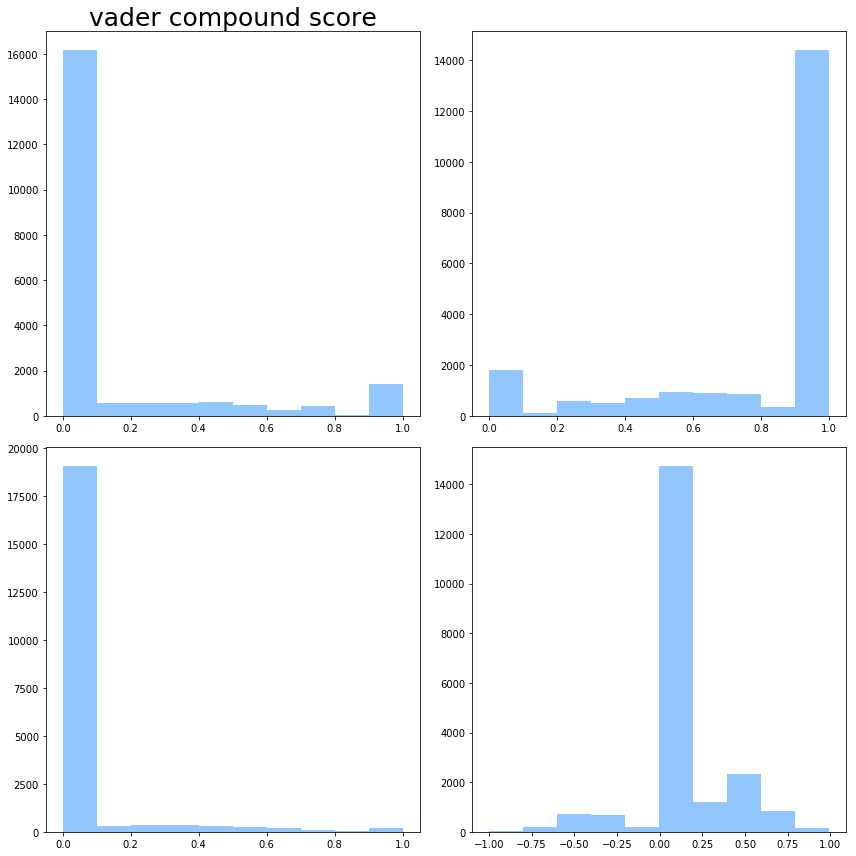

In [122]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

axs[0,0].hist(df['vader_pos'])
axs[0,0].set_title('vader positive score', fontsize=25)
axs[0,1].hist(df['vader_neu'])
axs[0,0].set_title('vader neutral score', fontsize=25)
axs[1,0].hist(df['vader_neg'])
axs[0,0].set_title('vader negative score', fontsize=25)
axs[1,1].hist(df['vader_compound'])
axs[0,0].set_title('vader compound score', fontsize=25)
    
plt.tight_layout()

In [126]:
df['vader_neu'].value_counts().head(10)

1.000    14368
0.000     1785
0.742      160
0.580      135
0.236      109
0.312       94
0.476       81
0.417       65
0.632       56
0.667       56
Name: vader_neu, dtype: int64

#### Find ideal chat size to limit to find more realistic vader scores

#### remove vader scores with 0 positive/negative and 1 neutral

#### Using TextBlob

In [29]:
from textblob import TextBlob

In [31]:
test = TextBlob("The phone is super cool.")
test

TextBlob("The phone is super cool.")

In [32]:
wiki = test
wiki.tags

[('The', 'DT'),
 ('phone', 'NN'),
 ('is', 'VBZ'),
 ('super', 'JJ'),
 ('cool', 'NN')]

In [33]:
wiki.noun_phrases

WordList([])

In [34]:
test.sentiment

Sentiment(polarity=0.3416666666666667, subjectivity=0.6583333333333333)

In [35]:
test.sentiment.polarity

0.3416666666666667

In [76]:
df_channel['textblob_score'] = df_channel['chat_msg'].apply(lambda x: TextBlob(x).sentiment)
df_channel

index game          channel           timestamp  \
60048  66662   HS  playhearthstone 2019-05-31 09:55:00   
60049  66663   HS  playhearthstone 2019-05-31 09:55:00   
60050  66664   HS  playhearthstone 2019-05-31 09:55:00   
60053  66667   HS  playhearthstone 2019-05-31 09:55:00   
60054  66668   HS  playhearthstone 2019-05-31 09:55:00   
60055  66669   HS  playhearthstone 2019-05-31 09:55:00   
60056  66670   HS  playhearthstone 2019-05-31 09:55:00   
60059  66673   HS  playhearthstone 2019-05-31 09:55:00   
60061  66675   HS  playhearthstone 2019-05-31 09:56:00   
60062  66676   HS  playhearthstone 2019-05-31 09:56:00   
60063  66677   HS  playhearthstone 2019-05-31 09:56:00   
60066  66680   HS  playhearthstone 2019-05-31 09:56:00   
60067  66681   HS  playhearthstone 2019-05-31 09:56:00   
60069  66683   HS  playhearthstone 2019-05-31 09:56:00   
60071  66685   HS  playhearthstone 2019-05-31 09:56:00   
60072  66686   HS  playhearthstone 2019-05-31 09:56:00   
60073  66687   HS  playhearthstone 2019-05-31 09:56:00   
60078  66692   HS  playhearthstone 2019-05-31 09:56:00   
60079  66693   HS  playhearthstone 2019-05-31 09:56:00   
60080  66694   HS  playhearthstone 2019-05-31 09:56:00   
60082  66696   HS  playhearthstone 2019-05-31 09:56:00   
60087  66701   HS  playhearthstone 2019-05-31 09:56:00   
60088  66702   HS  playhearthstone 2019-05-31 09:56:00   
60090  66704   HS  playhearthstone 2019-05-31 09:56:00   
60091  66705   HS  playhearthstone 2019-05-31 09:56:00   
60092  66706   HS  playhearthstone 2019-05-31 09:56:00   
60093  66707   HS  playhearthstone 2019-05-31 09:56:00   
60097  66711   HS  playhearthstone 2019-05-31 09:56:00   
60099  66713   HS  playhearthstone 2019-05-31 09:57:00   
60100  66714   HS  playhearthstone 2019-05-31 09:57:00   
...      ...  ...              ...                 ...   
76452  83259   HS  playhearthstone 2019-05-31 13:40:00   
76454  83261   HS  playhearthstone 2019-05-31 13:40:00   
76457  83264   HS  playhearthstone 2019-05-31 13:40:00   
76459  83266   HS  playhearthstone 2019-05-31 13:40:00   
76461  83268   HS  playhearthstone 2019-05-31 13:40:00   
76462  83269   HS  playhearthstone 2019-05-31 13:40:00   
76463  83270   HS  playhearthstone 2019-05-31 13:40:00   
76464  83271   HS  playhearthstone 2019-05-31 13:40:00   
76466  83273   HS  playhearthstone 2019-05-31 13:40:00   
76468  83275   HS  playhearthstone 2019-05-31 13:40:00   
76469  83276   HS  playhearthstone 2019-05-31 13:40:00   
76471  83278   HS  playhearthstone 2019-05-31 13:40:00   
76474  83281   HS  playhearthstone 2019-05-31 13:40:00   
76475  83282   HS  playhearthstone 2019-05-31 13:40:00   
76476  83283   HS  playhearthstone 2019-05-31 13:40:00   
76479  83286   HS  playhearthstone 2019-05-31 13:40:00   
76480  83287   HS  playhearthstone 2019-05-31 13:40:00   
76482  83289   HS  playhearthstone 2019-05-31 13:40:00   
76485  83292   HS  playhearthstone 2019-05-31 13:40:00   
76488  83295   HS  playhearthstone 2019-05-31 13:40:00   
76489  83296   HS  playhearthstone 2019-05-31 13:40:00   
76491  83298   HS  playhearthstone 2019-05-31 13:40:00   
76492  83299   HS  playhearthstone 2019-05-31 13:41:00   
76494  83301   HS  playhearthstone 2019-05-31 13:41:00   
76497  83304   HS  playhearthstone 2019-05-31 13:41:00   
76501  83308   HS  playhearthstone 2019-05-31 13:41:00   
76502  83309   HS  playhearthstone 2019-05-31 13:41:00   
76508  83315   HS  playhearthstone 2019-05-31 13:41:00   
76510  83317   HS  playhearthstone 2019-05-31 13:41:00   
76511  83318   HS  playhearthstone 2019-05-31 13:41:00   

                      user_name  \
60048           gaynoobmaster69   
60049          thefirstvanguard   
60050                younesboy7   
60053                vayazu7285   
60054                   krizard   
60055           dies_to_removal   
60056                  kentymp1   
60059  the_sheriff_of_rockridge   
60061                   west4u2   
60062           gaynoobmaster69   
60063              kappa_

#### FastText Sendiment Analysis

In [ ]:
import fasttext

model = fasttext.train_unsupervised('data.txt', model='skipgram')

In [ ]:
# do histogram
#limit sentences to only 3+ words, then do analysis (anything under 3 words, I cannot analyze)